In [1]:
import pandas as pd, numpy as np
import geopandas as gpd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [447]:
#specify data path
data_path = 'Z:/PL46_Streetlight/Speeds/'
conf_table_path = 'Z:/PL42_HereData_2020_2021/Network Screening/Conflation Table/'
output_path = 'Z:/PL46_Streetlight/Speeds/Output/'

In [3]:
columns_of_interest = ['RT_UNIQUE', 'BEGIN_MP', 'END_MP', 'RD_NAME', 'CO_NAME', 'FC', 'FUNCT', 'dir', 'id', 'name']

In [4]:
#read in segments
segments = gpd.read_file(data_path + 'select_speed_roads.shp')
segments = segments[columns_of_interest]
#swap where begin mp is greater than end mp
segments[['BEGIN_MP','END_MP']] = segments[['BEGIN_MP','END_MP']].mask(segments['BEGIN_MP'] > segments['END_MP'], 
                                                               segments[['END_MP','BEGIN_MP']].values)
segments.head()

,RT_UNIQUE,BEGIN_MP,END_MP,RD_NAME,CO_NAME,FC,FUNCT,dir,id,name
0,005-KY-0249 -000,15.571,15.714,ROSEVILLE RD,Barren,5,17,Cardinal,0,0_Cardinal
1,005-KY-0249 -000,15.282,15.571,ROSEVILLE RD,Barren,5,17,Cardinal,1,1_Cardinal
2,005-KY-0249 -000,15.078,15.282,ROSEVILLE RD,Barren,5,17,Cardinal,2,2_Cardinal
3,005-KY-0249 -000,14.928,15.078,ROSEVILLE RD,Barren,6,08,Cardinal,3,3_Cardinal
4,005-KY-0249 -000,14.682,14.928,ROSEVILLE RD,Barren,6,08,Cardinal,4,4_Cardinal


In [26]:
segments['RT_UNIQUE'].unique()

array(['005-KY-0249  -000', '008-I -0075  -000', '008-I -0075  -010',
       '020-KY-0080  -000', '037-I -0064  -000', '037-I -0064  -010',
       '043-WK-9001  -000', '043-WK-9001  -010', '045-KY-0067  -000',
       '045-KY-0067  -010', '056-CS-1001A -000', '057-US-0027  -000',
       '057-US-0027  -010', '059-I -0075  -000', '059-I -0075  -010',
       '072-I -0024  -000', '072-I -0024  -010', '097-KY-0015  -010',
       '097-KY-0015  -000', '098-US-0119  -000', '098-US-0119  -010',
       '114-US-0231X -000', '114-US-0231X -010', '118-I -0075  -000',
       '118-I -0075  -010', '120-US-0060  -000', '120-US-0060  -010'],
      dtype=object)

In [27]:
len(segments['RT_UNIQUE'].unique())

27

In [174]:
segments[segments['RT_UNIQUE'] == '005-KY-0249  -000'].sort_values('BEGIN_MP')

,RT_UNIQUE,BEGIN_MP,END_MP,RD_NAME,CO_NAME,FC,FUNCT,dir,id,name
29,005-KY-0249 -000,0.000,0.226,ROSEVILLE RD,Barren,6,08,Cardinal,29,29_Cardinal
1003,005-KY-0249 -000,0.000,0.226,ROSEVILLE RD,Barren,6,08,NonCardinal,1003,1003_NonCardinal
1002,005-KY-0249 -000,0.226,0.651,ROSEVILLE RD,Barren,6,08,NonCardinal,1002,1002_NonCardinal
28,005-KY-0249 -000,0.226,0.651,ROSEVILLE RD,Barren,6,08,Cardinal,28,28_Cardinal
1001,005-KY-0249 -000,0.651,0.979,ROSEVILLE RD,Barren,6,08,NonCardinal,1001,1001_NonCardinal
...,...,...,...,...,...,...,...,...,...,...
1006,005-KY-0249 -000,16.048,16.094,BUNCHE AVE,Barren,5,17,NonCardinal,1006,1006_NonCardinal
31,005-KY-0249 -000,16.094,16.125,BUNCHE AVE,Barren,5,17,Cardinal,31,31_Cardinal
1005,005-KY-0249 -000,16.094,16.125,BUNCHE AVE,Barren,5,17,NonCardinal,1005,1005_NonCardinal
30,005-KY-0249 -000,16.125,16.229,BUNCHE AVE,Barren,5,17,Cardinal,30,30_Cardinal


### Match to HERE

In [175]:
his_here_21 = pd.read_csv(data_path + 'pl42_match.csv')
his_here_21.rename(columns = {'LINK-DIR':'LinkDir21'}, inplace=True)
his_here_21.head()

,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir21
0,005-KY-0249 -000,15.571,15.714,15.5710,15.6612,Cardinal,0,0_Cardinal,836675097F
1,005-KY-0249 -000,15.571,15.714,15.6612,15.6925,Cardinal,0,0_Cardinal,836675098F
2,005-KY-0249 -000,15.571,15.714,15.6925,15.7140,Cardinal,0,0_Cardinal,836669701F
3,005-KY-0249 -000,15.282,15.571,15.2820,15.4376,Cardinal,1,1_Cardinal,134021752F
4,005-KY-0249 -000,15.282,15.571,15.4376,15.4571,Cardinal,1,1_Cardinal,106992264F


In [176]:
his_here_19 = pd.read_csv(data_path + 'pl39_match.csv')
his_here_19.rename(columns = {'LINK-DIR':'LinkDir19'}, inplace=True)
his_here_19.head()

,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19
0,005-KY-0249 -000,15.571,15.714,15.571000,15.661232,Cardinal,0,0_Cardinal,836675097F
1,005-KY-0249 -000,15.571,15.714,15.661232,15.692510,Cardinal,0,0_Cardinal,836675098F
2,005-KY-0249 -000,15.571,15.714,15.692510,15.714000,Cardinal,0,0_Cardinal,836669701F
3,005-KY-0249 -000,15.282,15.571,15.282000,15.437618,Cardinal,1,1_Cardinal,134021752F
4,005-KY-0249 -000,15.282,15.571,15.437618,15.457149,Cardinal,1,1_Cardinal,106992264F


### Speeds - STL one-year

In [70]:
stlyr = pd.read_csv('streetlight_speeds_extracted.csv')
stlyr.head(2)

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Day Type,Day Part,Total Segment Traffic (Sample Trip Counts),Total Segment Traffic (Speed Algo Sample Trip Counts),Total Segment Travel Time (Travel Time Algo Sample Trip Counts),Avg Segment Speed (mph),Avg All Segment Speed (mph),Avg Segment Travel Time (sec),Avg All Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (Sample Trip Counts),Vehicle Hours of Delay (Sample Trip Counts),Segment Speed 0-10 mph (percent),Segment Speed 10-20 mph (percent),Segment Speed 20-30 mph (percent),Segment Speed 30-40 mph (percent),Segment Speed 40-50 mph (percent),Segment Speed 50-60 mph (percent),Segment Speed 60-70 mph (percent),Segment Speed 70-80 mph (percent),Segment Speed 80-90 mph (percent),Segment Speed 90+ mph (percent),Segment Travel Time 0-10 min (percent),Segment Travel Time 10-20 min (percent),Segment Travel Time 20-30 min (percent),Segment Travel Time 30-40 min (percent),Segment Travel Time 40-50 min (percent),Segment Travel Time 50-60 min (percent),Segment Travel Time 60-70 min (percent),Segment Travel Time 70-80 min (percent),Segment Travel Time 80-90 min (percent),Segment Travel Time 90-100 min (percent),Segment Travel Time 100-110 min (percent),Segment Travel Time 110-120 min (percent),Segment Travel Time 120-130 min (percent),Segment Travel Time 130-140 min (percent),Segment Travel Time 140-150 min (percent),Segment Travel Time 150+ min (percent),5th Speed Percentile,20th Speed Percentile,50th Speed Percentile,85th Speed Percentile
0,"Jan 01, 2019 - Dec 31, 2019",All Vehicles LBS Plus - StL All Vehicles Sampl...,0,0_Cardinal,0.143,yes,355,no,0: All Days (M-Su),00: All Day (12am-12am),63383,50803,51318,32.0,33.0,22.0,27.0,38.298,0.826,9081.04,49.80,0.070,0.150,0.214,0.263,0.225,0.072,0.006,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,19.0,34.0,47.0
1,"Jan 01, 2019 - Dec 31, 2019",All Vehicles LBS Plus - StL All Vehicles Sampl...,0,0_Cardinal,0.143,yes,355,no,0: All Days (M-Su),01: Early AM (12am-6am),1710,1190,1241,34.0,37.0,20.0,24.0,38.298,0.895,245.00,0.75,0.074,0.089,0.200,0.259,0.245,0.116,0.017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,23.0,36.0,50.0


In [71]:
stlyr['Year'] = np.where(stlyr['Data Periods'] == 'Jan 01, 2019 - Dec 31, 2019', '2019', 
                         np.where(stlyr['Data Periods'] == 'Jan 01, 2020 - Dec 31, 2020', '2020',
                             np.where(stlyr['Data Periods'] == 'Jan 01, 2021 - Dec 31, 2021', '2021', None)))

In [72]:
stlyr['WkdayType'] = np.where(stlyr['Day Type'] == '0: All Days (M-Su)', 'all', 
                         np.where(stlyr['Day Type'] == '1: Weekday (M-F)', 'wkday',
                             np.where(stlyr['Day Type'] == '2:  Weekend (Sa-Su)', 'wkend', None)))

In [73]:
stlyr['Hour'] = np.where(stlyr['Day Part'] == '00: All Day (12am-12am)', 'all', 
                         np.where(stlyr['Day Part'] == '01: Early AM (12am-6am)', 'dawn',
                         np.where(stlyr['Day Part'] == '16:  Late PM (8pm-12am)', 'night', 
                         np.where(stlyr['Day Part'] == '02:  Hour06 (6am-7am)', 6,
                         np.where(stlyr['Day Part'] == '03:  Hour07 (7am-8am)', 7,
                         np.where(stlyr['Day Part'] == '04:  Hour08 (8am-9am)', 8,
                         np.where(stlyr['Day Part'] == '05:  Hour09 (9am-10am)', 9,
                         np.where(stlyr['Day Part'] == '06:  Hour10 (10am-11am)', 10,
                         np.where(stlyr['Day Part'] == '07:  Hour11 (11am-12noon)', 11,
                         np.where(stlyr['Day Part'] == '08:  Hour12 (12noon-1pm)', 12,
                         np.where(stlyr['Day Part'] == '09:  Hour13 (1pm-2pm)', 13,
                         np.where(stlyr['Day Part'] == '10:  Hour14 (2pm-3pm)', 14,
                         np.where(stlyr['Day Part'] == '11:  Hour15 (3pm-4pm)', 15,
                         np.where(stlyr['Day Part'] == '12:  Hour16 (4pm-5pm)', 16,
                         np.where(stlyr['Day Part'] == '13:  Hour17 (5pm-6pm)', 17,
                         np.where(stlyr['Day Part'] == '14:  Hour18 (6pm-7pm)', 18,
                         np.where(stlyr['Day Part'] == '15:  Hour19 (7pm-8pm)', 19, None
                         )))))))))))))))))

In [75]:
stlyr = stlyr[['Zone ID', 'Zone Name', 'Year', 'WkdayType', 'Hour',
       'Total Segment Traffic (Sample Trip Counts)',
       'Total Segment Traffic (Speed Algo Sample Trip Counts)',
       'Total Segment Travel Time (Travel Time Algo Sample Trip Counts)', 
       'Avg Segment Speed (mph)','Avg All Segment Speed (mph)', 'Free Flow Speed (mph)', 
       '5th Speed Percentile','20th Speed Percentile', '50th Speed Percentile',
       '85th Speed Percentile']]

In [77]:
stlyr.head()

,Zone ID,Zone Name,Year,WkdayType,Hour,Total Segment Traffic (Sample Trip Counts),Total Segment Traffic (Speed Algo Sample Trip Counts),Total Segment Travel Time (Travel Time Algo Sample Trip Counts),Avg Segment Speed (mph),Avg All Segment Speed (mph),Free Flow Speed (mph),5th Speed Percentile,20th Speed Percentile,50th Speed Percentile,85th Speed Percentile
0,0,0_Cardinal,2019,all,all,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0
1,0,0_Cardinal,2019,all,dawn,1710,1190,1241,34.0,37.0,38.298,7.0,23.0,36.0,50.0
2,0,0_Cardinal,2019,all,6,3152,2771,2845,38.0,40.0,38.298,18.0,30.0,40.0,50.0
3,0,0_Cardinal,2019,all,7,6011,4582,4622,32.0,33.0,38.298,11.0,21.0,34.0,46.0
4,0,0_Cardinal,2019,all,8,2835,2275,2293,36.0,36.0,38.298,11.0,25.0,39.0,48.0


In [152]:
stlyr.columns = ['id', 'name', 'Year','WkdayType', 'Hour','TotalSample', 'AlgoSample', 'TTAlgoSample','stl_avgspd',
                 'stl_allavg', 'stl_ffs' , 'stl_pct5spd', 'stl_pct20spd', 'stl_pct50spd', 'stl_pct85spd']

In [153]:
#check
stlyr[(stlyr['id'] == 0) & (stlyr['Year'] == '2019') ] #& (stlyr['WkdayType'] == 'all')

,id,name,Year,WkdayType,Hour,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd
0,0,0_Cardinal,2019,all,all,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0
1,0,0_Cardinal,2019,all,dawn,1710,1190,1241,34.0,37.0,38.298,7.0,23.0,36.0,50.0
2,0,0_Cardinal,2019,all,6,3152,2771,2845,38.0,40.0,38.298,18.0,30.0,40.0,50.0
3,0,0_Cardinal,2019,all,7,6011,4582,4622,32.0,33.0,38.298,11.0,21.0,34.0,46.0
4,0,0_Cardinal,2019,all,8,2835,2275,2293,36.0,36.0,38.298,11.0,25.0,39.0,48.0
5,0,0_Cardinal,2019,all,9,3538,2917,2943,34.0,34.0,38.298,10.0,22.0,36.0,48.0
6,0,0_Cardinal,2019,all,10,3279,2613,2636,35.0,36.0,38.298,9.0,23.0,38.0,49.0
7,0,0_Cardinal,2019,all,11,3588,2827,2845,32.0,33.0,38.298,8.0,20.0,34.0,47.0
8,0,0_Cardinal,2019,all,12,3458,2737,2760,34.0,35.0,38.298,8.0,22.0,37.0,48.0
9,0,0_Cardinal,2019,all,13,3634,2830,2854,32.0,33.0,38.298,8.0,20.0,35.0,47.0


### HERE Speeds

In [84]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [106]:
h19 = pd.read_csv(data_path + 'here_speeds_2019_1year_extracted.csv')
h19['MEAN'] = round(h19['MEAN']/1.61,3)
h19['DAY'] = pd.to_datetime(h19['DATE-TIME'])
h19['DOW'] = h19.DAY.dt.dayofweek
h19['Day Type'] = np.where(h19['DOW'] < 5, 'wkday', 'wkend')
h19['Day Part'] = np.where(h19['EPOCH-60MIN'] < 6, 'dawn', np.where(h19['EPOCH-60MIN'] > 20, 'night', 'daytime'))
h19.head()

,LINK-DIR,DATE-TIME,EPOCH-60MIN,COUNT,MEAN,DAY,DOW,Day Type,Day Part
0,1060732108T,2019-01-01 12:00,12,2,39.441,2019-01-01 12:00:00,1,wkday,daytime
1,1060732108T,2019-01-01 13:00,13,1,34.161,2019-01-01 13:00:00,1,wkday,daytime
2,1060732108T,2019-01-01 15:00,15,1,25.466,2019-01-01 15:00:00,1,wkday,daytime
3,1060732108T,2019-01-01 18:00,18,1,32.298,2019-01-01 18:00:00,1,wkday,daytime
4,1060732108T,2019-01-01 19:00,19,2,26.708,2019-01-01 19:00:00,1,wkday,daytime


In [132]:
h20 = pd.read_csv(data_path + 'here_speeds_2020_1year_extracted.csv')
h20['MEAN'] = round(h20['MEAN']/1.61,3)
h20['DAY'] = pd.to_datetime(h20['DATE-TIME'])
h20['DOW'] = h20.DAY.dt.dayofweek
h20['Day Type'] = np.where(h20['DOW'] < 5, 'wkday', 'wkend')
h20['Day Part'] = np.where(h20['EPOCH-60MIN'] < 6, 'dawn', np.where(h20['EPOCH-60MIN'] > 20, 'night', 'daytime'))
h20.head()

,LINK-DIR,DATE-TIME,EPOCH-60MIN,COUNT,MEAN,STDDEV,DAY,DOW,Day Type,Day Part
0,1060732108T,2020-01-01 00:00,0,1,30.435,0.0,2020-01-01 00:00:00,2,wkday,dawn
1,1060732108T,2020-01-01 06:00,6,1,30.435,0.0,2020-01-01 06:00:00,2,wkday,daytime
2,1060732108T,2020-01-01 08:00,8,4,39.627,17.1,2020-01-01 08:00:00,2,wkday,daytime
3,1060732108T,2020-01-01 09:00,9,3,29.379,13.0,2020-01-01 09:00:00,2,wkday,daytime
4,1060732108T,2020-01-01 11:00,11,1,34.161,0.0,2020-01-01 11:00:00,2,wkday,daytime


In [133]:
h21 = pd.read_csv(data_path + 'here_speeds_2021_1year_extracted.csv')
h21['MEAN'] = round(h21['MEAN']/1.61,3)
h21['DAY'] = pd.to_datetime(h21['DATE-TIME'])
h21['DOW'] = h21.DAY.dt.dayofweek
h21['Day Type'] = np.where(h21['DOW'] < 5, 'wkday', 'wkend')
h21['Day Part'] = np.where(h21['EPOCH-60MIN'] < 6, 'dawn', np.where(h21['EPOCH-60MIN'] > 20, 'night', 'daytime'))
h21.head()

,LINK-DIR,DATE-TIME,EPOCH-60MIN,COUNT,MEAN,DAY,DOW,Day Type,Day Part
0,1060732108T,2021-01-01 00:00,0,2,35.404,2021-01-01 00:00:00,4,wkday,dawn
1,1060732108T,2021-01-01 09:00,9,1,33.540,2021-01-01 09:00:00,4,wkday,daytime
2,1060732108T,2021-01-01 10:00,10,4,31.056,2021-01-01 10:00:00,4,wkday,daytime
3,1060732108T,2021-01-01 11:00,11,2,29.193,2021-01-01 11:00:00,4,wkday,daytime
4,1060732108T,2021-01-01 12:00,12,1,30.435,2021-01-01 12:00:00,4,wkday,daytime


In [134]:
def speed_agg(df):
    #ALL DAY
    #All day all hours year stats
    allday = df.groupby(['LINK-DIR'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                       percentile(50), percentile(85)]})

    allday.columns = ['LINK-DIR', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
    allday['WkdayType'] = 'all'
    allday['Hour'] = 'all'

    #all day hourly year stats
    alldayhr = df.groupby(['LINK-DIR','EPOCH-60MIN'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                       percentile(50), percentile(85)]})
    alldayhr.columns = ['LINK-DIR', 'EPOCH-60MIN', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
    alldayhr['WkdayType'] = 'all'
    alldayhr['Hour'] = alldayhr['EPOCH-60MIN']
    alldayhr.drop(['EPOCH-60MIN'], axis=1, inplace=True)
    alldayhr = alldayhr.loc[(alldayhr.Hour >= 6) & (alldayhr.Hour <= 19)]

    #all day day part year stats
    alldaydp = df.groupby(['LINK-DIR','Day Part'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                       percentile(50), percentile(85)]})
    alldaydp.columns = ['LINK-DIR', 'Day Part', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
    alldaydp['WkdayType'] = 'all'
    alldaydp['Hour'] = alldaydp['Day Part']
    alldaydp.drop(['Day Part'], axis=1, inplace=True)
    alldaydp = alldaydp.loc[alldaydp.Hour != 'daytime']

    #WEEKDAY
    #wkday all hours year stats
    wkday = df.loc[df['Day Type'] == 'wkday'].groupby(['LINK-DIR'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                       percentile(50), percentile(85)]})

    wkday.columns = ['LINK-DIR', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
    wkday['WkdayType'] = 'wkday'
    wkday['Hour'] = 'all'
    
    #all day hourly year stats
    wkdayhr = df.loc[df['Day Type'] == 'wkday'].groupby(['LINK-DIR','EPOCH-60MIN'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                       percentile(50), percentile(85)]})
    wkdayhr.columns = ['LINK-DIR', 'EPOCH-60MIN', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
    wkdayhr['WkdayType'] = 'wkday'
    wkdayhr['Hour'] = wkdayhr['EPOCH-60MIN']
    wkdayhr.drop(['EPOCH-60MIN'], axis=1, inplace=True)
    wkdayhr = wkdayhr.loc[(wkdayhr.Hour >= 6) & (wkdayhr.Hour <= 19)]

    #all day day part year stats
    wkdaydp = df.loc[df['Day Type'] == 'wkday'].groupby(['LINK-DIR','Day Part'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                       percentile(50), percentile(85)]})
    wkdaydp.columns = ['LINK-DIR', 'Day Part', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
    wkdaydp['WkdayType'] = 'wkday'
    wkdaydp['Hour'] = wkdaydp['Day Part']
    wkdaydp.drop(['Day Part'], axis=1, inplace=True)
    wkdaydp = wkdaydp.loc[wkdaydp.Hour != 'daytime']

    #WEEKEND
    #wkend all hours year stats
    wkend = df.loc[df['Day Type'] == 'wkend'].groupby(['LINK-DIR'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                       percentile(50), percentile(85)]})

    wkend.columns = ['LINK-DIR', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
    wkend['WkdayType'] = 'wkend'
    wkend['Hour'] = 'all'

    #all day hourly year stats
    wkendhr = df.loc[df['Day Type'] == 'wkend'].groupby(['LINK-DIR','EPOCH-60MIN'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                       percentile(50), percentile(85)]})
    wkendhr.columns = ['LINK-DIR', 'EPOCH-60MIN', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
    wkendhr['WkdayType'] = 'wkend'
    wkendhr['Hour'] = wkendhr['EPOCH-60MIN']
    wkendhr.drop(['EPOCH-60MIN'], axis=1, inplace=True)
    wkendhr = wkendhr.loc[(wkendhr.Hour >= 6) & (wkendhr.Hour <= 19)]

    #all day day part year stats
    wkenddp = df.loc[df['Day Type'] == 'wkend'].groupby(['LINK-DIR','Day Part'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                       percentile(50), percentile(85)]})
    wkenddp.columns = ['LINK-DIR', 'Day Part', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
    wkenddp['WkdayType'] = 'wkend'
    wkenddp['Hour'] = wkenddp['Day Part']
    wkenddp.drop(['Day Part'], axis=1, inplace=True)
    wkenddp = wkenddp.loc[wkenddp.Hour != 'daytime']

    dt = pd.concat([allday, alldayhr, alldaydp, wkday, wkdayhr, wkdaydp, wkend, wkendhr, wkenddp], ignore_index=True)
    return dt

In [135]:
h19_agg = speed_agg(h19)
h19_agg.head()

,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour
0,1055980228F,1785,54.905320,33.540,49.565,56.832,63.354,all,all
1,1055980228T,1813,53.094926,36.646,46.584,53.416,62.112,all,all
2,1055980229F,1790,54.990404,33.913,49.689,56.522,63.354,all,all
3,1055980229T,1809,53.152272,36.646,46.584,53.416,62.112,all,all
4,1055993300F,2360,53.022030,42.857,48.447,53.416,58.385,all,all


In [136]:
h20_agg = speed_agg(h20)
h20_agg.head()

,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour
0,1055980228F,1859,54.968237,37.888,49.689,55.901,63.04300,all,all
1,1055980228T,1942,52.839144,37.267,45.963,53.416,61.49100,all,all
2,1055980229F,1850,55.046319,37.267,49.689,55.901,63.21405,all,all
3,1055980229T,1934,52.956550,37.267,46.273,53.416,61.49100,all,all
4,1055993300F,2356,52.687508,42.236,48.012,52.795,59.00600,all,all


In [137]:
h21_agg = speed_agg(h21)
h21_agg.head()

,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour
0,1055980228F,16245,52.858822,33.1184,45.6520,53.851,62.112,all,all
1,1055980228T,18697,46.494276,31.0560,40.0620,47.019,55.280,all,all
2,1055980229F,15926,53.098129,34.4720,45.9630,54.037,62.112,all,all
3,1055980229T,18553,46.803968,31.2823,40.4722,47.205,55.590,all,all
4,1055993300F,49374,53.214900,42.9500,49.9380,54.037,58.354,all,all


In [177]:
hyr19 = pd.merge(his_here_19, h19_agg, left_on=['LinkDir19'], right_on=['LINK-DIR'])
hyr19['Year'] = 2019
hyr19.head()

,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour,Year
0,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,779,43.367306,22.81050,35.0930,45.3420,54.03700,all,all,2019
1,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,89,49.825909,32.60875,45.9630,51.2420,56.67725,all,6,2019
2,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,90,44.145906,25.77600,38.8816,45.6525,52.34450,all,7,2019
3,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,33,46.055950,26.45945,40.9070,49.2235,53.63350,all,8,2019
4,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,27,37.537353,9.44080,29.6024,41.9250,50.43480,all,9,2019


In [178]:
hyr20 = pd.merge(his_here_21, h20_agg, left_on=['LinkDir21'], right_on=['LINK-DIR'])
hyr20['Year'] = 2020
hyr20.head()

,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir21,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour,Year
0,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,638,44.005506,25.45015,38.5090,45.6520,52.18950,all,all,2020
1,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,43,48.473125,33.85065,44.0372,51.0870,57.48455,all,6,2020
2,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,42,45.496885,29.34750,39.7520,47.0495,53.57125,all,7,2020
3,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,27,37.142733,23.44730,31.6768,36.3350,46.49030,all,8,2020
4,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,22,39.208000,16.95685,29.1922,44.2545,49.48750,all,9,2020


In [179]:
hyr21 = pd.merge(his_here_21, h21_agg, left_on=['LinkDir21'], right_on=['LINK-DIR'])
hyr21['Year'] = 2021
hyr21.head()

,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir21,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour,Year
0,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,32598,39.932009,25.77600,33.2920,40.683,47.82600,all,all,2021
1,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,1899,44.674374,35.55925,40.6210,44.845,50.00000,all,6,2021
2,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,3825,37.633500,25.45670,29.2426,37.112,47.45655,all,7,2021
3,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,1621,41.180110,31.29810,36.2234,41.615,47.08720,all,8,2021
4,005-KY-0249 -000,15.571,15.714,15.571,15.6612,Cardinal,0,0_Cardinal,836675097F,836675097F,1879,39.575300,29.02460,34.0990,39.565,46.40420,all,9,2021


In [180]:
hereyr = pd.concat([hyr19, hyr20, hyr21], ignore_index=False)
hereyr.head()

,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour,Year,LinkDir21
0,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,779,43.367306,22.81050,35.0930,45.3420,54.03700,all,all,2019,NaN
1,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,89,49.825909,32.60875,45.9630,51.2420,56.67725,all,6,2019,NaN
2,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,90,44.145906,25.77600,38.8816,45.6525,52.34450,all,7,2019,NaN
3,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,33,46.055950,26.45945,40.9070,49.2235,53.63350,all,8,2019,NaN
4,005-KY-0249 -000,15.571,15.714,15.571,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,27,37.537353,9.44080,29.6024,41.9250,50.43480,all,9,2019,NaN


In [181]:
stlyr.head(2)

,id,name,Year,WkdayType,Hour,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd
0,0,0_Cardinal,2019,all,all,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0
1,0,0_Cardinal,2019,all,dawn,1710,1190,1241,34.0,37.0,38.298,7.0,23.0,36.0,50.0


In [182]:
hereyr['Year'] = hereyr['Year'].astype(str)
byyear = pd.merge(hereyr, stlyr, on=['name', 'id', 'Year','WkdayType','Hour'])
byyear.head()

,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour,Year,LinkDir21,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd
0,005-KY-0249 -000,15.571,15.714,15.571000,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,779,43.367306,22.81050,35.0930,45.3420,54.03700,all,all,2019,NaN,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0
1,005-KY-0249 -000,15.571,15.714,15.661232,15.692510,Cardinal,0,0_Cardinal,836675098F,836675098F,512,46.074535,32.53135,40.3730,46.5840,54.03700,all,all,2019,NaN,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0
2,005-KY-0249 -000,15.571,15.714,15.692510,15.714000,Cardinal,0,0_Cardinal,836669701F,836669701F,452,41.945473,29.81400,36.6460,42.6395,49.22325,all,all,2019,NaN,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0
3,005-KY-0249 -000,15.571,15.714,15.571000,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,89,49.825909,32.60875,45.9630,51.2420,56.67725,all,6,2019,NaN,3152,2771,2845,38.0,40.0,38.298,18.0,30.0,40.0,50.0
4,005-KY-0249 -000,15.571,15.714,15.661232,15.692510,Cardinal,0,0_Cardinal,836675098F,836675098F,46,51.419738,41.02505,47.2672,52.0185,57.14300,all,6,2019,NaN,3152,2771,2845,38.0,40.0,38.298,18.0,30.0,40.0,50.0


In [183]:
byyear.to_csv('selected_roads_stl_here_by_yr.csv', index=False)

In [2]:
byyear = pd.read_csv('selected_roads_stl_here_by_yr.csv')
byyear.head()

,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour,Year,LinkDir21,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd
0,005-KY-0249 -000,15.571,15.714,15.571000,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,779,43.367306,22.81050,35.0930,45.3420,54.03700,all,all,2019,NaN,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0
1,005-KY-0249 -000,15.571,15.714,15.661232,15.692510,Cardinal,0,0_Cardinal,836675098F,836675098F,512,46.074535,32.53135,40.3730,46.5840,54.03700,all,all,2019,NaN,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0
2,005-KY-0249 -000,15.571,15.714,15.692510,15.714000,Cardinal,0,0_Cardinal,836669701F,836669701F,452,41.945473,29.81400,36.6460,42.6395,49.22325,all,all,2019,NaN,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0
3,005-KY-0249 -000,15.571,15.714,15.571000,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,89,49.825909,32.60875,45.9630,51.2420,56.67725,all,6,2019,NaN,3152,2771,2845,38.0,40.0,38.298,18.0,30.0,40.0,50.0
4,005-KY-0249 -000,15.571,15.714,15.661232,15.692510,Cardinal,0,0_Cardinal,836675098F,836675098F,46,51.419738,41.02505,47.2672,52.0185,57.14300,all,6,2019,NaN,3152,2771,2845,38.0,40.0,38.298,18.0,30.0,40.0,50.0


In [3]:
byyear['Year'] = byyear['Year'].astype(int)

In [4]:
byyear['key'] = byyear['RT_UNIQUE'].str.replace(' ','').str[:-4] + ' ' + byyear['AllRds_Dir']
byyear.head()

,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19,LINK-DIR,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,WkdayType,Hour,Year,LinkDir21,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd,key
0,005-KY-0249 -000,15.571,15.714,15.571000,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,779,43.367306,22.81050,35.0930,45.3420,54.03700,all,all,2019,NaN,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0,005-KY-0249 Cardinal
1,005-KY-0249 -000,15.571,15.714,15.661232,15.692510,Cardinal,0,0_Cardinal,836675098F,836675098F,512,46.074535,32.53135,40.3730,46.5840,54.03700,all,all,2019,NaN,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0,005-KY-0249 Cardinal
2,005-KY-0249 -000,15.571,15.714,15.692510,15.714000,Cardinal,0,0_Cardinal,836669701F,836669701F,452,41.945473,29.81400,36.6460,42.6395,49.22325,all,all,2019,NaN,63383,50803,51318,32.0,33.0,38.298,8.0,19.0,34.0,47.0,005-KY-0249 Cardinal
3,005-KY-0249 -000,15.571,15.714,15.571000,15.661232,Cardinal,0,0_Cardinal,836675097F,836675097F,89,49.825909,32.60875,45.9630,51.2420,56.67725,all,6,2019,NaN,3152,2771,2845,38.0,40.0,38.298,18.0,30.0,40.0,50.0,005-KY-0249 Cardinal
4,005-KY-0249 -000,15.571,15.714,15.661232,15.692510,Cardinal,0,0_Cardinal,836675098F,836675098F,46,51.419738,41.02505,47.2672,52.0185,57.14300,all,6,2019,NaN,3152,2771,2845,38.0,40.0,38.298,18.0,30.0,40.0,50.0,005-KY-0249 Cardinal


## Yearly Analysis

In [6]:
[byyear.key.unique()[-5]]

['118-I-0075 Cardinal']

In [7]:
byyear.WkdayType.unique()

array(['all', 'wkday', 'wkend'], dtype=object)

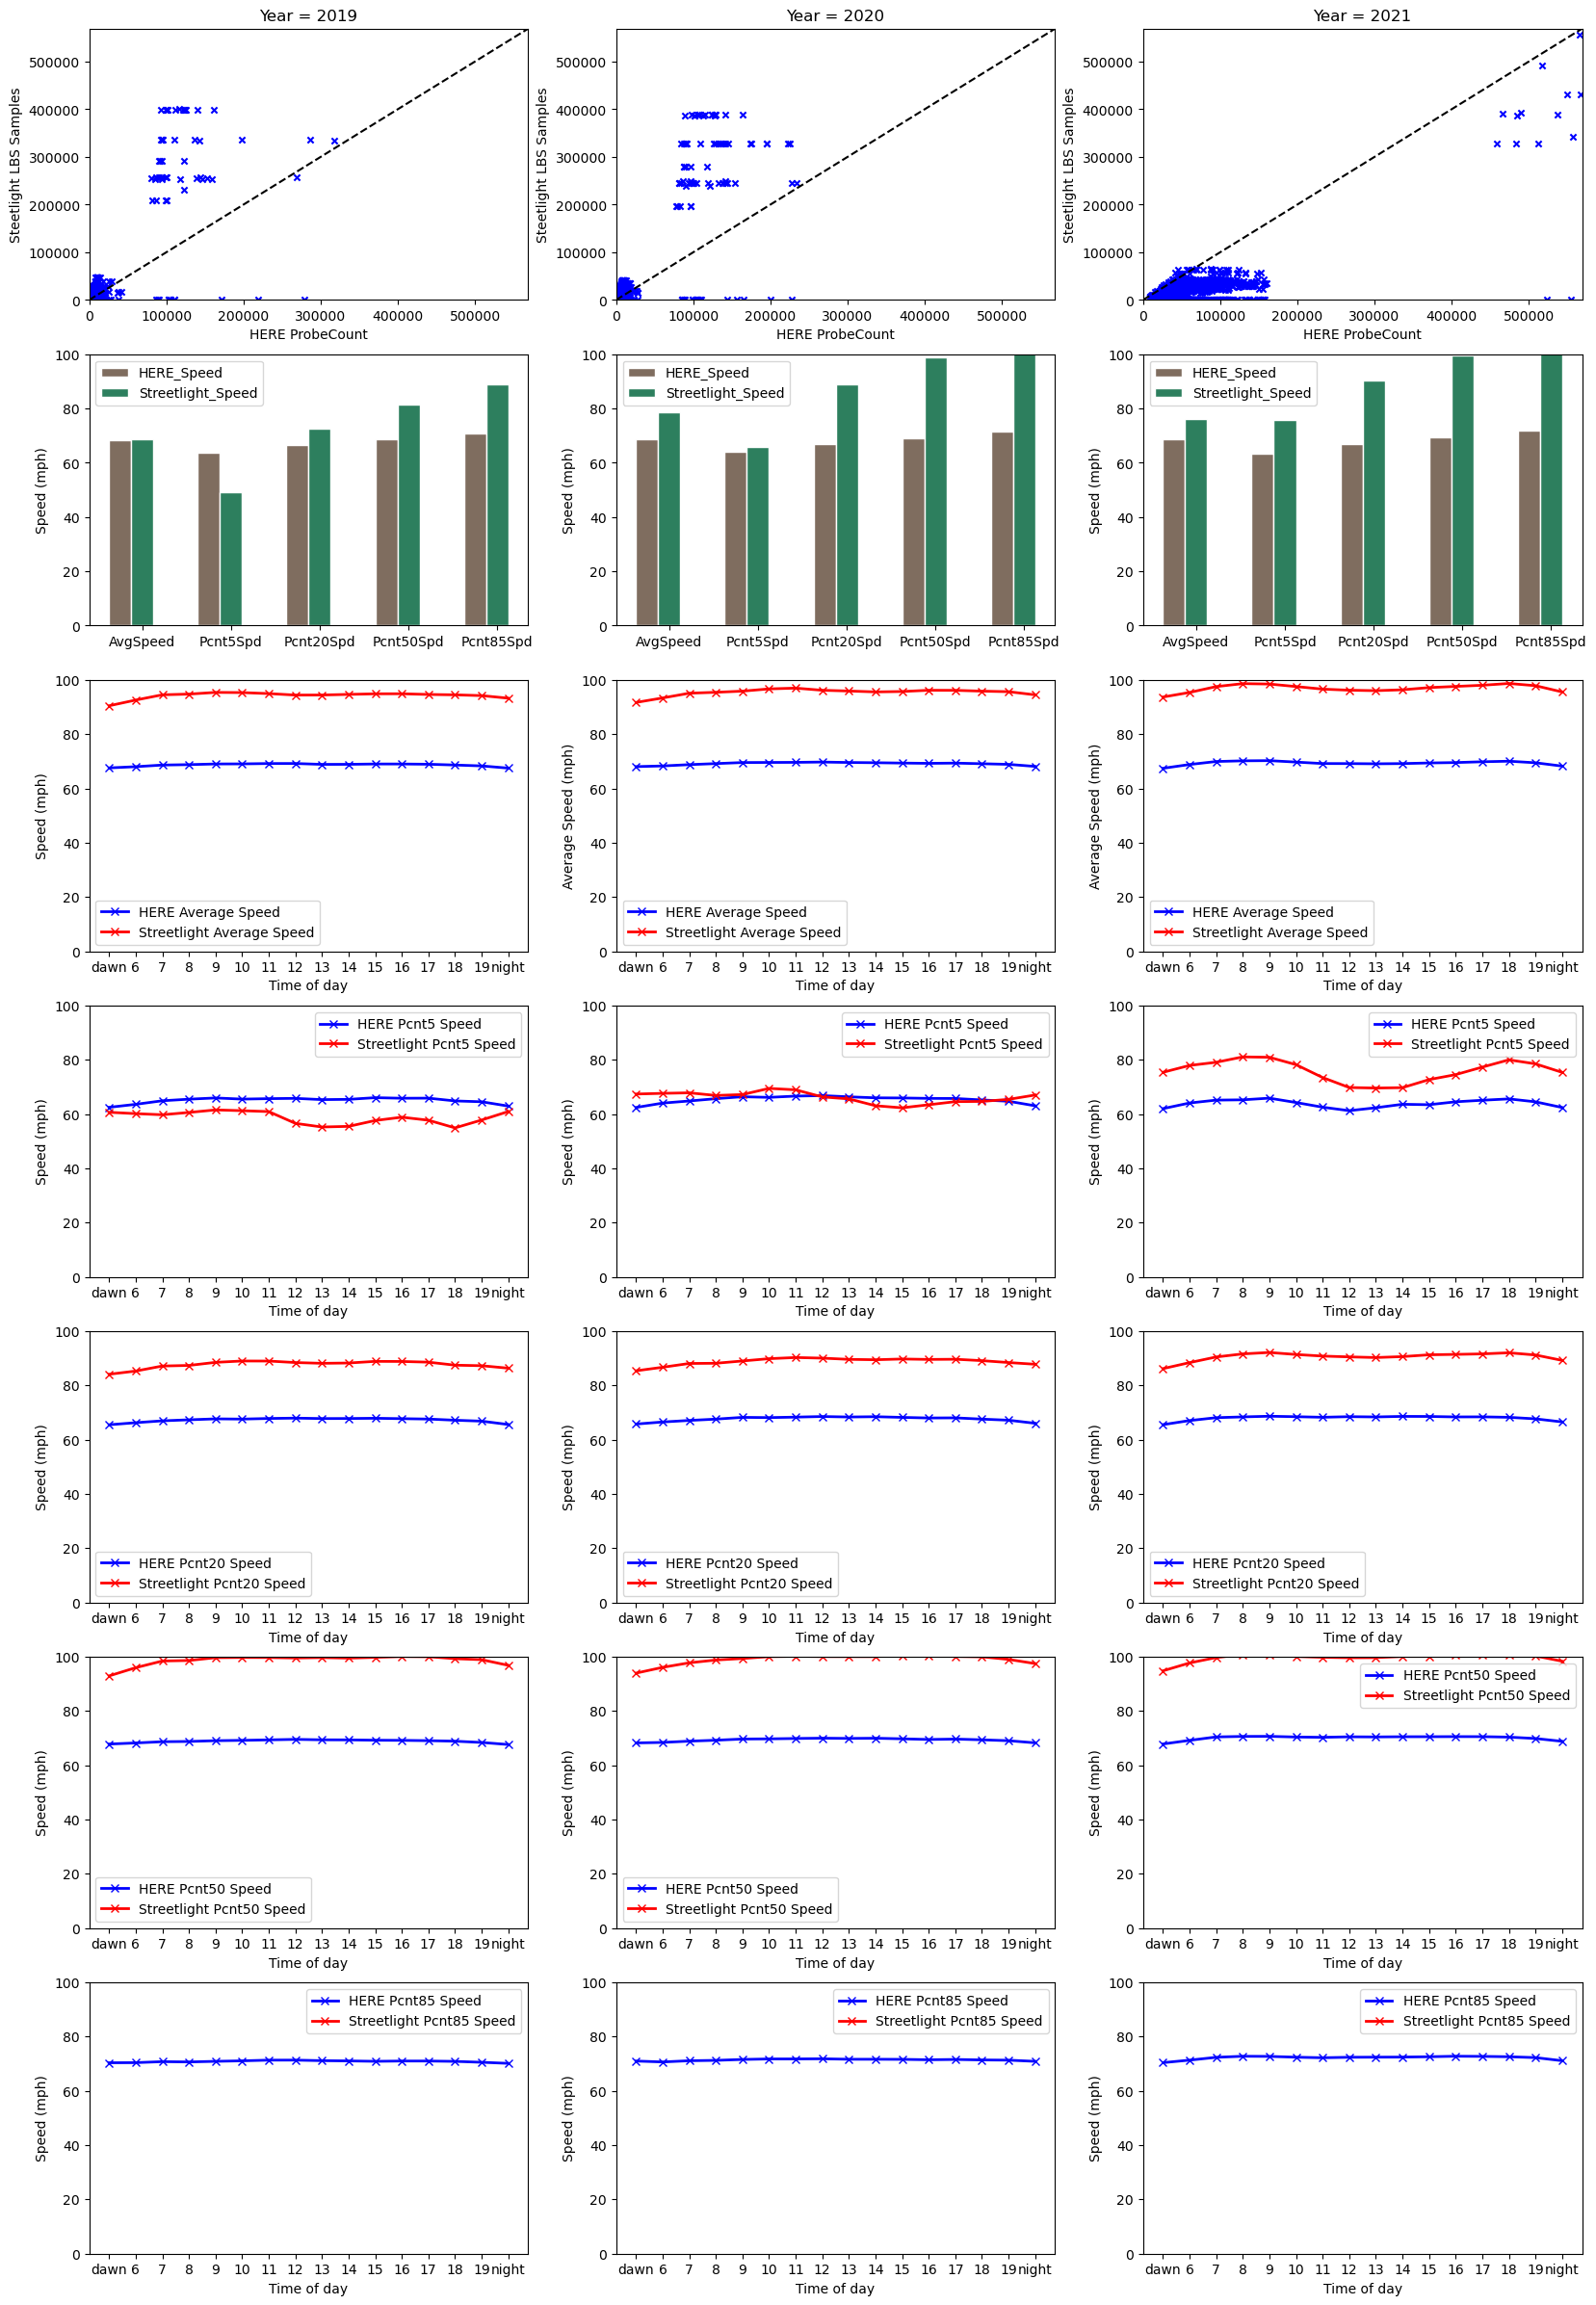

In [9]:
for key in [byyear.key.unique()[-5]]: #byyear.key.unique()
    t = byyear[(byyear['key'] == key) & (byyear.WkdayType == 'all')]

    t['length'] = abs(t.emp - t.bmp)
    t['here_tt'] = t['length']/t['AvgSpeed']
    t['stl_tt'] = t['length']/t['stl_avgspd']

    t['here_tt5'] = t['length']/t['Pcnt5Spd']
    t['stl_tt5'] = t['length']/t['stl_pct5spd']

    t['here_tt20'] = t['length']/t['Pcnt20Spd']
    t['stl_tt20'] = t['length']/t['stl_pct20spd']

    t['here_tt50'] = t['length']/t['Pcnt50Spd']
    t['stl_tt50'] = t['length']/t['stl_pct50spd']

    t['here_tt85'] = t['length']/t['Pcnt85Spd']
    t['stl_tt85'] = t['length']/t['stl_pct85spd']

    tagg = t.groupby(['AllRds_Dir','Hour', 'Year'], as_index=False).agg({'length':'sum','here_tt':'sum','stl_tt':'sum',
                                                             'here_tt5':'sum','stl_tt5':'sum',
                                                             'here_tt20':'sum','stl_tt20':'sum',
                                                             'here_tt50':'sum','stl_tt50':'sum',
                                                             'here_tt85':'sum','stl_tt85':'sum'})

    tagg['AvgSpeed'] = tagg['length']/tagg['here_tt']
    tagg['stl_avgspd'] = tagg['length']/tagg['stl_tt']

    tagg['Pcnt5Spd'] = tagg['length']/tagg['here_tt5']
    tagg['stl_pct5spd'] = tagg['length']/tagg['stl_tt5']

    tagg['Pcnt20Spd'] = tagg['length']/tagg['here_tt20']
    tagg['stl_pct20spd'] = tagg['length']/tagg['stl_tt20']

    tagg['Pcnt50Spd'] = tagg['length']/tagg['here_tt50']
    tagg['stl_pct50spd'] = tagg['length']/tagg['stl_tt50']

    tagg['Pcnt85Spd'] = tagg['length']/tagg['here_tt85']
    tagg['stl_pct85spd'] = tagg['length']/tagg['stl_tt85']


    tagg.Hour = tagg.Hour.astype(str)
    order = ['dawn','6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19','night']

    fig, axes = plt.subplots(7, 3, figsize=(20,30))

    cols = ['Year = 2019', 'Year = 2020', 'Year = 2021']
    for ax,col in zip(axes[0], cols):
        ax.set_title(col)
    #Probe Counts
    #[0,0]
    axes[0,0].scatter(x=t.loc[t['Year'] == 2019,'ProbeCounts'], y=t.loc[t['Year'] == 2019,'TotalSample'], marker='x',s = 20, color='b')
    axes[0,0].set_xlim([0, round(t.TotalSample.max() + 10000, -3)])
    axes[0,0].set_ylim([0, round(t.TotalSample.max() + 10000, -3)])
    points = [0, round(t.TotalSample.max() + 10000, -3)]
    axes[0,0].plot(points, points,linestyle='--', color = 'k')
    axes[0,0].set_xlabel('HERE ProbeCount')
    axes[0,0].set_ylabel('Steetlight LBS Samples')

    #[0,1]
    axes[0,1].scatter(x=t.loc[t['Year'] == 2020,'ProbeCounts'], y=t.loc[t['Year'] == 2020,'TotalSample'], marker='x',s = 20,color='b')
    axes[0,1].set_xlim([0, round(t.TotalSample.max() + 10000, -3)])
    axes[0,1].set_ylim([0, round(t.TotalSample.max() + 10000, -3)])
    points = [0, round(t.TotalSample.max() + 10000, -3)]
    axes[0,1].plot(points, points,linestyle='--', color = 'k')
    axes[0,1].set_xlabel('HERE ProbeCount')
    axes[0,1].set_ylabel('Steetlight LBS Samples')

    #[0,2]
    axes[0,2].scatter(x=t.loc[t['Year'] == 2021,'ProbeCounts'], y=t.loc[t['Year'] == 2021,'TotalSample'], marker='x',s = 20,color='b')
    axes[0,2].set_xlim([0, round(t.TotalSample.max() + 10000, -3)])
    axes[0,2].set_ylim([0, round(t.TotalSample.max() + 10000, -3)])
    points = [0, round(t.TotalSample.max() + 10000, -3)]
    axes[0,2].plot(points, points,linestyle='--', color = 'k')
    axes[0,2].set_xlabel('HERE ProbeCount')
    axes[0,2].set_ylabel('Steetlight LBS Samples')

    #agg speeds all day, dawn night
    #2019
    barWidth = 0.25
    here_points19 = tagg.loc[(tagg.Year == 2019) & (tagg.Hour=='all'),
            ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']].values.flatten().tolist()

    stl_points19 = tagg.loc[(tagg.Year == 2019) & (tagg.Hour=='all'),
            ['stl_avgspd','stl_pct5spd','stl_pct20spd','stl_pct50spd','stl_pct85spd']].values.flatten().tolist()

    r1 = np.arange(len(here_points19))
    r2 = [x + barWidth for x in r1]

    axes[1,0].bar(r1, here_points19, color='#7f6d5f', width=barWidth, edgecolor='white', label='HERE_Speed')
    axes[1,0].bar(r2, stl_points19, color='#2d7f5e', width=barWidth, edgecolor='white', label='Streetlight_Speed')
    axes[1,0].set_xticks([r + barWidth for r in range(len(here_points19))], ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd'])
    axes[1,0].set_ylim([0,100])
    axes[1,0].set_ylabel('Speed (mph)')
    axes[1,0].legend()

    #2020
    here_points20 = tagg.loc[(tagg.Year == 2020) & (tagg.Hour=='all'),
            ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']].values.flatten().tolist()

    stl_points20 = tagg.loc[(tagg.Year == 2020) & (tagg.Hour=='all'),
            ['stl_avgspd','stl_pct5spd','stl_pct20spd','stl_pct50spd','stl_pct85spd']].values.flatten().tolist()

    r1 = np.arange(len(here_points20))
    r2 = [x + barWidth for x in r1]

    axes[1,1].bar(r1, here_points20, color='#7f6d5f', width=barWidth, edgecolor='white', label='HERE_Speed')
    axes[1,1].bar(r2, stl_points20, color='#2d7f5e', width=barWidth, edgecolor='white', label='Streetlight_Speed')
    axes[1,1].set_xticks([r + barWidth for r in range(len(here_points20))], ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd'])
    axes[1,1].set_ylim([0,100])
    axes[1,1].set_ylabel('Speed (mph)')
    axes[1,1].legend()

    #2021
    here_points21 = tagg.loc[(tagg.Year == 2021) & (tagg.Hour=='all'),
                ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']].values.flatten().tolist()

    stl_points21 = tagg.loc[(tagg.Year == 2021) & (tagg.Hour=='all'),
                ['stl_avgspd','stl_pct5spd','stl_pct20spd','stl_pct50spd','stl_pct85spd']].values.flatten().tolist()

    r1 = np.arange(len(here_points21))
    r2 = [x + barWidth for x in r1]

    axes[1,2].bar(r1, here_points21, color='#7f6d5f', width=barWidth, edgecolor='white', label='HERE_Speed')
    axes[1,2].bar(r2, stl_points21, color='#2d7f5e', width=barWidth, edgecolor='white', label='Streetlight_Speed')
    axes[1,2].set_xticks([r + barWidth for r in range(len(here_points21))], ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd'])
    axes[1,2].set_ylim([0,100])
    axes[1,2].set_ylabel('Speed (mph)')
    axes[1,2].legend()

    #Average Speed line plots
    #2019
    rearr = tagg[tagg.Year==2019].set_index('Hour')
    rearr = rearr.reindex(order)
    u, ind = pd.factorize(order)[1].tolist(), pd.factorize(order)[0].tolist()
    axes[2,0].plot(ind, rearr['AvgSpeed'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Average Speed')
    axes[2,0].plot(ind, rearr['stl_avgspd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Average Speed')
    axes[2,0].set_xticks(range(len(u)), u)
    axes[2,0].set_ylim([0, 100])
    axes[2,0].set_ylabel('Speed (mph)')
    axes[2,0].set_xlabel('Time of day')
    axes[2,0].legend()

    axes[3,0].plot(ind, rearr['Pcnt5Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt5 Speed')
    axes[3,0].plot(ind, rearr['stl_pct5spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt5 Speed')
    axes[3,0].set_xticks(range(len(u)), u)
    axes[3,0].set_ylim([0, 100])
    axes[3,0].set_ylabel('Speed (mph)')
    axes[3,0].set_xlabel('Time of day')
    axes[3,0].legend()

    axes[4,0].plot(ind, rearr['Pcnt20Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt20 Speed')
    axes[4,0].plot(ind, rearr['stl_pct20spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt20 Speed')
    axes[4,0].set_xticks(range(len(u)), u)
    axes[4,0].set_ylim([0, 100])
    axes[4,0].set_ylabel('Speed (mph)')
    axes[4,0].set_xlabel('Time of day')
    axes[4,0].legend()

    axes[5,0].plot(ind, rearr['Pcnt50Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt50 Speed')
    axes[5,0].plot(ind, rearr['stl_pct50spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt50 Speed')
    axes[5,0].set_xticks(range(len(u)), u)
    axes[5,0].set_ylim([0, 100])
    axes[5,0].set_ylabel('Speed (mph)')
    axes[5,0].set_xlabel('Time of day')
    axes[5,0].legend()

    axes[6,0].plot(ind, rearr['Pcnt85Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt85 Speed')
    axes[6,0].plot(ind, rearr['stl_pct85spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt85 Speed')
    axes[6,0].set_xticks(range(len(u)), u)
    axes[6,0].set_ylim([0, 100])
    axes[6,0].set_ylabel('Speed (mph)')
    axes[6,0].set_xlabel('Time of day')
    axes[6,0].legend()

    #2020
    rearr = tagg[tagg.Year==2020].set_index('Hour')
    rearr = rearr.reindex(order)
    u, ind = pd.factorize(order)[1].tolist(), pd.factorize(order)[0].tolist()
    axes[2,1].plot(ind, rearr['AvgSpeed'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Average Speed')
    axes[2,1].plot(ind, rearr['stl_avgspd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Average Speed')
    axes[2,1].set_xticks(range(len(u)), u)
    axes[2,1].set_ylim([0, 100])
    axes[2,1].set_ylabel('Average Speed (mph)')
    axes[2,1].set_xlabel('Time of day')
    axes[2,1].legend()

    axes[3,1].plot(ind, rearr['Pcnt5Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt5 Speed')
    axes[3,1].plot(ind, rearr['stl_pct5spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt5 Speed')
    axes[3,1].set_xticks(range(len(u)), u)
    axes[3,1].set_ylim([0, 100])
    axes[3,1].set_ylabel('Speed (mph)')
    axes[3,1].set_xlabel('Time of day')
    axes[3,1].legend()

    axes[4,1].plot(ind, rearr['Pcnt20Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt20 Speed')
    axes[4,1].plot(ind, rearr['stl_pct20spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt20 Speed')
    axes[4,1].set_xticks(range(len(u)), u)
    axes[4,1].set_ylim([0, 100])
    axes[4,1].set_ylabel('Speed (mph)')
    axes[4,1].set_xlabel('Time of day')
    axes[4,1].legend()

    axes[5,1].plot(ind, rearr['Pcnt50Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt50 Speed')
    axes[5,1].plot(ind, rearr['stl_pct50spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt50 Speed')
    axes[5,1].set_xticks(range(len(u)), u)
    axes[5,1].set_ylim([0, 100])
    axes[5,1].set_ylabel('Speed (mph)')
    axes[5,1].set_xlabel('Time of day')
    axes[5,1].legend()

    axes[6,1].plot(ind, rearr['Pcnt85Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt85 Speed')
    axes[6,1].plot(ind, rearr['stl_pct85spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt85 Speed')
    axes[6,1].set_xticks(range(len(u)), u)
    axes[6,1].set_ylim([0, 100])
    axes[6,1].set_ylabel('Speed (mph)')
    axes[6,1].set_xlabel('Time of day')
    axes[6,1].legend()


    #2021
    rearr = tagg[tagg.Year==2021].set_index('Hour')
    rearr = rearr.reindex(order)
    u, ind = pd.factorize(order)[1].tolist(), pd.factorize(order)[0].tolist()
    axes[2,2].plot(ind, rearr['AvgSpeed'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Average Speed')
    axes[2,2].plot(ind, rearr['stl_avgspd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Average Speed')
    axes[2,2].set_xticks(range(len(u)), u)
    axes[2,2].set_ylim([0, 100])
    axes[2,2].set_ylabel('Average Speed (mph)')
    axes[2,2].set_xlabel('Time of day')
    axes[2,2].legend()

    axes[3,2].plot(ind, rearr['Pcnt5Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt5 Speed')
    axes[3,2].plot(ind, rearr['stl_pct5spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt5 Speed')
    axes[3,2].set_xticks(range(len(u)), u)
    axes[3,2].set_ylim([0, 100])
    axes[3,2].set_ylabel('Speed (mph)')
    axes[3,2].set_xlabel('Time of day')
    axes[3,2].legend()

    axes[4,2].plot(ind, rearr['Pcnt20Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt20 Speed')
    axes[4,2].plot(ind, rearr['stl_pct20spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt20 Speed')
    axes[4,2].set_xticks(range(len(u)), u)
    axes[4,2].set_ylim([0, 100])
    axes[4,2].set_ylabel('Speed (mph)')
    axes[4,2].set_xlabel('Time of day')
    axes[4,2].legend()

    axes[5,2].plot(ind, rearr['Pcnt50Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt50 Speed')
    axes[5,2].plot(ind, rearr['stl_pct50spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt50 Speed')
    axes[5,2].set_xticks(range(len(u)), u)
    axes[5,2].set_ylim([0, 100])
    axes[5,2].set_ylabel('Speed (mph)')
    axes[5,2].set_xlabel('Time of day')
    axes[5,2].legend()

    axes[6,2].plot(ind, rearr['Pcnt85Spd'], marker='x', linestyle='-', linewidth=2,color='b', label='HERE Pcnt85 Speed')
    axes[6,2].plot(ind, rearr['stl_pct85spd'], marker='x', linestyle='-', linewidth=2,color='r', label='Streetlight Pcnt85 Speed')
    axes[6,2].set_xticks(range(len(u)), u)
    axes[6,2].set_ylim([0, 100])
    axes[6,2].set_ylabel('Speed (mph)')
    axes[6,2].set_xlabel('Time of day')
    axes[6,2].legend()

    #fname = key + ' wkend.jpg'
    #plt.savefig(output_path + 'weekend/' + fname, dpi = 1700, bbox_inches='tight') #bbox_inches='tight'
    plt.show()

In [14]:
tagg

,AllRds_Dir,Hour,Year,length,here_tt,stl_tt,here_tt5,stl_tt5,here_tt20,stl_tt20,here_tt50,stl_tt50,here_tt85,stl_tt85,AvgSpeed,stl_avgspd,Pcnt5Spd,stl_pct5spd,Pcnt20Spd,stl_pct20spd,Pcnt50Spd,stl_pct50spd,Pcnt85Spd,stl_pct85spd
0,Cardinal,10,2019,27.943,0.404752,0.293171,0.426627,0.456354,0.413498,0.314022,0.403916,0.280221,0.393166,0.259452,69.037308,95.313109,65.497453,61.231004,67.577063,88.984209,69.180159,99.717879,71.071824,107.700079
1,Cardinal,10,2020,27.943,0.401682,0.289045,0.422504,0.402399,0.410188,0.311047,0.400716,0.279318,0.389377,0.258519,69.564961,96.673416,66.136675,69.441081,68.122415,89.835238,69.732619,100.040198,71.763359,108.088769
2,Cardinal,10,2021,27.943,0.400885,0.286480,0.434955,0.357337,0.408191,0.305792,0.396856,0.279128,0.385914,0.257752,69.703271,97.539137,64.243424,78.197824,68.455652,91.379184,70.410920,100.108099,72.407366,108.410494
3,Cardinal,11,2019,27.943,0.403989,0.294316,0.425553,0.458871,0.412135,0.314098,0.402894,0.280279,0.391762,0.260239,69.167802,94.942022,65.662730,60.895129,67.800594,88.962595,69.355697,99.697139,71.326464,107.374344
4,Cardinal,11,2020,27.943,0.401470,0.288202,0.419520,0.405445,0.409103,0.309575,0.399942,0.279005,0.389356,0.258519,69.601748,96.956227,66.607083,68.919345,68.303080,90.262575,69.867694,100.152224,71.767137,108.088769
5,Cardinal,11,2021,27.943,0.404020,0.289288,0.446924,0.380387,0.409443,0.307762,0.397507,0.280035,0.386976,0.259436,69.162495,96.592408,62.522938,73.459332,68.246348,90.794070,70.295694,99.783891,72.208558,107.706859
6,Cardinal,12,2019,27.943,0.403913,0.296015,0.424843,0.494046,0.411320,0.316055,0.401832,0.280735,0.391714,0.260140,69.180754,94.397391,65.772480,56.559564,67.934970,88.411956,69.539081,99.535260,71.335196,107.415070
7,Cardinal,12,2020,27.943,0.400830,0.290566,0.418386,0.421478,0.407802,0.310349,0.399299,0.279235,0.389044,0.258405,69.712867,96.167514,66.787570,66.297657,68.520934,90.037312,69.980190,100.069928,71.824812,108.136555
8,Cardinal,12,2021,27.943,0.404111,0.290507,0.456325,0.400515,0.408108,0.308780,0.396412,0.280487,0.386028,0.259602,69.146881,96.186965,61.234901,69.767647,68.469610,90.494842,70.489805,99.623071,72.385995,107.637666
9,Cardinal,13,2019,27.943,0.405840,0.295947,0.427858,0.506036,0.412342,0.317072,0.402780,0.280304,0.392836,0.259114,68.852303,94.418886,65.309009,55.219401,67.766578,88.128372,69.375398,99.688358,71.131473,107.840723


## One-week analysis

### STL one-week

In [554]:
stwk = pd.read_csv(data_path + 'streetlight_speeds_1week_extracted.csv')

In [555]:
stwk['day'] = np.where(stwk['Day Type'] == '0: All Days (M-Su)', 'all', 
                       np.where(stwk['Day Type'] == '1: Monday (M-M)', 'Monday',
                       np.where(stwk['Day Type'] == '2:  Tuesday (Tu-Tu)', 'Tuesday',
                       np.where(stwk['Day Type'] == '3:  Wednesday (W-W)', 'Wednesday',
                       np.where(stwk['Day Type'] == '4:  Thursday (Th-Th)', 'Thursday',   
                       np.where(stwk['Day Type'] == '5:  Friday (F-F)', 'Friday',   None       
))))))

In [556]:
stwk['period'] = np.where(stwk['Data Periods'] == 'Sep 06, 2021 - Sep 10, 2021', 'Sep 6-10, 2021', 
                       np.where(stwk['Data Periods'] == 'Sep 09, 2019 - Sep 13, 2019', 'Sep 9-13, 2019',
                       np.where(stwk['Data Periods'] == 'Mar 08, 2021 - Mar 12, 2021', 'Mar 8-12, 2021', None)))

In [557]:
stwk['Hour'] = np.where(stwk['Day Part'] == '00: All Day (12am-12am)', 'all', 
                         np.where(stwk['Day Part'] == '01: Early AM (12am-6am)', 'dawn',
                         np.where(stwk['Day Part'] == '16:  Late PM (8pm-12am)', 'night', 
                         np.where(stwk['Day Part'] == '02:  Hour06 (6am-7am)', 6,
                         np.where(stwk['Day Part'] == '03:  Hour07 (7am-8am)', 7,
                         np.where(stwk['Day Part'] == '04:  Hour08 (8am-9am)', 8,
                         np.where(stwk['Day Part'] == '05:  Hour09 (9am-10am)', 9,
                         np.where(stwk['Day Part'] == '06:  Hour10 (10am-11am)', 10,
                         np.where(stwk['Day Part'] == '07:  Hour11 (11am-12noon)', 11,
                         np.where(stwk['Day Part'] == '08:  Hour12 (12noon-1pm)', 12,
                         np.where(stwk['Day Part'] == '09:  Hour13 (1pm-2pm)', 13,
                         np.where(stwk['Day Part'] == '10:  Hour14 (2pm-3pm)', 14,
                         np.where(stwk['Day Part'] == '11:  Hour15 (3pm-4pm)', 15,
                         np.where(stwk['Day Part'] == '12:  Hour16 (4pm-5pm)', 16,
                         np.where(stwk['Day Part'] == '13:  Hour17 (5pm-6pm)', 17,
                         np.where(stwk['Day Part'] == '14:  Hour18 (6pm-7pm)', 18,
                         np.where(stwk['Day Part'] == '15:  Hour19 (7pm-8pm)', 19, None
                         )))))))))))))))))

In [558]:
stwk.head()

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Day Type,Day Part,Total Segment Traffic (Sample Trip Counts),Total Segment Traffic (Speed Algo Sample Trip Counts),Total Segment Travel Time (Travel Time Algo Sample Trip Counts),Avg Segment Speed (mph),Avg All Segment Speed (mph),Avg Segment Travel Time (sec),Avg All Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (Sample Trip Counts),Vehicle Hours of Delay (Sample Trip Counts),Segment Speed 0-10 mph (percent),Segment Speed 10-20 mph (percent),Segment Speed 20-30 mph (percent),Segment Speed 30-40 mph (percent),Segment Speed 40-50 mph (percent),Segment Speed 50-60 mph (percent),Segment Speed 60-70 mph (percent),Segment Speed 70-80 mph (percent),Segment Speed 80-90 mph (percent),Segment Speed 90+ mph (percent),Segment Travel Time 0-10 min (percent),Segment Travel Time 10-20 min (percent),Segment Travel Time 20-30 min (percent),Segment Travel Time 30-40 min (percent),Segment Travel Time 40-50 min (percent),Segment Travel Time 50-60 min (percent),Segment Travel Time 60-70 min (percent),Segment Travel Time 70-80 min (percent),Segment Travel Time 80-90 min (percent),Segment Travel Time 90-100 min (percent),Segment Travel Time 100-110 min (percent),Segment Travel Time 110-120 min (percent),Segment Travel Time 120-130 min (percent),Segment Travel Time 130-140 min (percent),Segment Travel Time 140-150 min (percent),Segment Travel Time 150+ min (percent),5th Speed Percentile,20th Speed Percentile,50th Speed Percentile,85th Speed Percentile,day,period,Hour
0,"Sep 06, 2021 - Sep 10, 2021",All Vehicles LBS Plus - StL All Vehicles Sampl...,0,0_Cardinal,0.143,yes,355,no,0: All Days (M-Su),00: All Day (12am-12am),939,785,771,33.0,34.0,17.0,21.0,50.5,0.652,134.53,1.42,0.038,0.134,0.224,0.288,0.250,0.065,0.001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,22.0,35.0,46.0,all,"Sep 6-10, 2021",all
1,"Sep 06, 2021 - Sep 10, 2021",All Vehicles LBS Plus - StL All Vehicles Sampl...,0,0_Cardinal,0.143,yes,355,no,0: All Days (M-Su),01: Early AM (12am-6am),18,17,15,NaN,NaN,NaN,NaN,50.5,0.832,2.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all,"Sep 6-10, 2021",dawn
2,"Sep 06, 2021 - Sep 10, 2021",All Vehicles LBS Plus - StL All Vehicles Sampl...,0,0_Cardinal,0.143,yes,355,no,0: All Days (M-Su),02: Hour06 (6am-7am),47,44,43,41.0,41.0,13.0,15.0,50.5,0.815,6.73,0.03,0.023,0.023,0.045,0.250,0.545,0.114,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,all,"Sep 6-10, 2021",6
3,"Sep 06, 2021 - Sep 10, 2021",All Vehicles LBS Plus - StL All Vehicles Sampl...,0,0_Cardinal,0.143,yes,355,no,0: All Days (M-Su),03: Hour07 (7am-8am),97,69,68,30.0,30.0,19.0,21.0,50.5,0.603,13.90,0.18,0.014,0.174,0.275,0.364,0.159,0.014,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,all,"Sep 6-10, 2021",7
4,"Sep 06, 2021 - Sep 10, 2021",All Vehicles LBS Plus - StL All Vehicles Sampl...,0,0_Cardinal,0.143,yes,355,no,0: All Days (M-Su),04: Hour08 (8am-9am),26,15,15,NaN,NaN,NaN,NaN,50.5,0.720,3.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,all,"Sep 6-10, 2021",8


In [559]:
stwk = stwk[['Zone ID', 'Zone Name', 'period', 'day', 'Hour',
       'Total Segment Traffic (Sample Trip Counts)',
       'Total Segment Traffic (Speed Algo Sample Trip Counts)',
       'Total Segment Travel Time (Travel Time Algo Sample Trip Counts)', 
       'Avg Segment Speed (mph)','Avg All Segment Speed (mph)', 'Free Flow Speed (mph)', 
       '5th Speed Percentile','20th Speed Percentile', '50th Speed Percentile',
       '85th Speed Percentile']]

In [560]:
stwk.columns = ['id', 'name', 'period','day', 'Hour','TotalSample', 'AlgoSample', 'TTAlgoSample','stl_avgspd',
                 'stl_allavg', 'stl_ffs' , 'stl_pct5spd', 'stl_pct20spd', 'stl_pct50spd', 'stl_pct85spd']

In [561]:
stwk.head()

,id,name,period,day,Hour,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd
0,0,0_Cardinal,"Sep 6-10, 2021",all,all,939,785,771,33.0,34.0,50.5,12.0,22.0,35.0,46.0
1,0,0_Cardinal,"Sep 6-10, 2021",all,dawn,18,17,15,NaN,NaN,50.5,NaN,NaN,NaN,NaN
2,0,0_Cardinal,"Sep 6-10, 2021",all,6,47,44,43,41.0,41.0,50.5,NaN,NaN,NaN,NaN
3,0,0_Cardinal,"Sep 6-10, 2021",all,7,97,69,68,30.0,30.0,50.5,NaN,NaN,NaN,NaN
4,0,0_Cardinal,"Sep 6-10, 2021",all,8,26,15,15,NaN,NaN,50.5,NaN,NaN,NaN,NaN


In [563]:
#check
stwk[(stwk['id'] == 0) & (stwk['period'] == 'Sep 6-10, 2021') & (stwk['day'] == 'all')]

,id,name,period,day,Hour,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd
0,0,0_Cardinal,"Sep 6-10, 2021",all,all,939,785,771,33.0,34.0,50.5,12.0,22.0,35.0,46.0
1,0,0_Cardinal,"Sep 6-10, 2021",all,dawn,18,17,15,NaN,NaN,50.5,NaN,NaN,NaN,NaN
2,0,0_Cardinal,"Sep 6-10, 2021",all,6,47,44,43,41.0,41.0,50.5,NaN,NaN,NaN,NaN
3,0,0_Cardinal,"Sep 6-10, 2021",all,7,97,69,68,30.0,30.0,50.5,NaN,NaN,NaN,NaN
4,0,0_Cardinal,"Sep 6-10, 2021",all,8,26,15,15,NaN,NaN,50.5,NaN,NaN,NaN,NaN
5,0,0_Cardinal,"Sep 6-10, 2021",all,9,57,54,51,34.0,34.0,50.5,NaN,NaN,NaN,NaN
6,0,0_Cardinal,"Sep 6-10, 2021",all,10,38,35,35,38.0,38.0,50.5,NaN,NaN,NaN,NaN
7,0,0_Cardinal,"Sep 6-10, 2021",all,11,53,45,43,34.0,34.0,50.5,NaN,NaN,NaN,NaN
8,0,0_Cardinal,"Sep 6-10, 2021",all,12,41,32,32,35.0,35.0,50.5,NaN,NaN,NaN,NaN
9,0,0_Cardinal,"Sep 6-10, 2021",all,13,62,52,52,35.0,35.0,50.5,NaN,NaN,NaN,NaN


### HERE one-week

In [576]:
import datetime
from datetime import timedelta, date
def getdates(begin_date, end_date):
    d1 = begin_date
    d2 = end_date
    list_dates = [str(d1 + timedelta(days=x)) for x in range((d2-d1).days + 1)] #list dates
    return list_dates

In [590]:
datelist1 = getdates(date(2021, 9, 6), date(2021, 9, 10))
datelist2 = getdates(date(2019, 9, 9), date(2019, 9, 13))
datelist3 = getdates(date(2021, 3, 8), date(2021, 3, 12))
week1 = '|'.join(datelist1)
week2 = '|'.join(datelist2)
week3 = '|'.join(datelist3)

In [593]:
h19wk = h19.loc[h19['DATE-TIME'].str.contains(week2), ['LINK-DIR', 'DATE-TIME', 'EPOCH-60MIN', 'COUNT', 'MEAN', 'DAY', 'DOW',]].reset_index(drop=True)
h19wk['period'] = 'Sep 9-13, 2019'
h19wk.tail()

,LINK-DIR,DATE-TIME,EPOCH-60MIN,COUNT,MEAN,DAY,DOW,period
245364,988873239F,2019-09-13 10:00,10,1,27.329,2019-09-13 10:00:00,4,"Sep 9-13, 2019"
245365,988873239F,2019-09-13 13:00,13,3,14.472,2019-09-13 13:00:00,4,"Sep 9-13, 2019"
245366,988873239F,2019-09-13 14:00,14,2,17.391,2019-09-13 14:00:00,4,"Sep 9-13, 2019"
245367,988873239F,2019-09-13 18:00,18,3,21.739,2019-09-13 18:00:00,4,"Sep 9-13, 2019"
245368,988873239F,2019-09-13 22:00,22,1,9.938,2019-09-13 22:00:00,4,"Sep 9-13, 2019"


In [596]:
h21wk1 = h21.loc[h21['DATE-TIME'].str.contains(week1), ['LINK-DIR', 'DATE-TIME', 'EPOCH-60MIN', 'COUNT', 'MEAN', 'DAY', 'DOW',]]
h21wk1['period'] = 'Sep 6-10, 2021'

h21wk2 = h21.loc[h21['DATE-TIME'].str.contains(week3), ['LINK-DIR', 'DATE-TIME', 'EPOCH-60MIN', 'COUNT', 'MEAN', 'DAY', 'DOW',]]
h21wk2['period'] = 'Mar 8-12, 2021'

display(h21wk1.tail())
display(h21wk2.tail())

,LINK-DIR,DATE-TIME,EPOCH-60MIN,COUNT,MEAN,DAY,DOW,period
23098376,988873239F,2021-09-10 18:00,18,16,20.373,2021-09-10 18:00:00,4,"Sep 6-10, 2021"
23098377,988873239F,2021-09-10 20:00,20,11,25.031,2021-09-10 20:00:00,4,"Sep 6-10, 2021"
23098378,988873239F,2021-09-10 21:00,21,12,27.764,2021-09-10 21:00:00,4,"Sep 6-10, 2021"
23098379,988873239F,2021-09-10 22:00,22,7,24.783,2021-09-10 22:00:00,4,"Sep 6-10, 2021"
23098380,988873239F,2021-09-10 23:00,23,10,32.236,2021-09-10 23:00:00,4,"Sep 6-10, 2021"


,LINK-DIR,DATE-TIME,EPOCH-60MIN,COUNT,MEAN,DAY,DOW,period
23095713,988873239F,2021-03-12 11:00,11,4,13.168,2021-03-12 11:00:00,4,"Mar 8-12, 2021"
23095714,988873239F,2021-03-12 12:00,12,2,9.938,2021-03-12 12:00:00,4,"Mar 8-12, 2021"
23095715,988873239F,2021-03-12 14:00,14,2,18.012,2021-03-12 14:00:00,4,"Mar 8-12, 2021"
23095716,988873239F,2021-03-12 15:00,15,3,18.199,2021-03-12 15:00:00,4,"Mar 8-12, 2021"
23095717,988873239F,2021-03-12 16:00,16,3,17.578,2021-03-12 16:00:00,4,"Mar 8-12, 2021"


In [602]:
hwk = pd.concat([h19wk, h21wk1, h21wk2], ignore_index=True)
hwk['DOW'] = hwk['DAY'].dt.day_name()
hwk['Hour'] = np.where(hwk['EPOCH-60MIN'] < 6, 'dawn', np.where(hwk['EPOCH-60MIN'] > 20, 'night', hwk['EPOCH-60MIN']))
hwk.head()

,LINK-DIR,DATE-TIME,EPOCH-60MIN,COUNT,MEAN,DAY,DOW,period,Hour
0,1060732108T,2019-09-09 06:00,6,1,24.224,2019-09-09 06:00:00,Monday,"Sep 9-13, 2019",6
1,1060732108T,2019-09-09 07:00,7,3,28.385,2019-09-09 07:00:00,Monday,"Sep 9-13, 2019",7
2,1060732108T,2019-09-09 08:00,8,4,21.863,2019-09-09 08:00:00,Monday,"Sep 9-13, 2019",8
3,1060732108T,2019-09-09 09:00,9,1,26.087,2019-09-09 09:00:00,Monday,"Sep 9-13, 2019",9
4,1060732108T,2019-09-09 10:00,10,2,25.776,2019-09-09 10:00:00,Monday,"Sep 9-13, 2019",10


In [610]:
allday = hwk.groupby(['LINK-DIR', 'period'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                          percentile(50), percentile(85)]})
allday.columns = ['LINK-DIR', 'period', 'ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
allday['daytype'] = 'all'
allday['Hour'] = 'all'
allday.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour
0,1055980228F,"Mar 8-12, 2021",55,55.129105,30.2486,53.4160,57.143,62.1116,all,all
1,1055980228F,"Sep 6-10, 2021",266,53.045790,31.6770,45.0310,52.174,63.3540,all,all
2,1055980228F,"Sep 9-13, 2019",39,53.886968,26.3975,49.0680,56.522,64.1925,all,all
3,1055980228T,"Mar 8-12, 2021",59,53.257080,38.5092,53.0434,54.658,57.6524,all,all
4,1055980228T,"Sep 6-10, 2021",317,45.858738,34.3510,40.2736,45.901,52.8136,all,all


In [612]:
allbh = hwk.groupby(['LINK-DIR', 'period', 'Hour'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                          percentile(50), percentile(85)]})
allbh.columns = ['LINK-DIR', 'period', 'Hour','ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
allbh['daytype'] = 'all'
allbh = allbh[['LINK-DIR','period','ProbeCounts','AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd','daytype','Hour']]
allbh.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour
0,1055980228F,"Mar 8-12, 2021",2,68.012000,68.0120,68.012,68.012,68.0120,all,10
1,1055980228F,"Mar 8-12, 2021",6,46.790667,31.0555,38.509,53.416,56.8943,all,11
2,1055980228F,"Mar 8-12, 2021",2,53.727000,53.7270,53.727,53.727,53.7270,all,13
3,1055980228F,"Mar 8-12, 2021",1,66.460000,66.4600,66.460,66.460,66.4600,all,15
4,1055980228F,"Mar 8-12, 2021",34,57.565200,56.2610,56.783,57.329,58.6706,all,16


In [615]:
allwk = hwk.groupby(['LINK-DIR', 'period', 'DOW'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                          percentile(50), percentile(85)]})
allwk.columns = ['LINK-DIR', 'period', 'DOW','ProbeCounts', 'AvgSpeed', 'Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
allwk['daytype'] = allwk['DOW']
allwk['Hour'] = 'all'
allwk = allwk[['LINK-DIR','period','ProbeCounts','AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd','daytype','Hour']]
allwk.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour
0,1055980228F,"Mar 8-12, 2021",10,55.68940,41.9872,50.5588,53.4160,64.21140,Friday,all
1,1055980228F,"Mar 8-12, 2021",15,60.41000,54.2860,55.9630,57.3290,67.08080,Monday,all
2,1055980228F,"Mar 8-12, 2021",11,50.48125,32.8568,45.7142,57.4535,58.13965,Thursday,all
3,1055980228F,"Mar 8-12, 2021",10,43.69600,31.7611,35.7394,43.6960,52.97870,Tuesday,all
4,1055980228F,"Mar 8-12, 2021",9,59.21300,58.4471,58.6334,59.0060,59.87540,Wednesday,all


In [616]:
allwkbh = hwk.groupby(['LINK-DIR','period','DOW','Hour'], as_index=False).agg({'COUNT':'sum','MEAN':['mean', percentile(5), percentile(20), 
                                                          percentile(50), percentile(85)]})
allwkbh.columns = ['LINK-DIR','period','DOW','Hour','ProbeCounts','AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']
allwkbh['daytype'] = allwkbh['DOW']
allwkbh = allwkbh[['LINK-DIR','period','ProbeCounts','AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd','daytype','Hour']]
allwkbh.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour
0,1055980228F,"Mar 8-12, 2021",4,53.416,53.416,53.416,53.416,53.416,Friday,11
1,1055980228F,"Mar 8-12, 2021",3,56.087,56.087,56.087,56.087,56.087,Friday,16
2,1055980228F,"Mar 8-12, 2021",1,76.398,76.398,76.398,76.398,76.398,Friday,7
3,1055980228F,"Mar 8-12, 2021",1,53.416,53.416,53.416,53.416,53.416,Friday,8
4,1055980228F,"Mar 8-12, 2021",1,39.130,39.130,39.130,39.130,39.130,Friday,9


In [617]:
wk = pd.concat([allday, allbh, allwk, allwkbh], ignore_index=True)
wk.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour
0,1055980228F,"Mar 8-12, 2021",55,55.129105,30.2486,53.4160,57.143,62.1116,all,all
1,1055980228F,"Sep 6-10, 2021",266,53.045790,31.6770,45.0310,52.174,63.3540,all,all
2,1055980228F,"Sep 9-13, 2019",39,53.886968,26.3975,49.0680,56.522,64.1925,all,all
3,1055980228T,"Mar 8-12, 2021",59,53.257080,38.5092,53.0434,54.658,57.6524,all,all
4,1055980228T,"Sep 6-10, 2021",317,45.858738,34.3510,40.2736,45.901,52.8136,all,all


In [619]:
wk19 = pd.merge(wk.loc[wk.period == 'Sep 9-13, 2019'], his_here_19, left_on='LINK-DIR', right_on='LinkDir19')
wk19.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19
0,1055980228F,"Sep 9-13, 2019",39,53.886968,26.39750,49.0680,56.5220,64.19250,all,all,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F
1,1055980228F,"Sep 9-13, 2019",2,46.894000,44.37850,45.2170,46.8940,48.85050,all,10,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F
2,1055980228F,"Sep 9-13, 2019",2,60.248000,60.24800,60.2480,60.2480,60.24800,all,11,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F
3,1055980228F,"Sep 9-13, 2019",3,47.360500,39.11515,41.8636,47.3605,53.77355,all,12,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F
4,1055980228F,"Sep 9-13, 2019",1,58.385000,58.38500,58.3850,58.3850,58.38500,all,13,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F


In [620]:
wk21 = pd.merge(wk.loc[wk.period != 'Sep 9-13, 2019'], his_here_21, left_on='LINK-DIR', right_on='LinkDir21')
wk21.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir21
0,1055980228F,"Mar 8-12, 2021",55,55.129105,30.2486,53.416,57.143,62.1116,all,all,005-KY-0249 -000,8.684,8.715,8.6893,8.7014,Cardinal,15,15_Cardinal,1055980228F
1,1055980228F,"Sep 6-10, 2021",266,53.045790,31.6770,45.031,52.174,63.3540,all,all,005-KY-0249 -000,8.684,8.715,8.6893,8.7014,Cardinal,15,15_Cardinal,1055980228F
2,1055980228F,"Mar 8-12, 2021",2,68.012000,68.0120,68.012,68.012,68.0120,all,10,005-KY-0249 -000,8.684,8.715,8.6893,8.7014,Cardinal,15,15_Cardinal,1055980228F
3,1055980228F,"Mar 8-12, 2021",6,46.790667,31.0555,38.509,53.416,56.8943,all,11,005-KY-0249 -000,8.684,8.715,8.6893,8.7014,Cardinal,15,15_Cardinal,1055980228F
4,1055980228F,"Mar 8-12, 2021",2,53.727000,53.7270,53.727,53.727,53.7270,all,13,005-KY-0249 -000,8.684,8.715,8.6893,8.7014,Cardinal,15,15_Cardinal,1055980228F


In [621]:
wk = pd.concat([wk19, wk21], ignore_index=False)
wk.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19,LinkDir21
0,1055980228F,"Sep 9-13, 2019",39,53.886968,26.39750,49.0680,56.5220,64.19250,all,all,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F,NaN
1,1055980228F,"Sep 9-13, 2019",2,46.894000,44.37850,45.2170,46.8940,48.85050,all,10,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F,NaN
2,1055980228F,"Sep 9-13, 2019",2,60.248000,60.24800,60.2480,60.2480,60.24800,all,11,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F,NaN
3,1055980228F,"Sep 9-13, 2019",3,47.360500,39.11515,41.8636,47.3605,53.77355,all,12,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F,NaN
4,1055980228F,"Sep 9-13, 2019",1,58.385000,58.38500,58.3850,58.3850,58.38500,all,13,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F,NaN


In [651]:
wk.daytype.unique()

array(['all', 'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [639]:
wk.Hour.unique()

array(['all', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '6', '7', '8', '9', 'dawn', 'night'], dtype=object)

In [624]:
stwk.rename(columns = {'day':'daytype'}, inplace=True)

In [627]:
stwk.head(2)

,id,name,period,daytype,Hour,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd
0,0,0_Cardinal,"Sep 6-10, 2021",all,all,939,785,771,33.0,34.0,50.5,12.0,22.0,35.0,46.0
1,0,0_Cardinal,"Sep 6-10, 2021",all,dawn,18,17,15,NaN,NaN,50.5,NaN,NaN,NaN,NaN


In [648]:
stwk.Hour = stwk.Hour.astype(str)

In [652]:
stwk.Hour.unique()

array(['all', 'dawn', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', 'night'], dtype=object)

In [650]:
stwk.daytype.unique()

array(['all', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [653]:
byweek = pd.merge(wk, stwk, on=['name', 'id', 'period','daytype','Hour'],)
byweek.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19,LinkDir21,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd
0,1055980228F,"Sep 9-13, 2019",39,53.886968,26.3975,49.068,56.522,64.1925,all,all,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F,NaN,400,348,342,59.0,60.0,65.065,25.0,41.0,64.0,78.0
1,1055980229F,"Sep 9-13, 2019",41,53.995226,27.3290,49.068,56.522,64.1925,all,all,005-KY-0249 -000,8.684,8.715,8.701396,8.715000,Cardinal,15,15_Cardinal,1055980229F,NaN,400,348,342,59.0,60.0,65.065,25.0,41.0,64.0,78.0
2,879845432F,"Sep 9-13, 2019",38,53.860903,26.3975,49.068,56.522,64.1925,all,all,005-KY-0249 -000,8.684,8.715,8.684000,8.689289,Cardinal,15,15_Cardinal,879845432F,NaN,400,348,342,59.0,60.0,65.065,25.0,41.0,64.0,78.0
3,1055980228F,"Sep 9-13, 2019",2,46.894000,44.3785,45.217,46.894,48.8505,all,10,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F,NaN,15,13,14,NaN,NaN,65.065,NaN,NaN,NaN,NaN
4,1055980229F,"Sep 9-13, 2019",2,46.894000,44.3785,45.217,46.894,48.8505,all,10,005-KY-0249 -000,8.684,8.715,8.701396,8.715000,Cardinal,15,15_Cardinal,1055980229F,NaN,15,13,14,NaN,NaN,65.065,NaN,NaN,NaN,NaN


In [656]:
byweek.to_csv('selected_roads_stl_here_select_weeks.csv', index=False)

In [657]:
byweek['key'] = byweek['RT_UNIQUE'].str.replace(' ','').str[:-4] + ' ' + byweek['AllRds_Dir']
byweek.head()

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19,LinkDir21,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd,key
0,1055980228F,"Sep 9-13, 2019",39,53.886968,26.3975,49.068,56.522,64.1925,all,all,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F,NaN,400,348,342,59.0,60.0,65.065,25.0,41.0,64.0,78.0,005-KY-0249 Cardinal
1,1055980229F,"Sep 9-13, 2019",41,53.995226,27.3290,49.068,56.522,64.1925,all,all,005-KY-0249 -000,8.684,8.715,8.701396,8.715000,Cardinal,15,15_Cardinal,1055980229F,NaN,400,348,342,59.0,60.0,65.065,25.0,41.0,64.0,78.0,005-KY-0249 Cardinal
2,879845432F,"Sep 9-13, 2019",38,53.860903,26.3975,49.068,56.522,64.1925,all,all,005-KY-0249 -000,8.684,8.715,8.684000,8.689289,Cardinal,15,15_Cardinal,879845432F,NaN,400,348,342,59.0,60.0,65.065,25.0,41.0,64.0,78.0,005-KY-0249 Cardinal
3,1055980228F,"Sep 9-13, 2019",2,46.894000,44.3785,45.217,46.894,48.8505,all,10,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,Cardinal,15,15_Cardinal,1055980228F,NaN,15,13,14,NaN,NaN,65.065,NaN,NaN,NaN,NaN,005-KY-0249 Cardinal
4,1055980229F,"Sep 9-13, 2019",2,46.894000,44.3785,45.217,46.894,48.8505,all,10,005-KY-0249 -000,8.684,8.715,8.701396,8.715000,Cardinal,15,15_Cardinal,1055980229F,NaN,15,13,14,NaN,NaN,65.065,NaN,NaN,NaN,NaN,005-KY-0249 Cardinal


In [658]:
byweek.Hour.unique()

array(['all', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '6', '7', '8', '9', 'dawn', 'night'], dtype=object)

In [670]:
byweek.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918078 entries, 0 to 918077
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LINK-DIR      918078 non-null  object 
 1   period        918078 non-null  object 
 2   ProbeCounts   918078 non-null  int64  
 3   AvgSpeed      918078 non-null  float64
 4   Pcnt5Spd      918078 non-null  float64
 5   Pcnt20Spd     918078 non-null  float64
 6   Pcnt50Spd     918078 non-null  float64
 7   Pcnt85Spd     918078 non-null  float64
 8   daytype       918078 non-null  object 
 9   Hour          918078 non-null  object 
 10  RT_UNIQUE     918078 non-null  object 
 11  BEGIN_MP      918078 non-null  float64
 12  END_MP        918078 non-null  float64
 13  bmp           918078 non-null  float64
 14  emp           918078 non-null  float64
 15  AllRds_Dir    918078 non-null  object 
 16  id            918078 non-null  int64  
 17  name          918078 non-null  object 
 18  Link

### Select Week Analysis

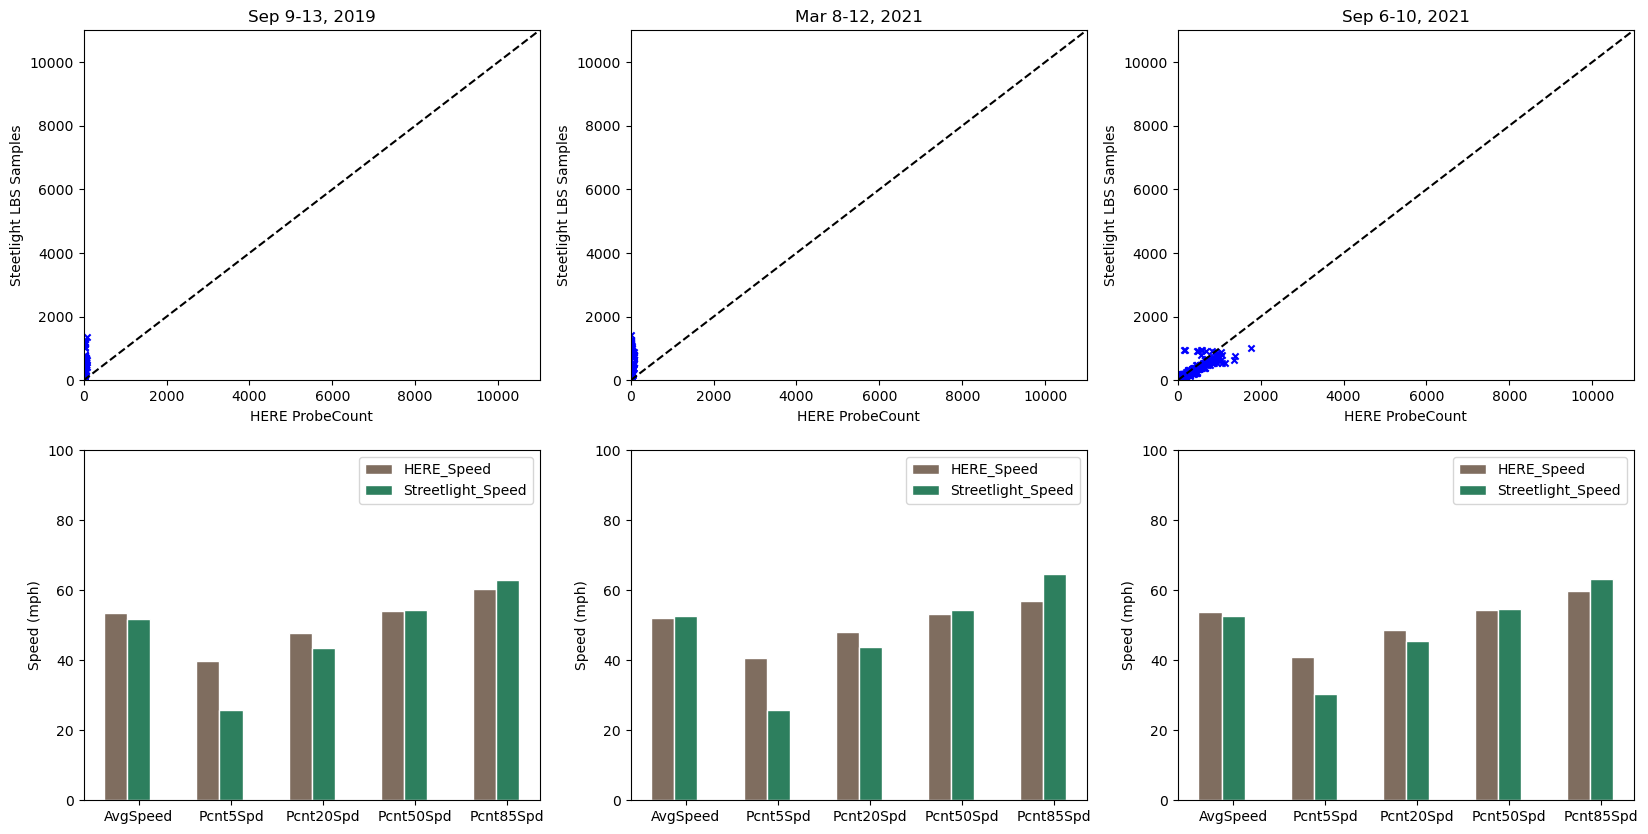

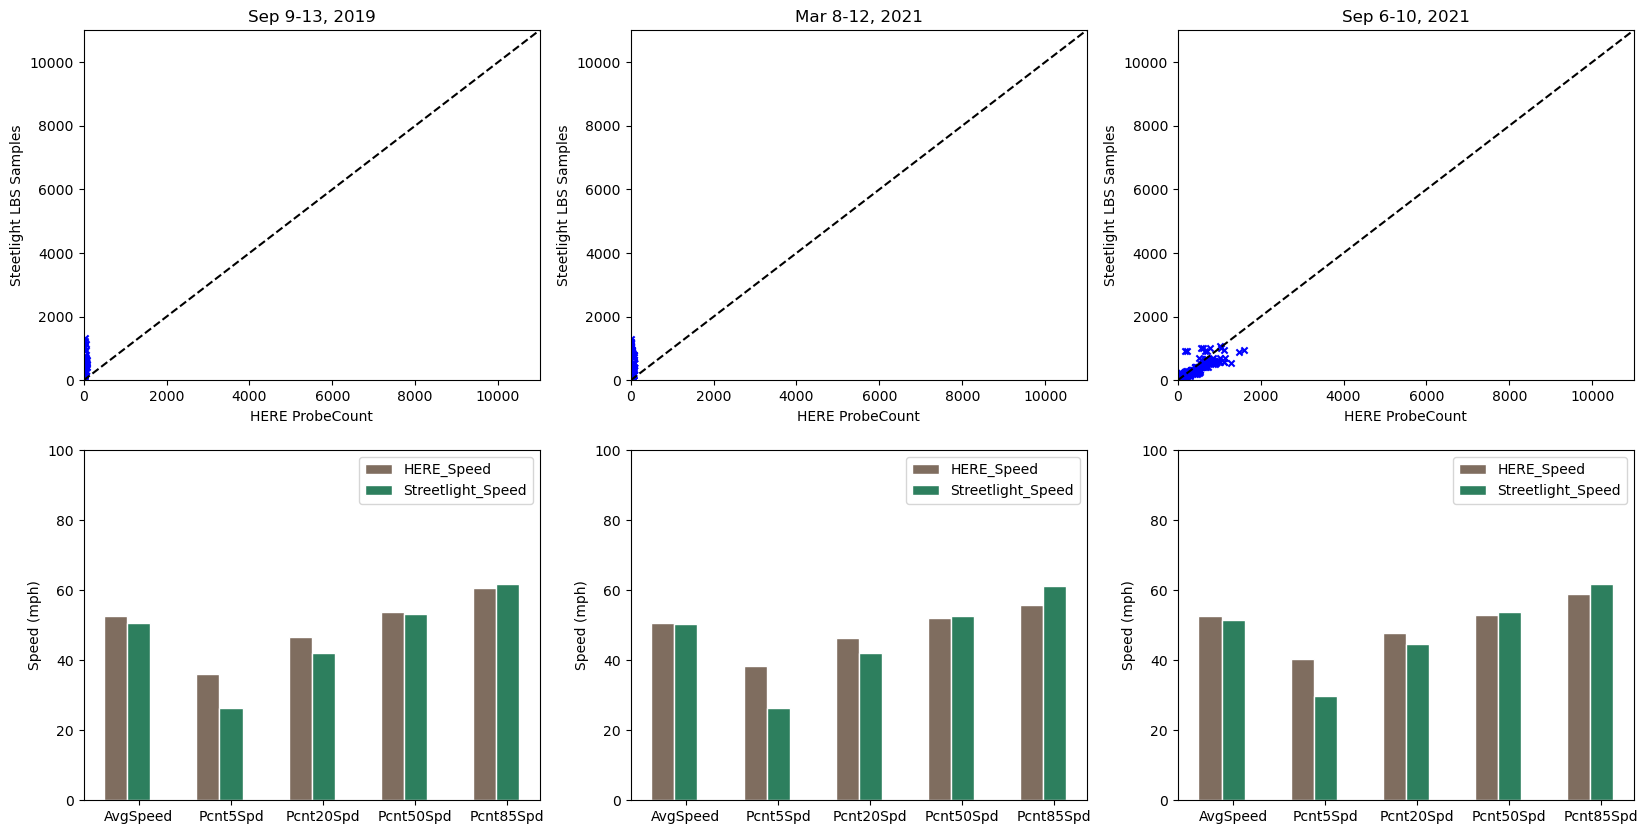

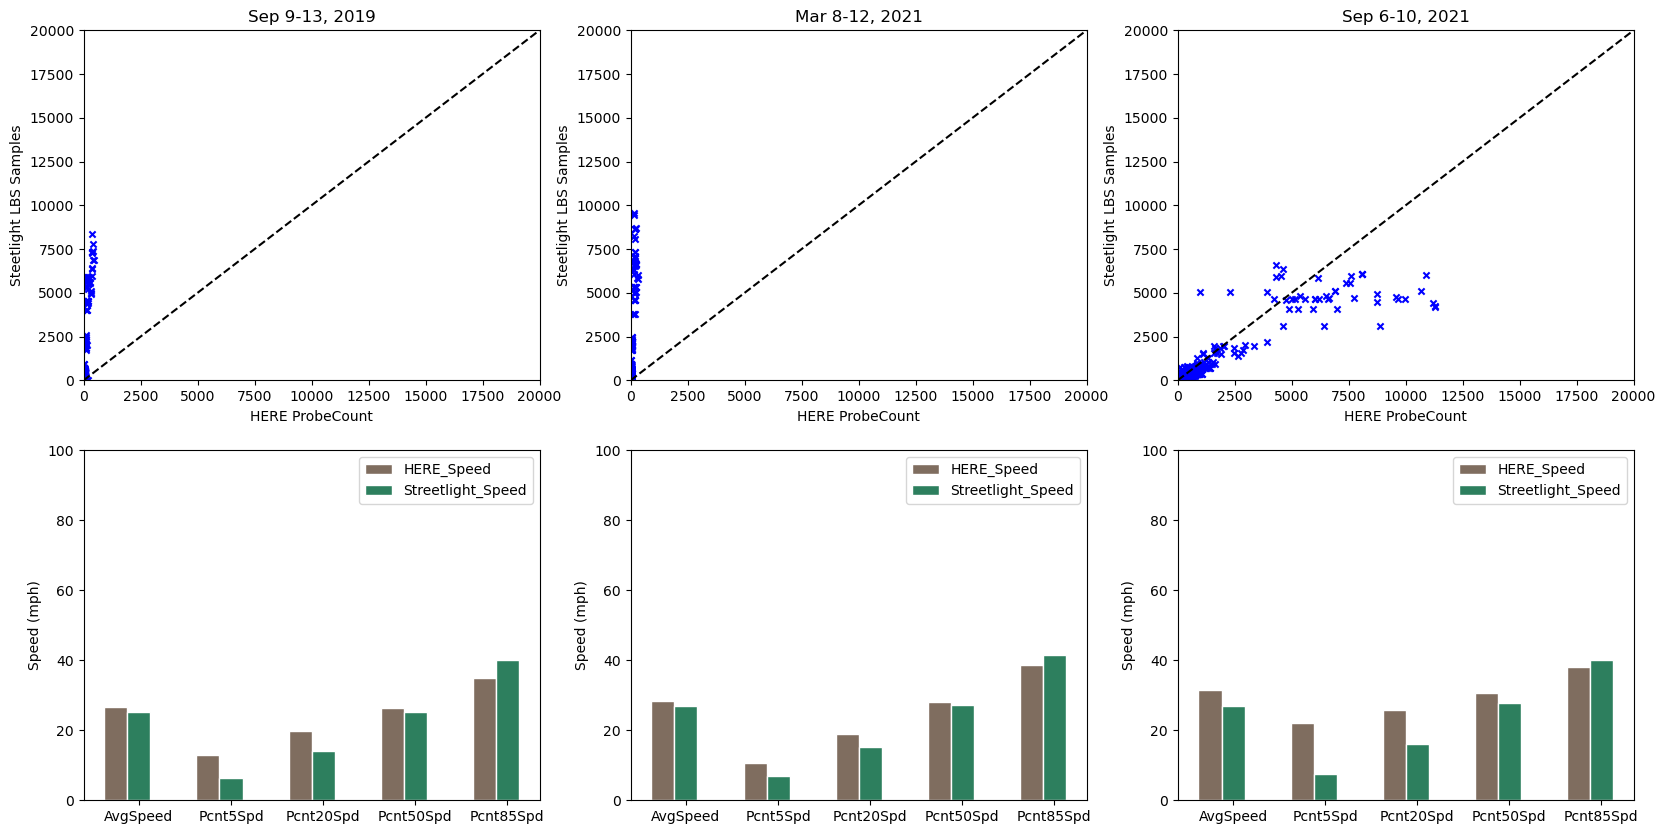

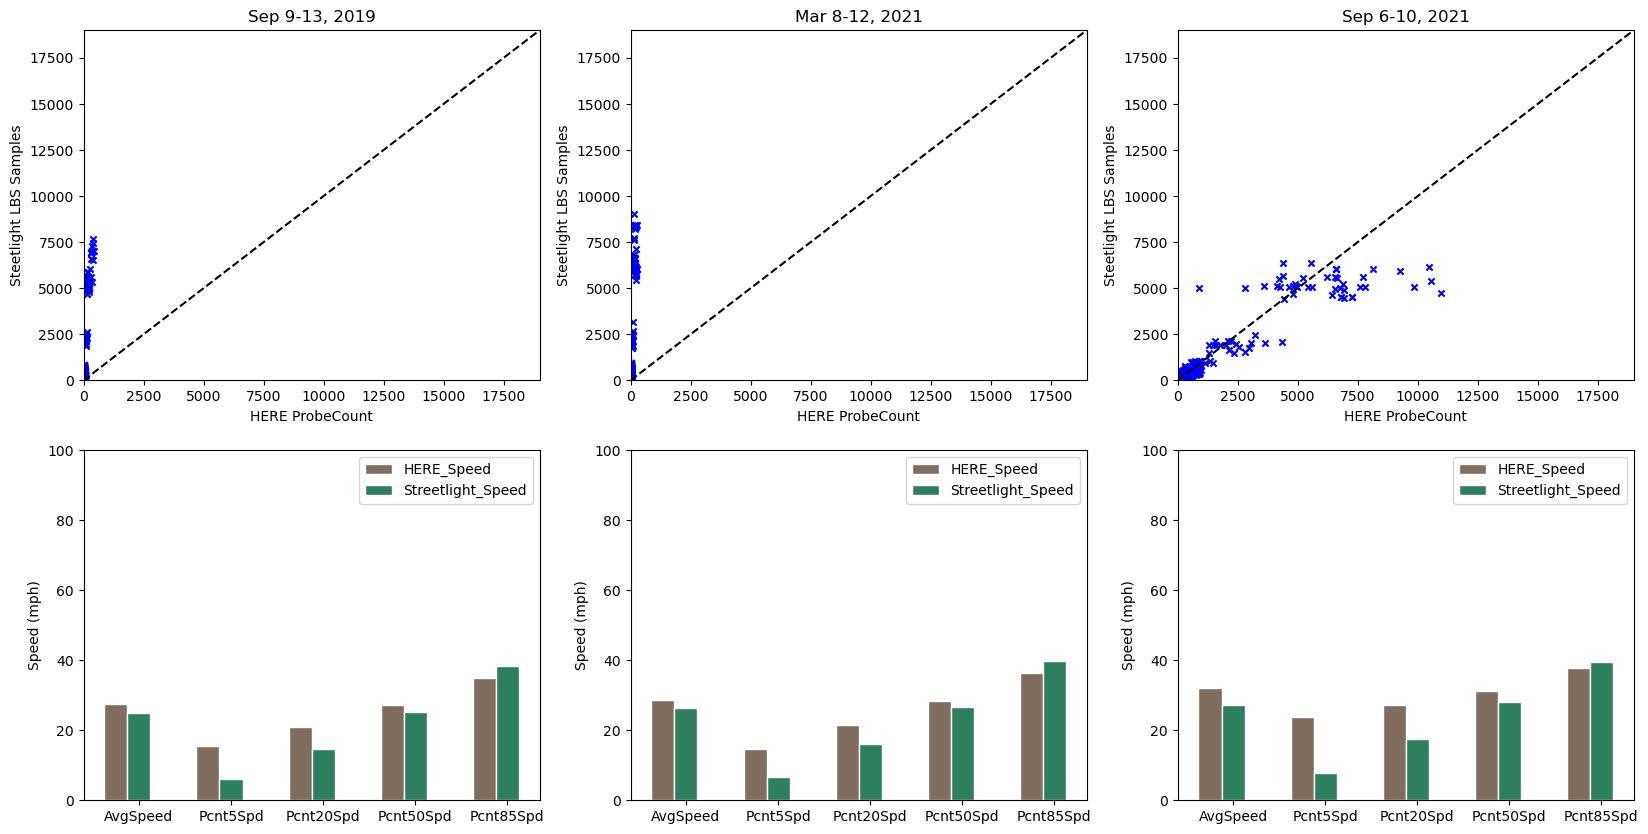

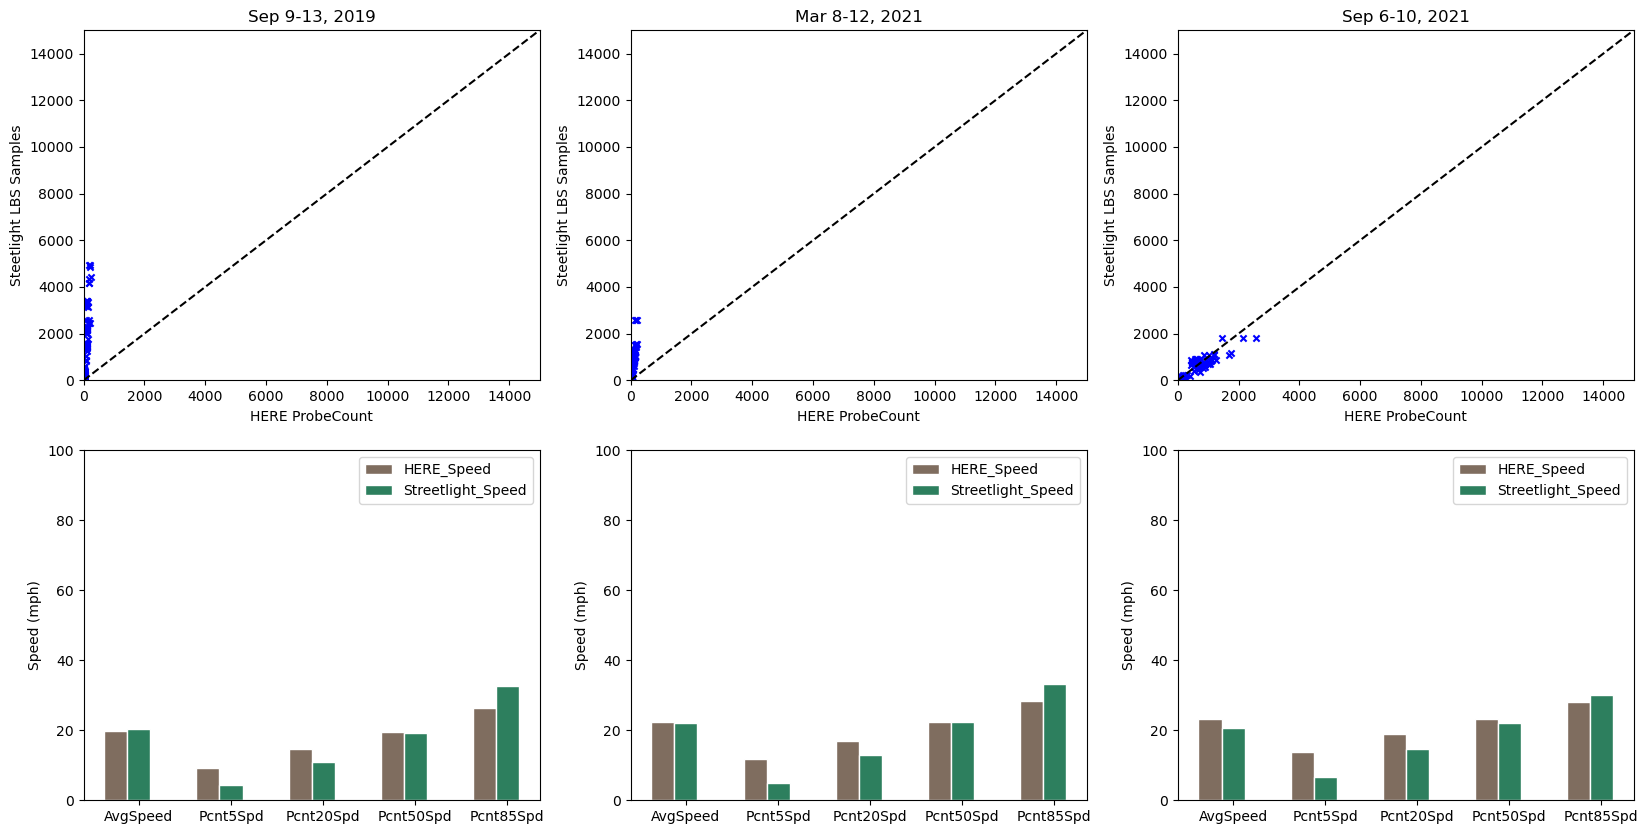

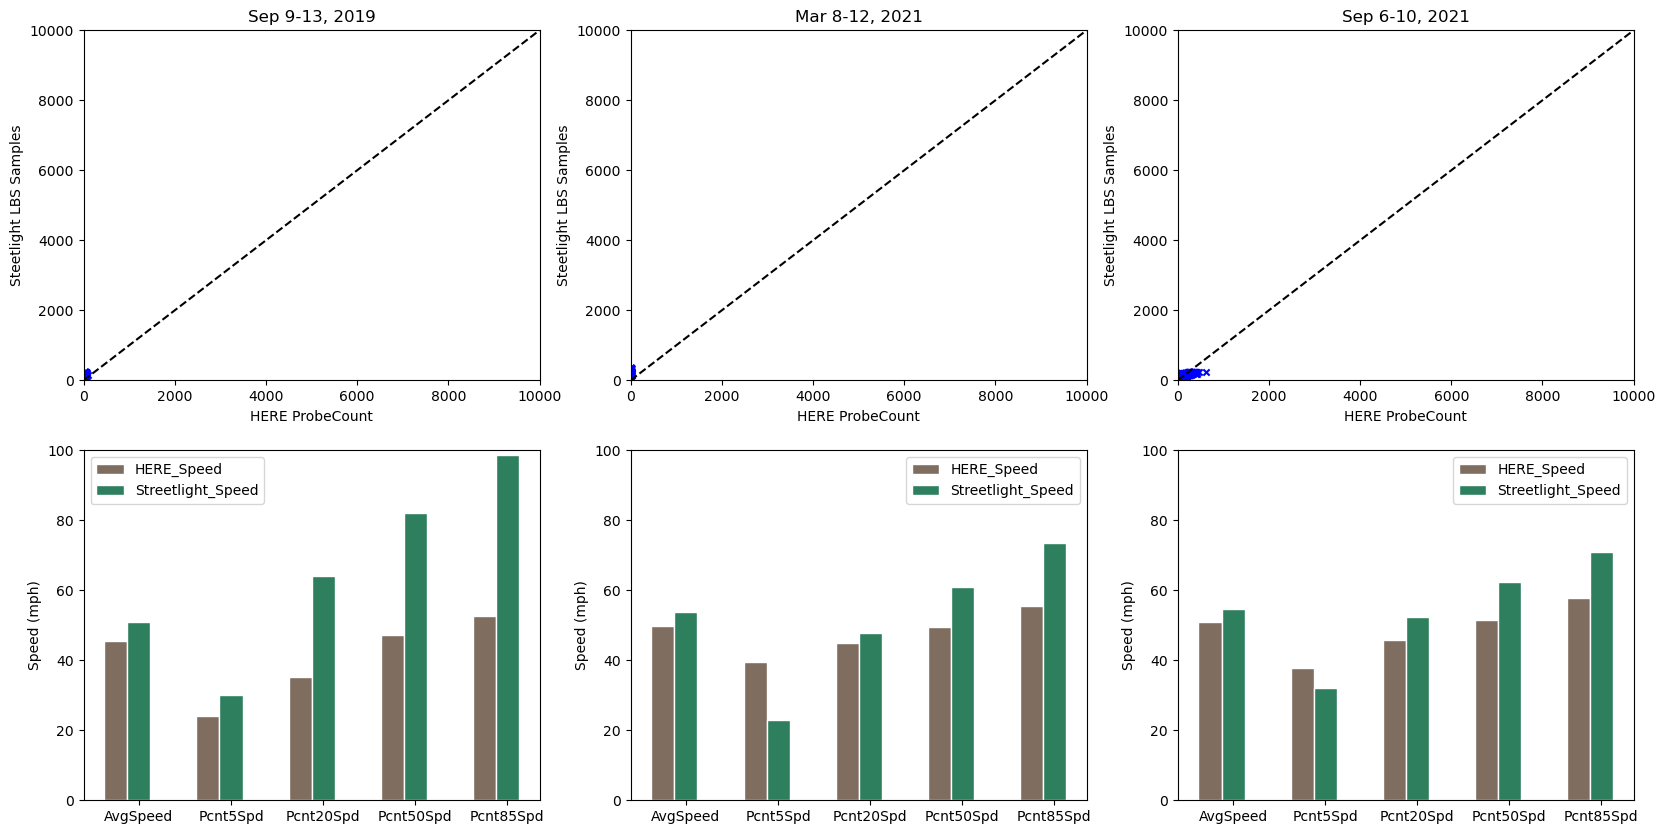

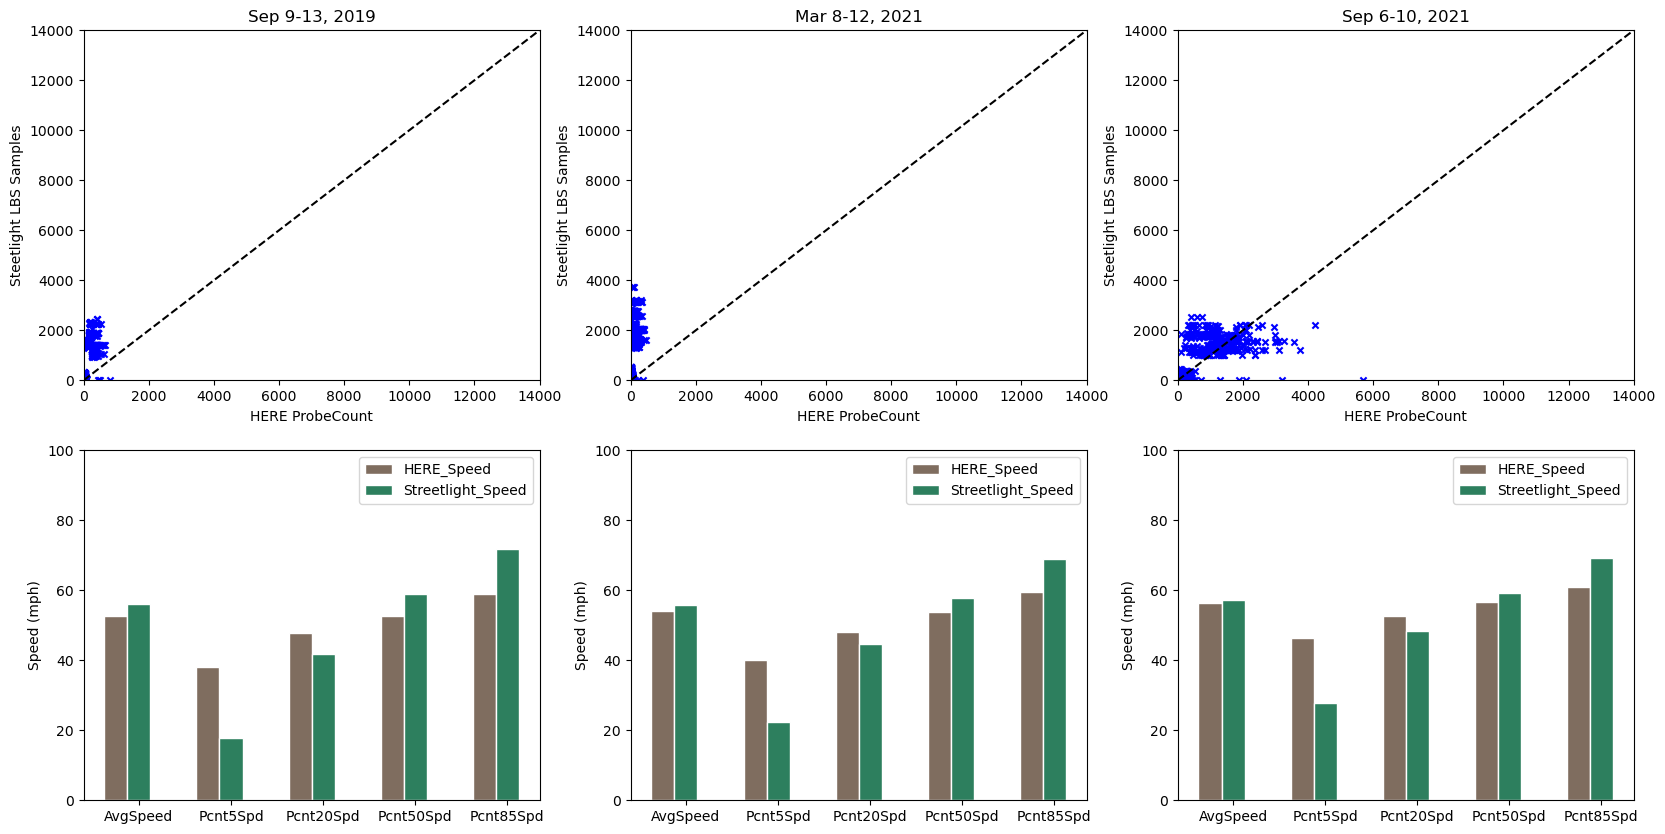

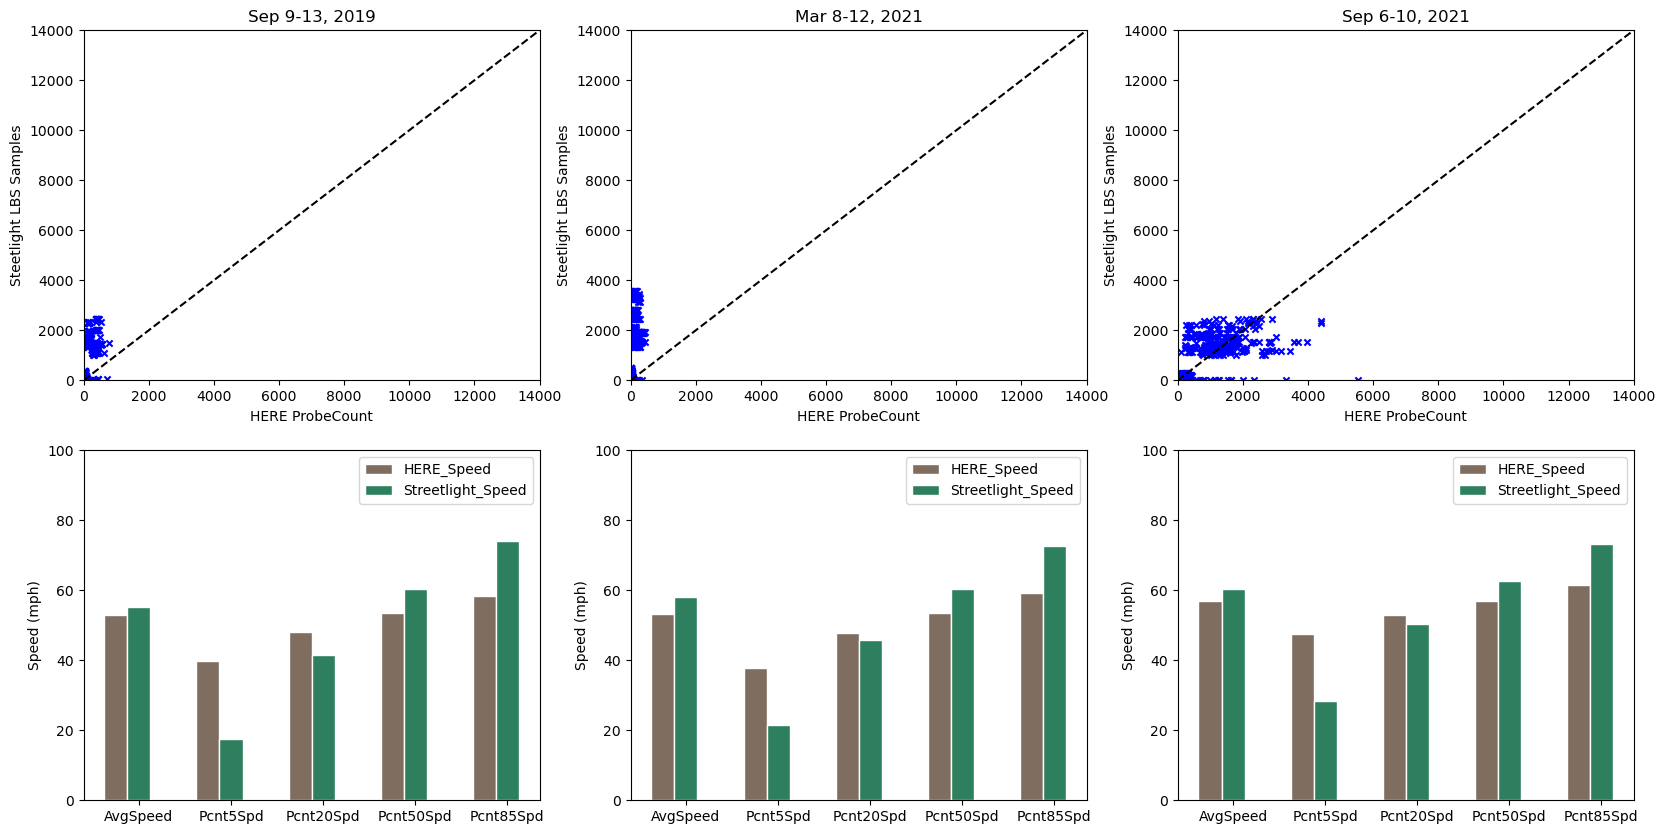

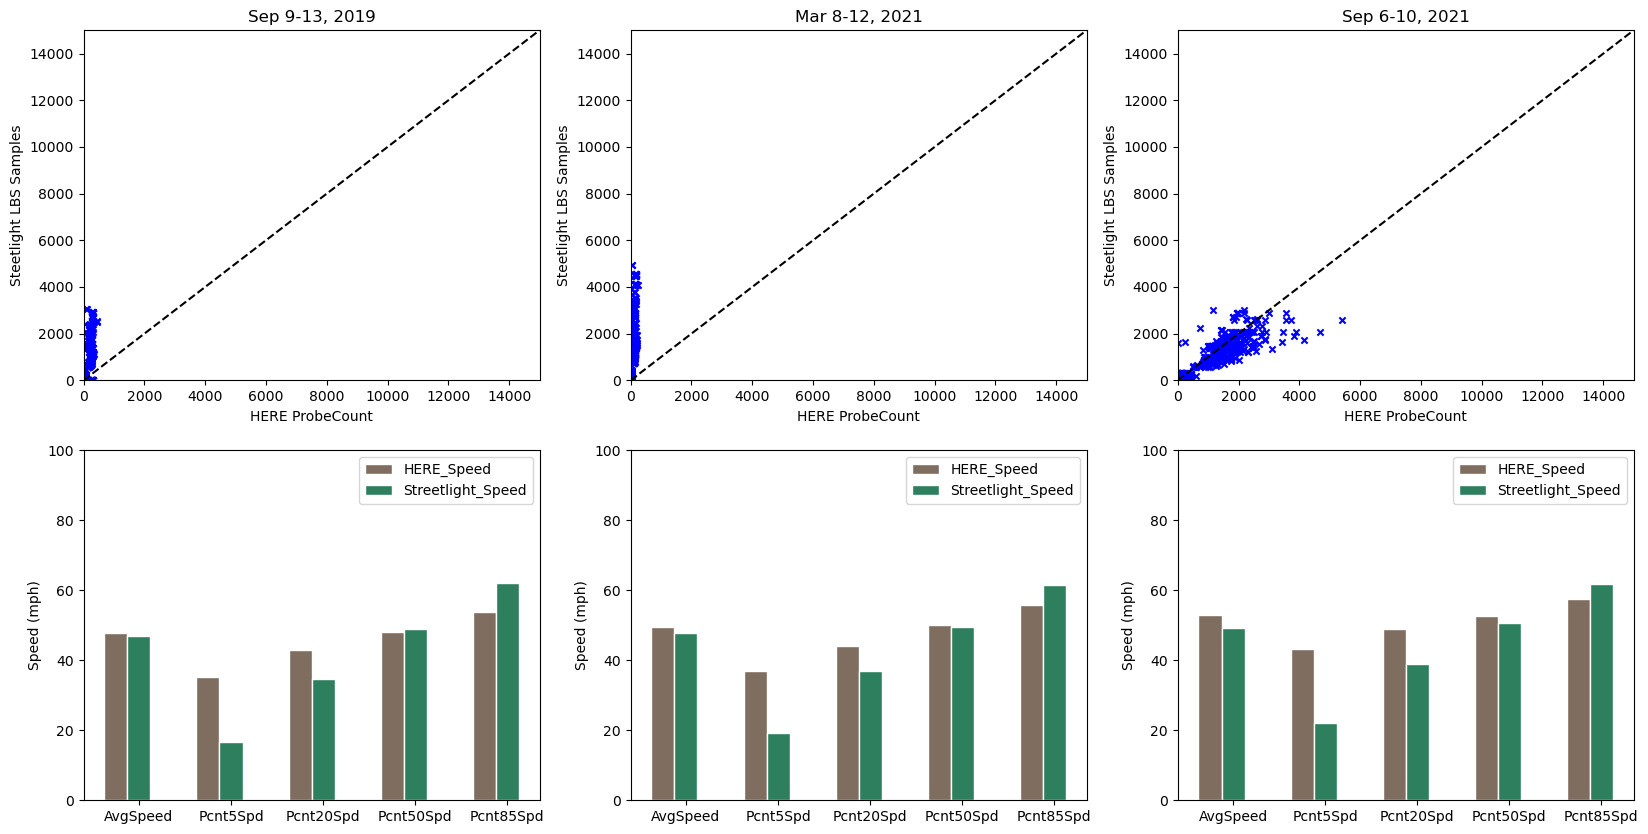

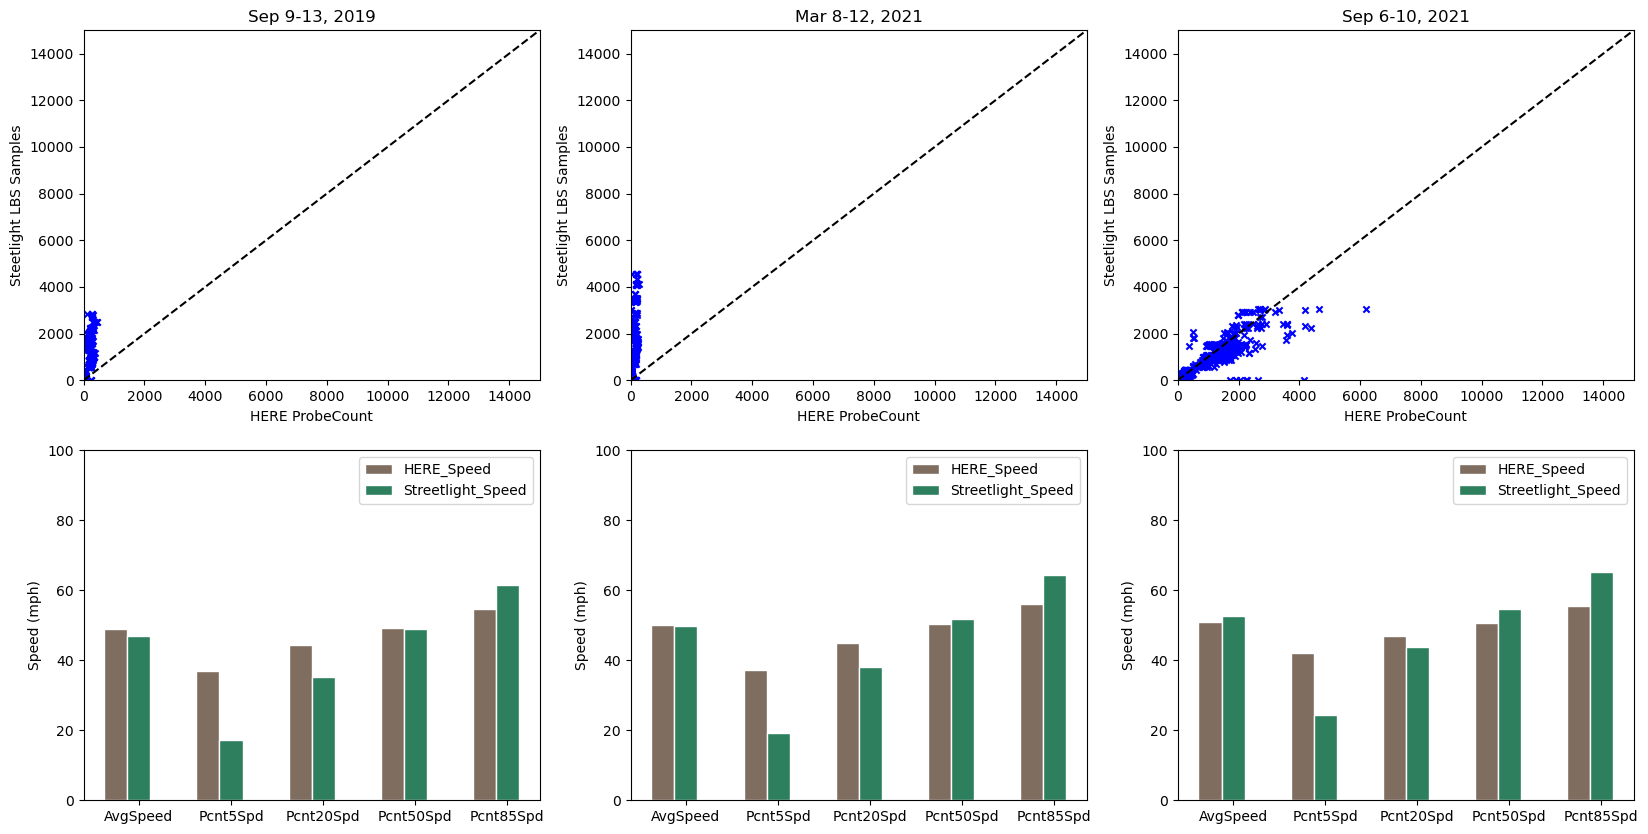

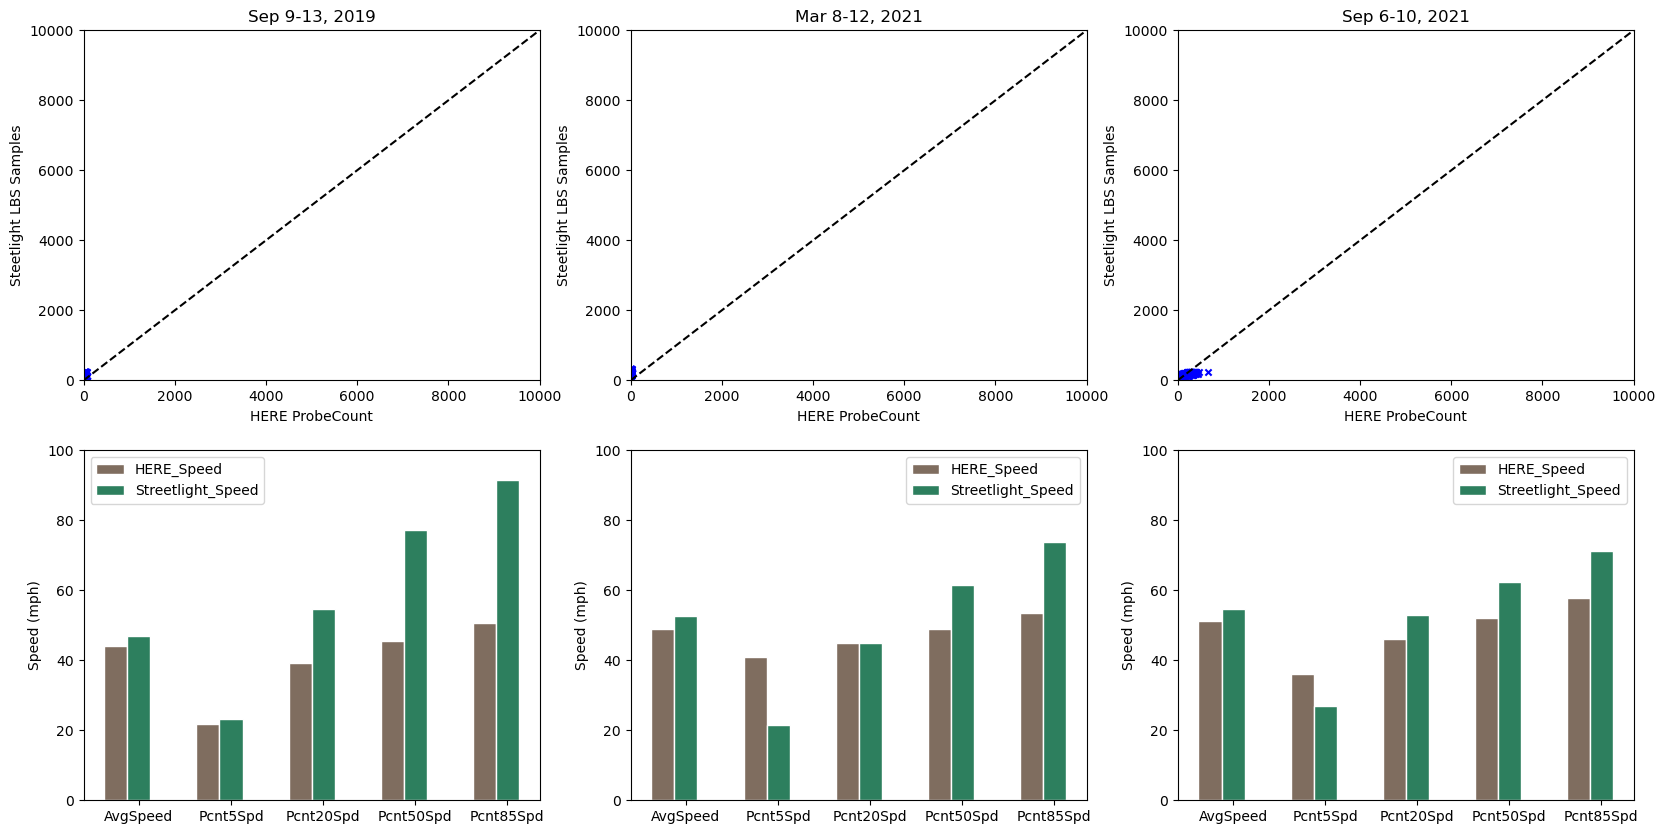

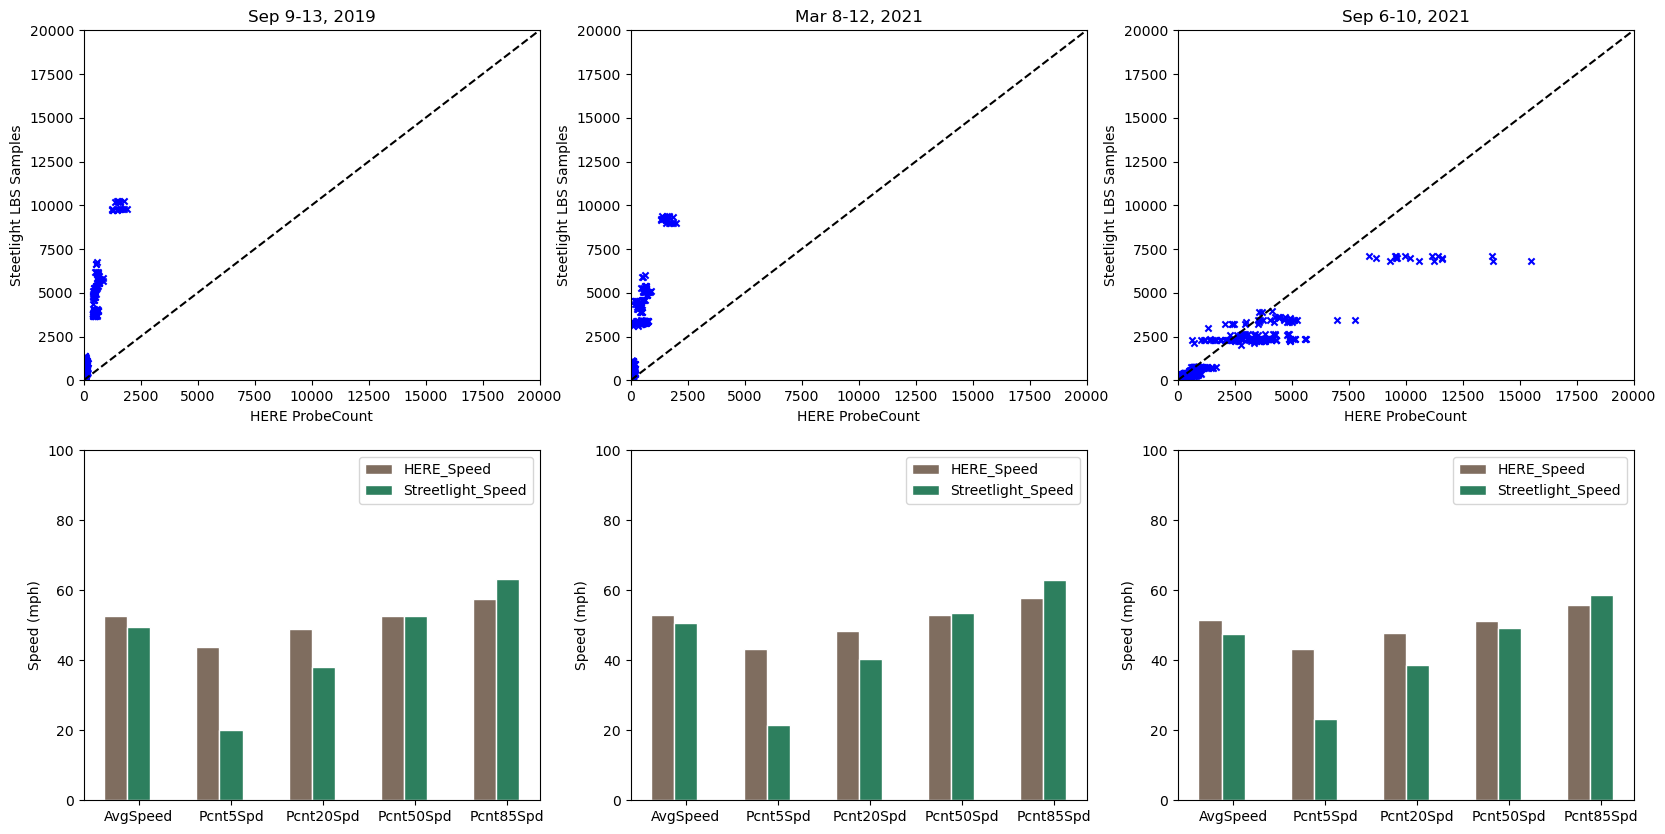

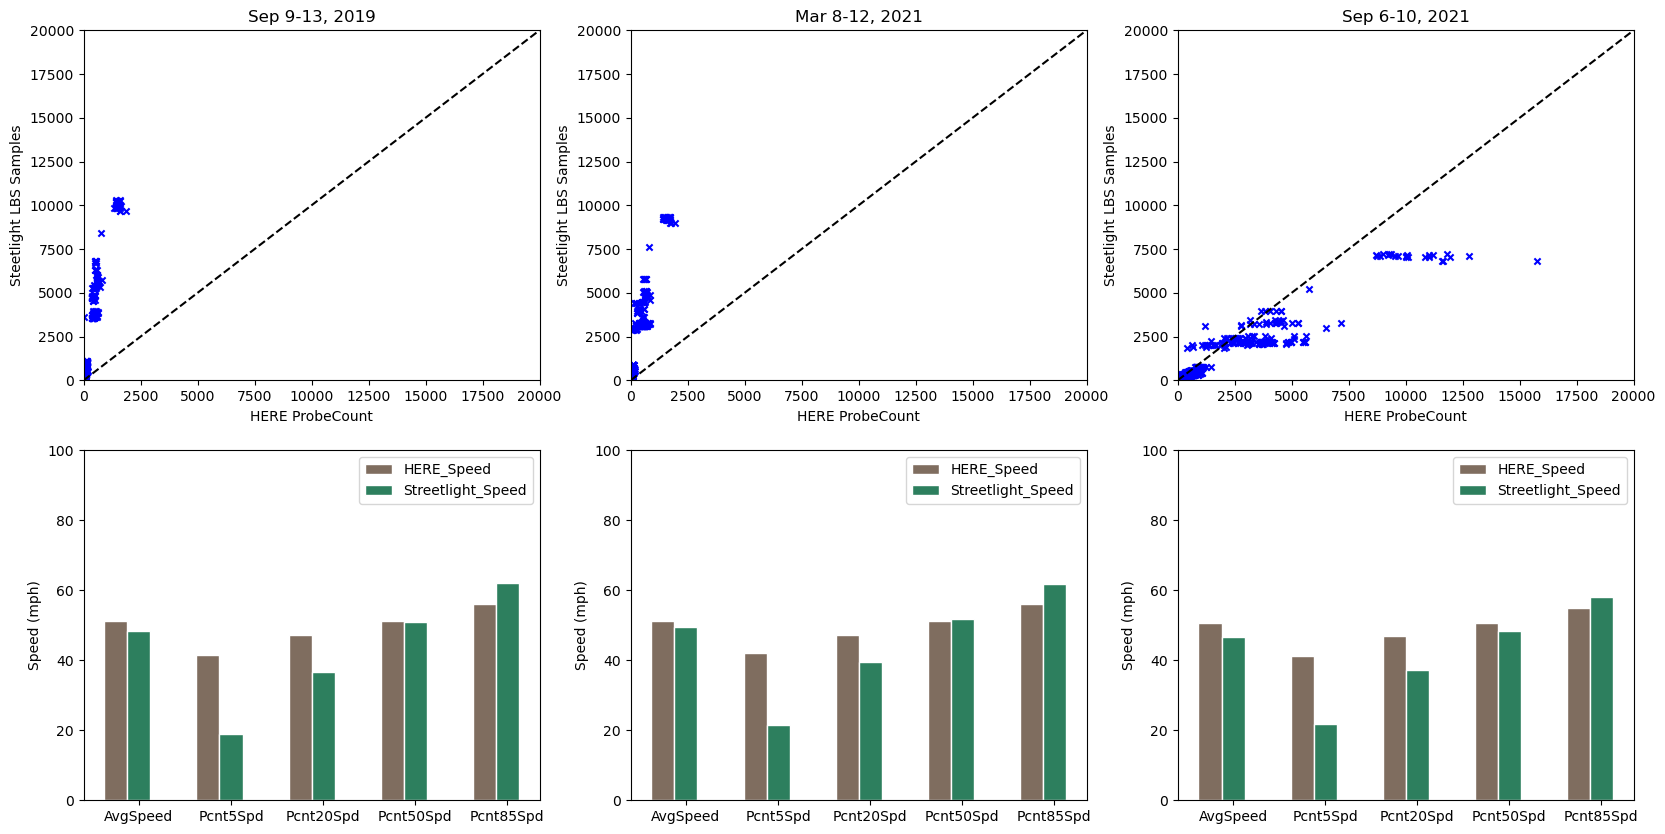

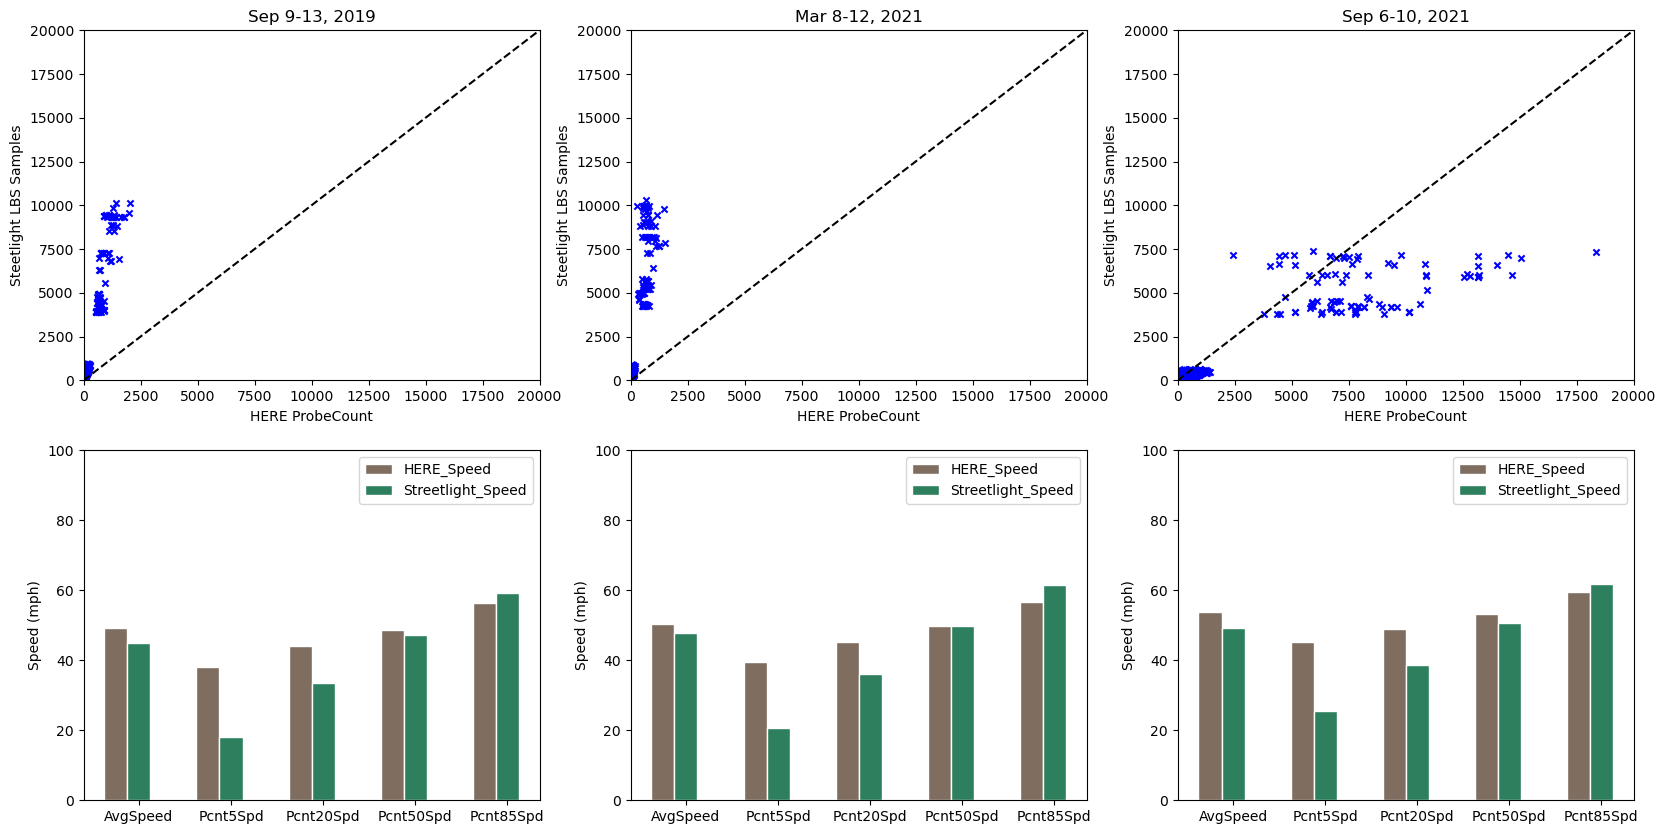

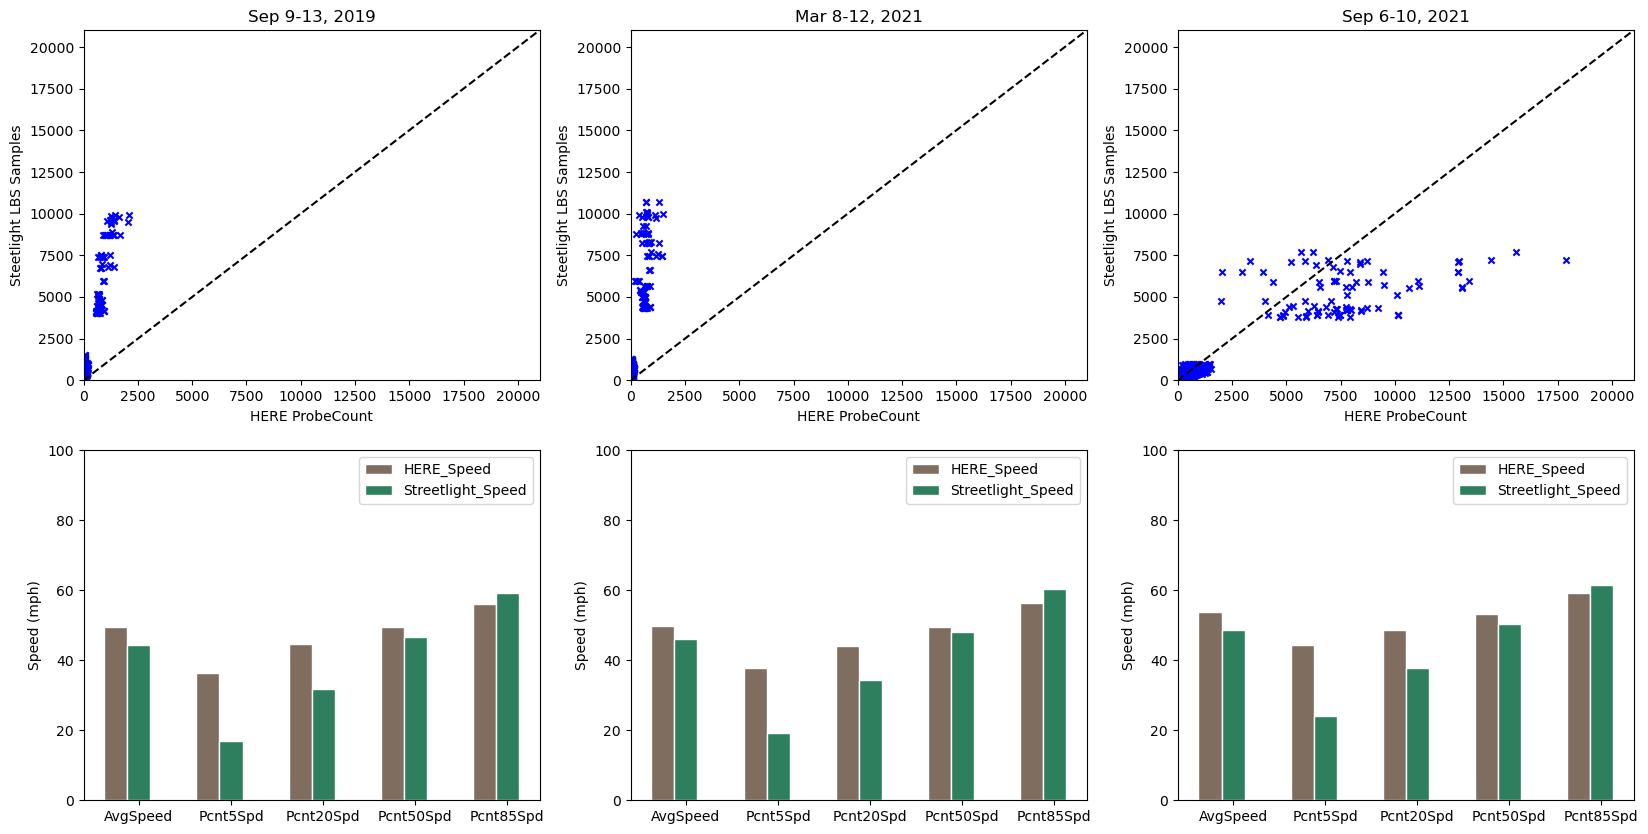

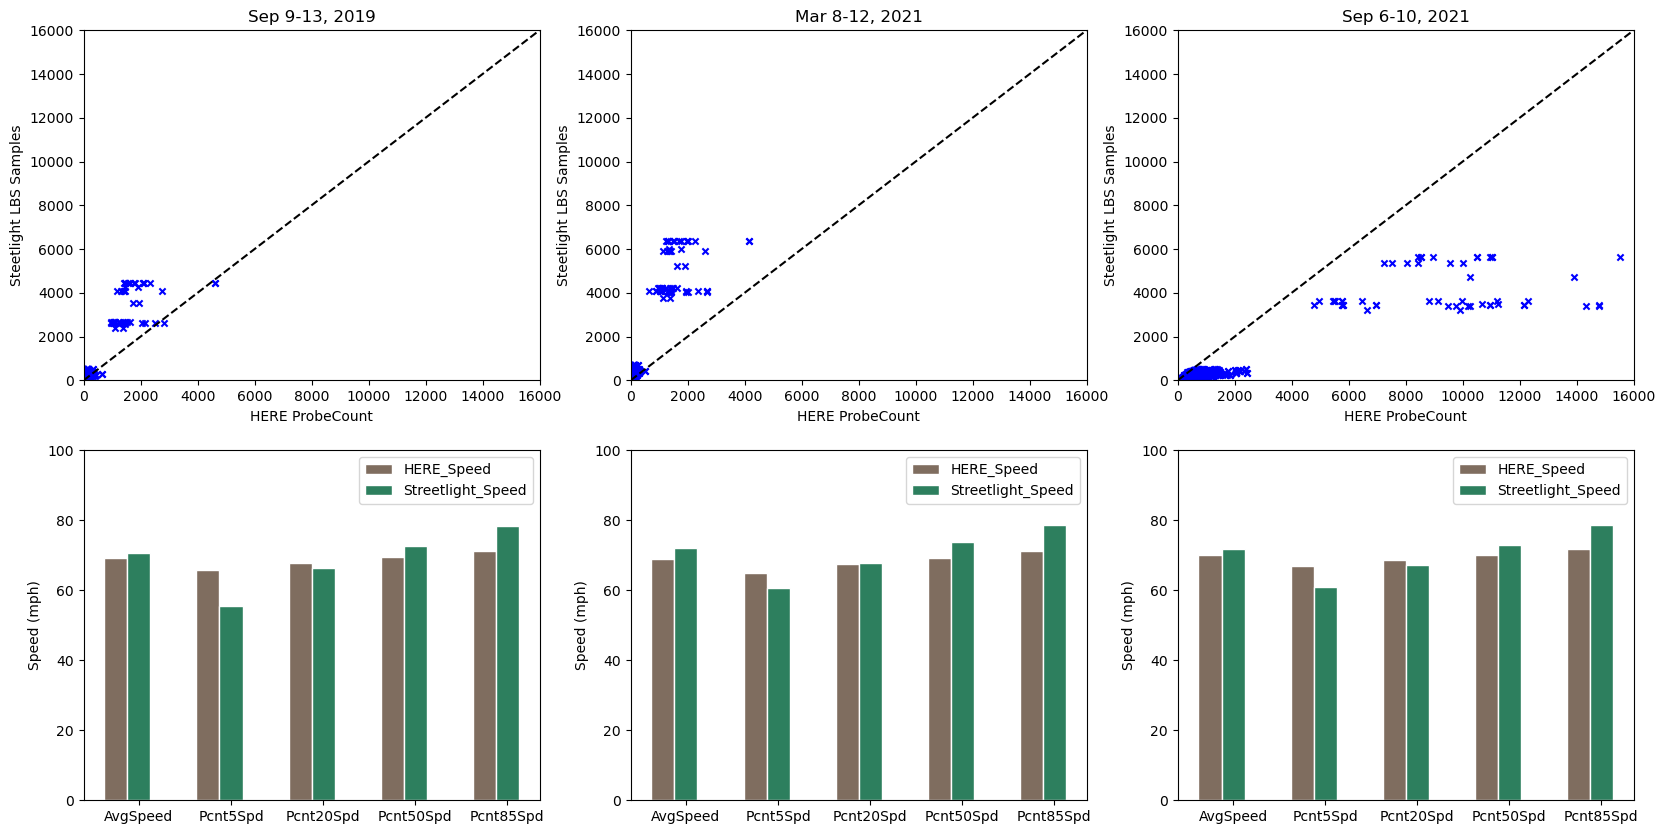

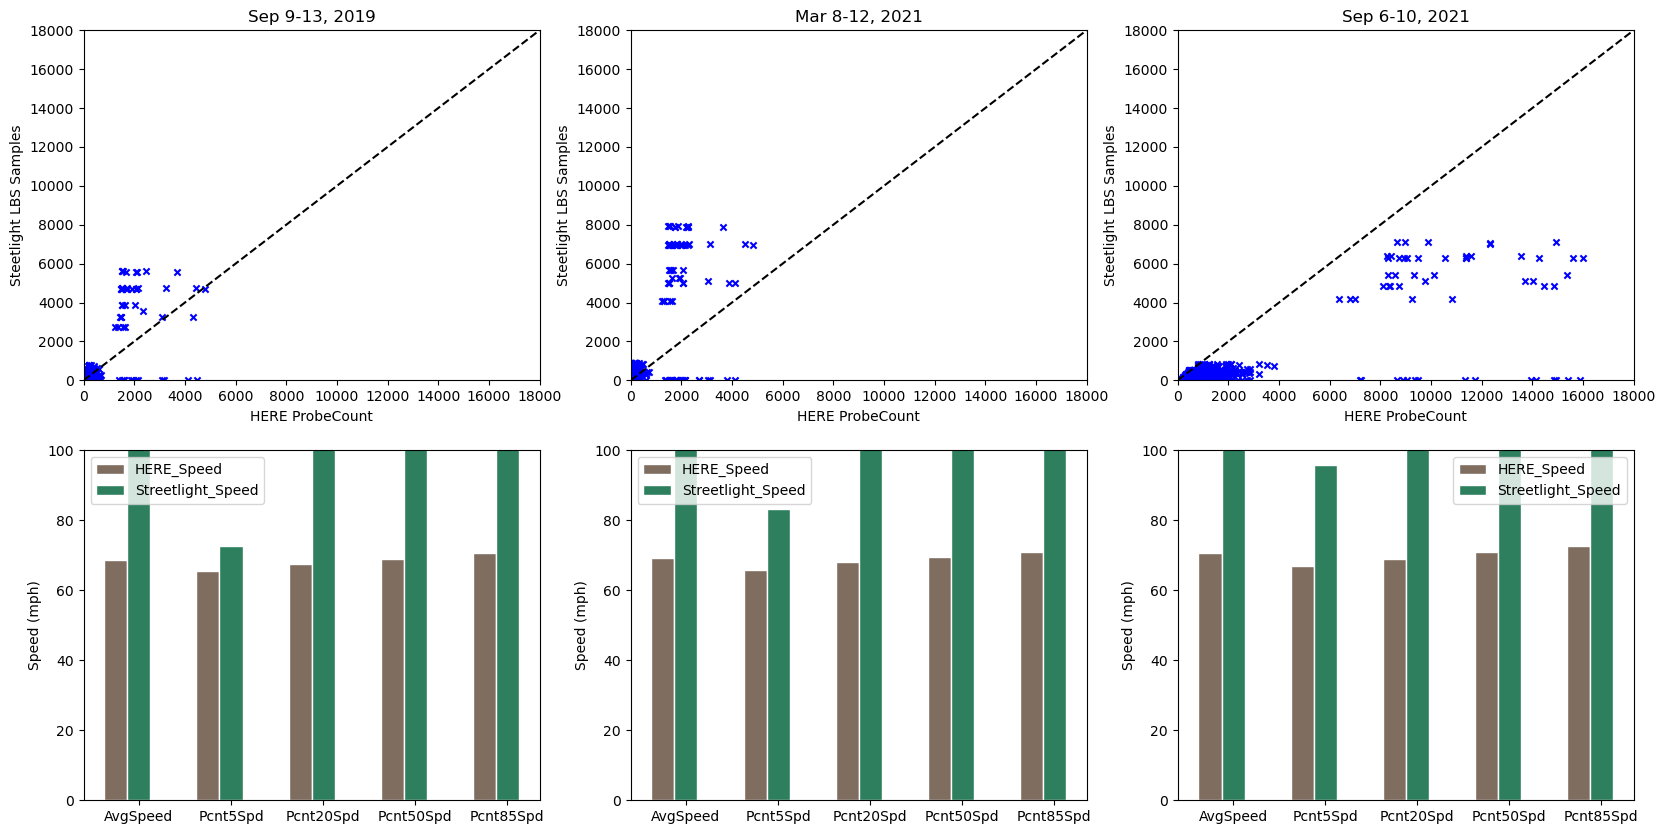

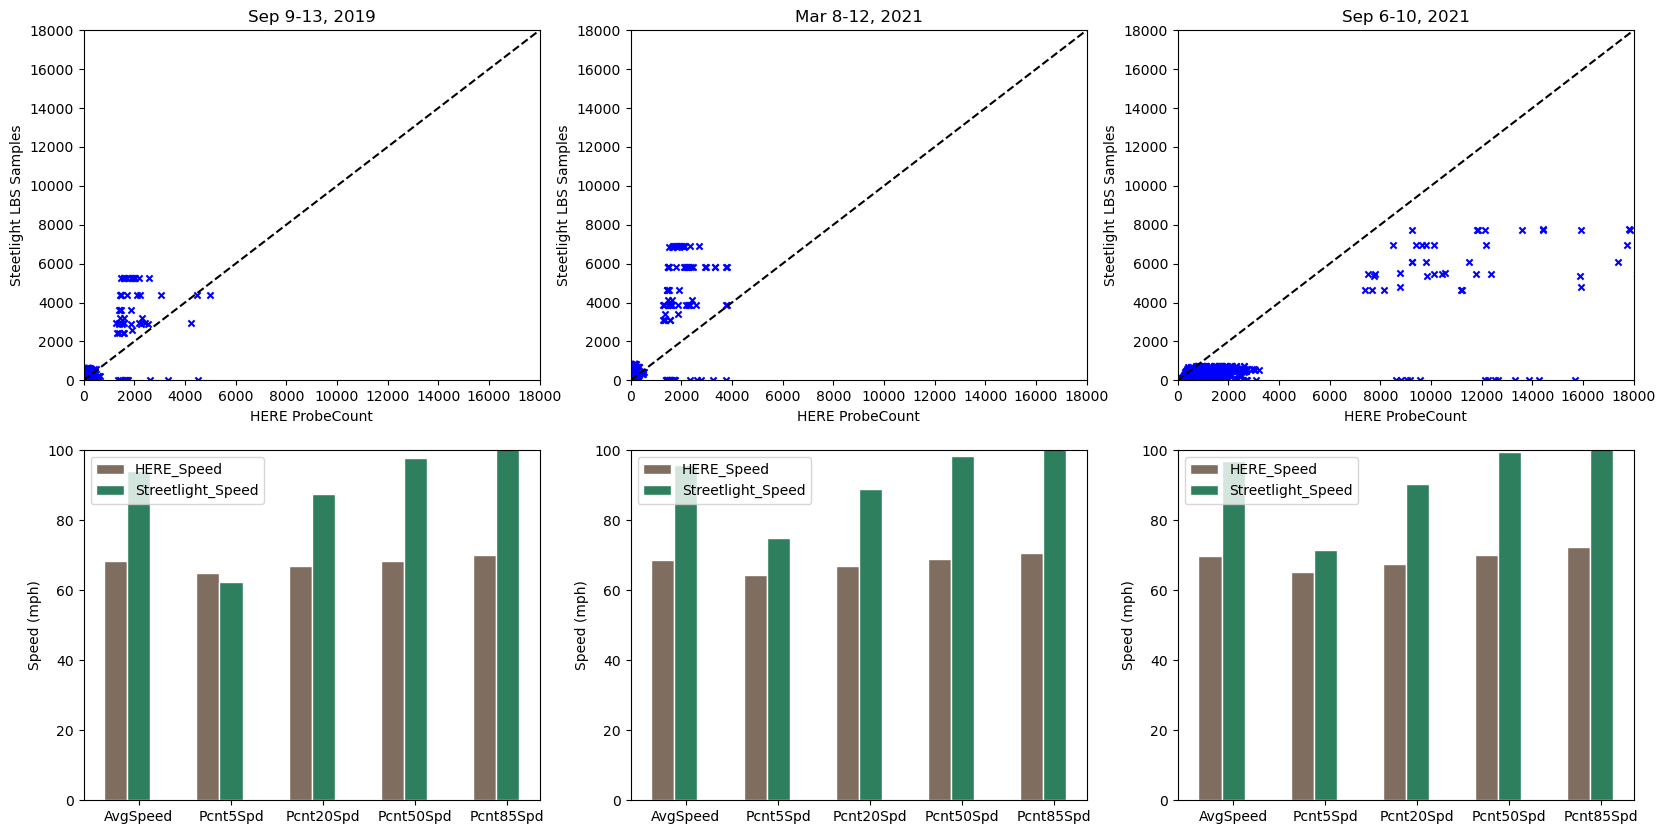

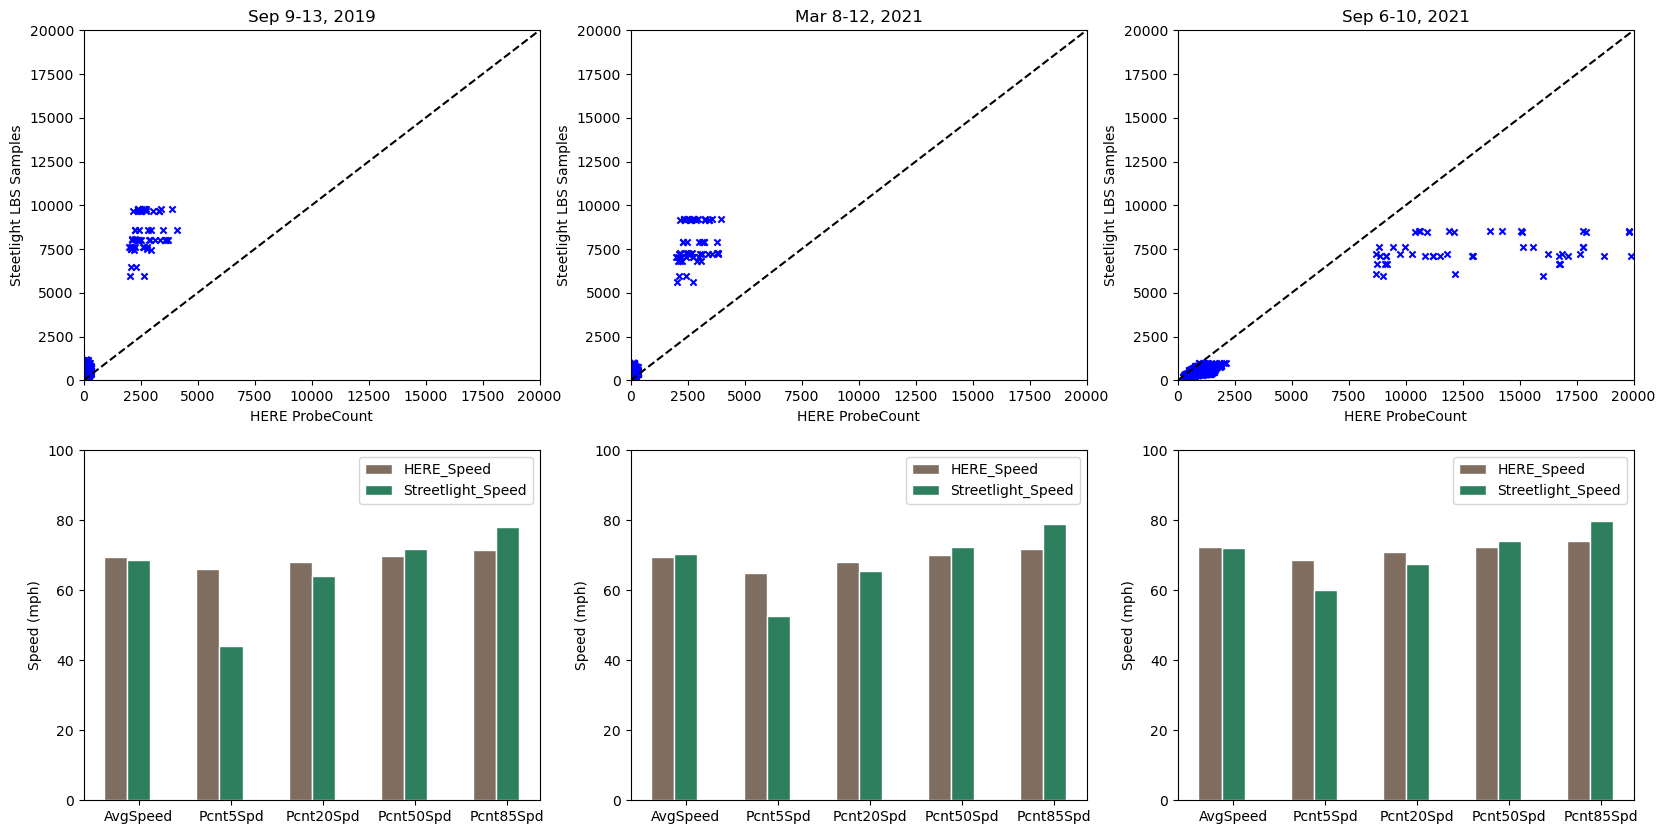

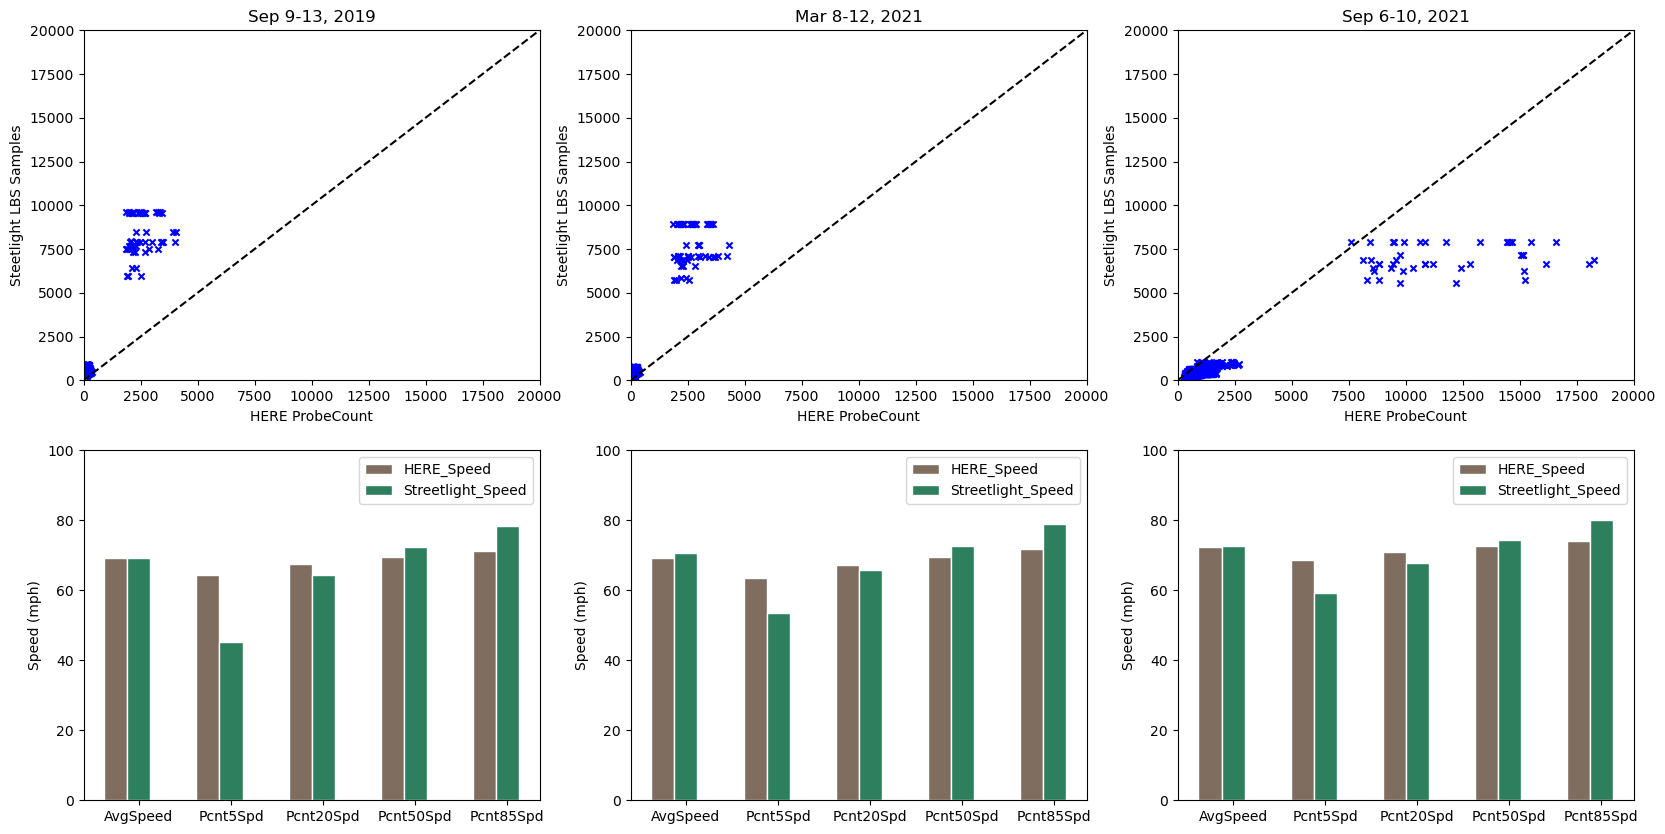

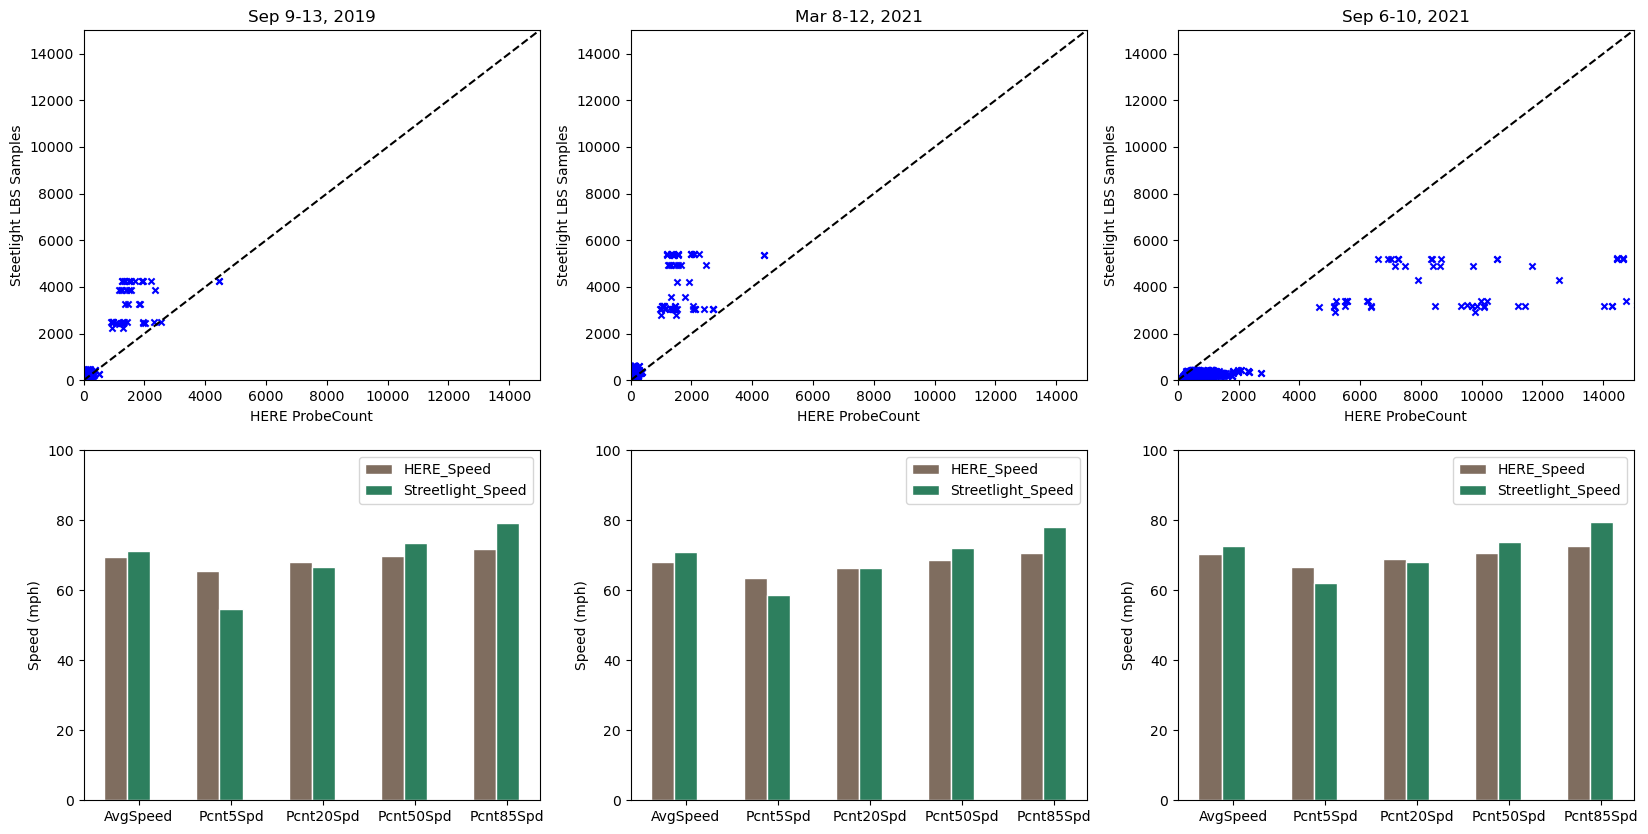

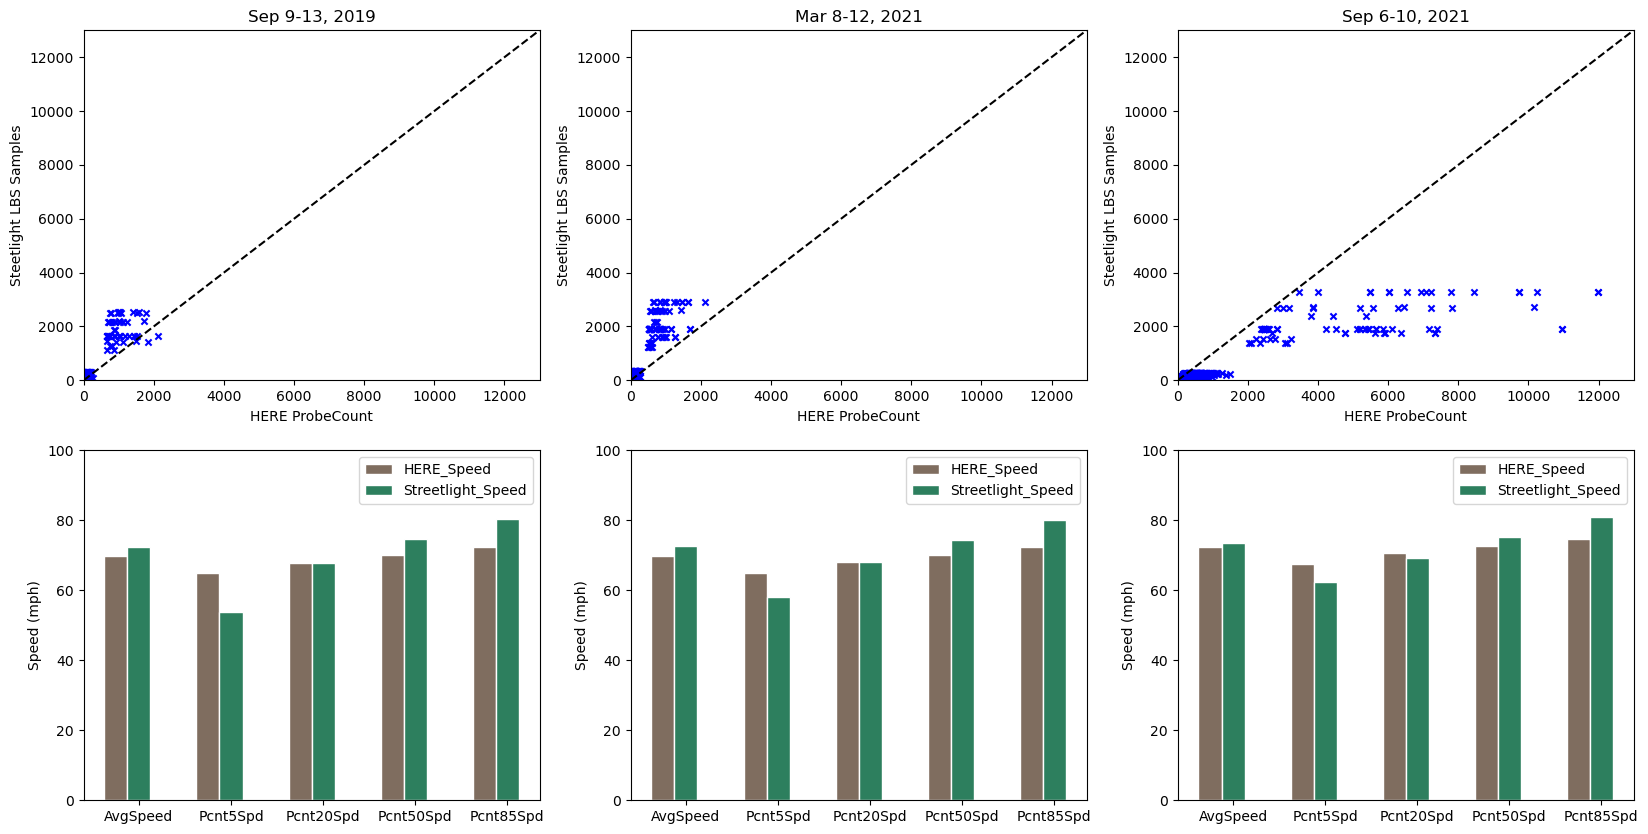

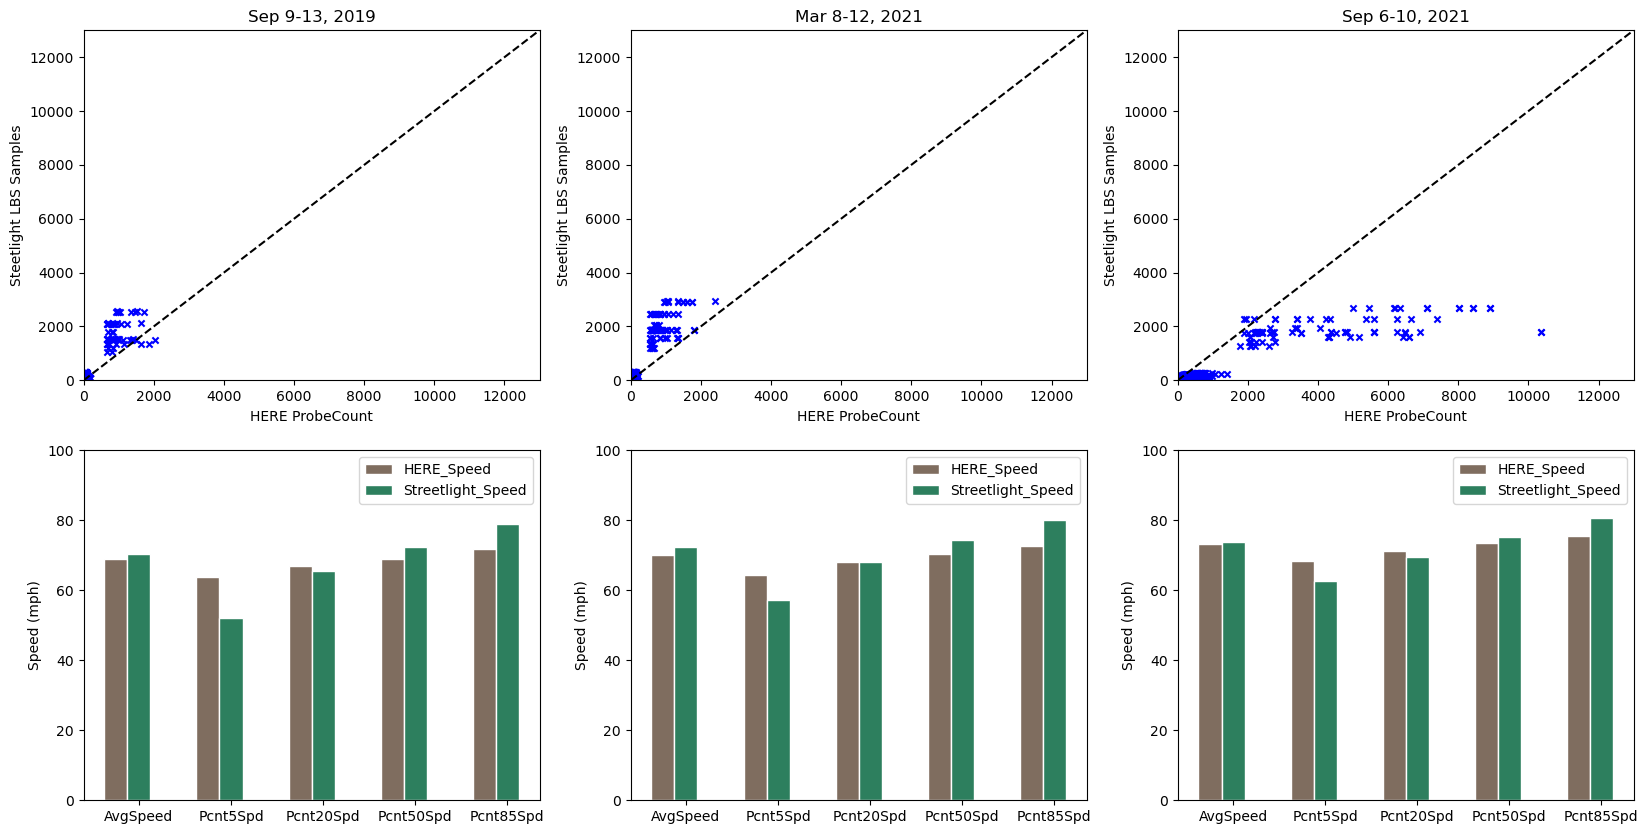

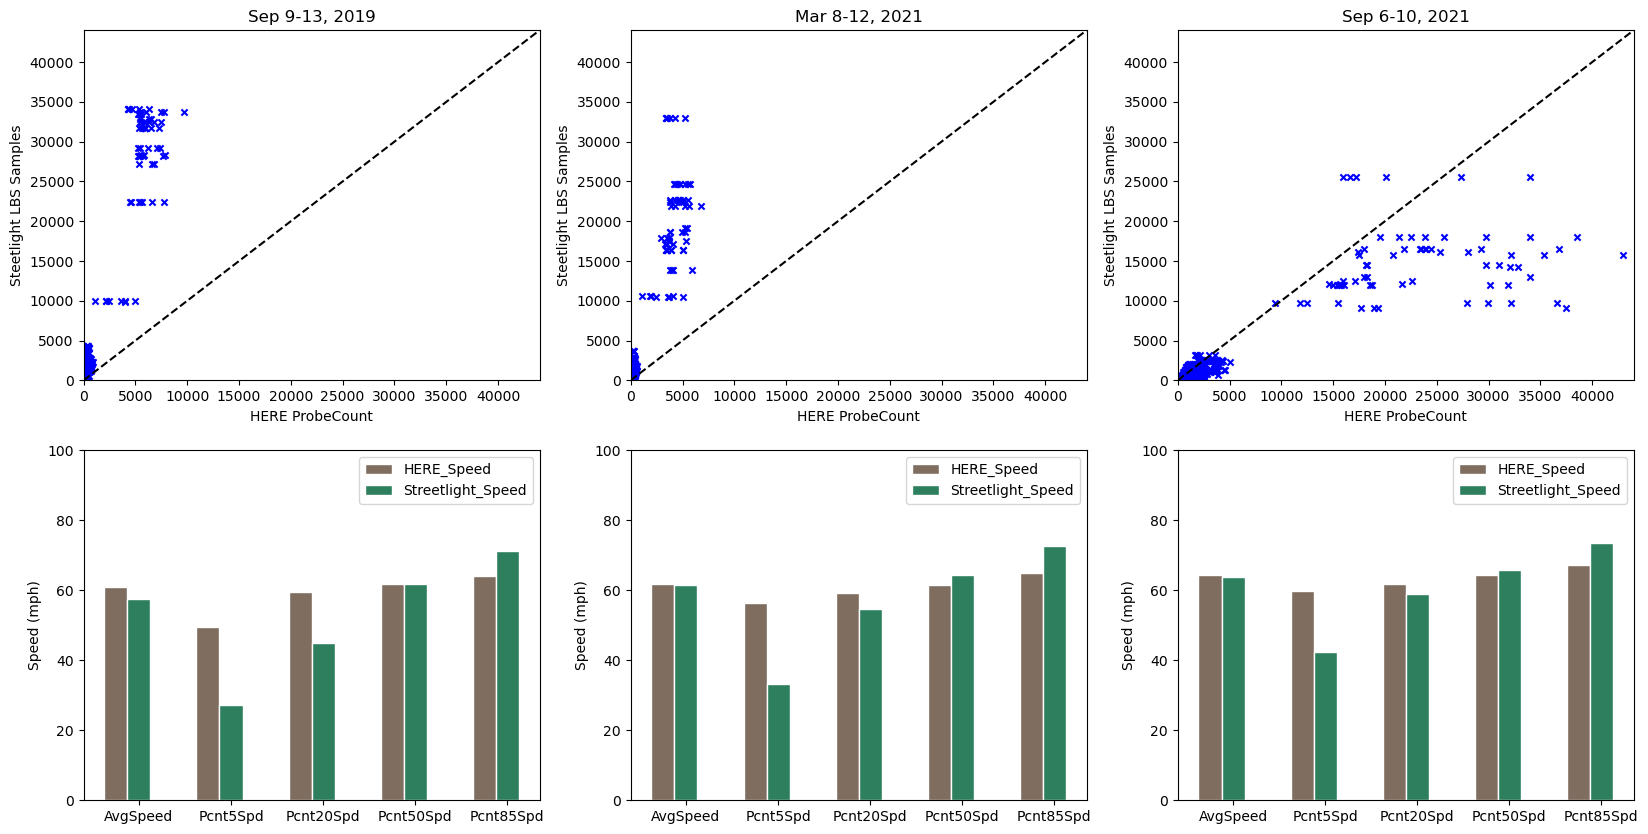

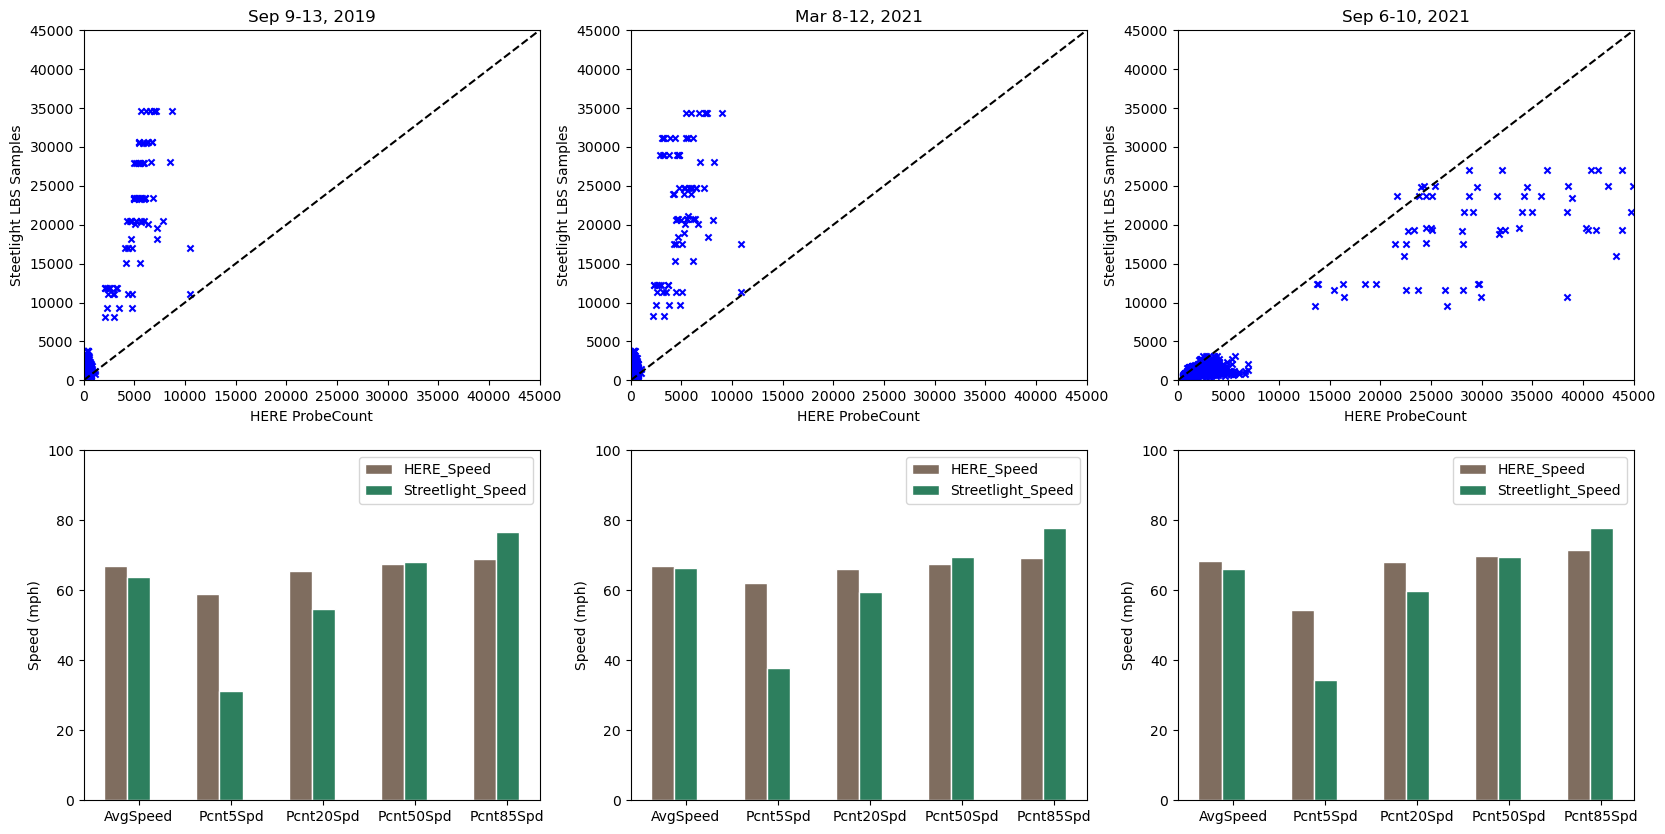

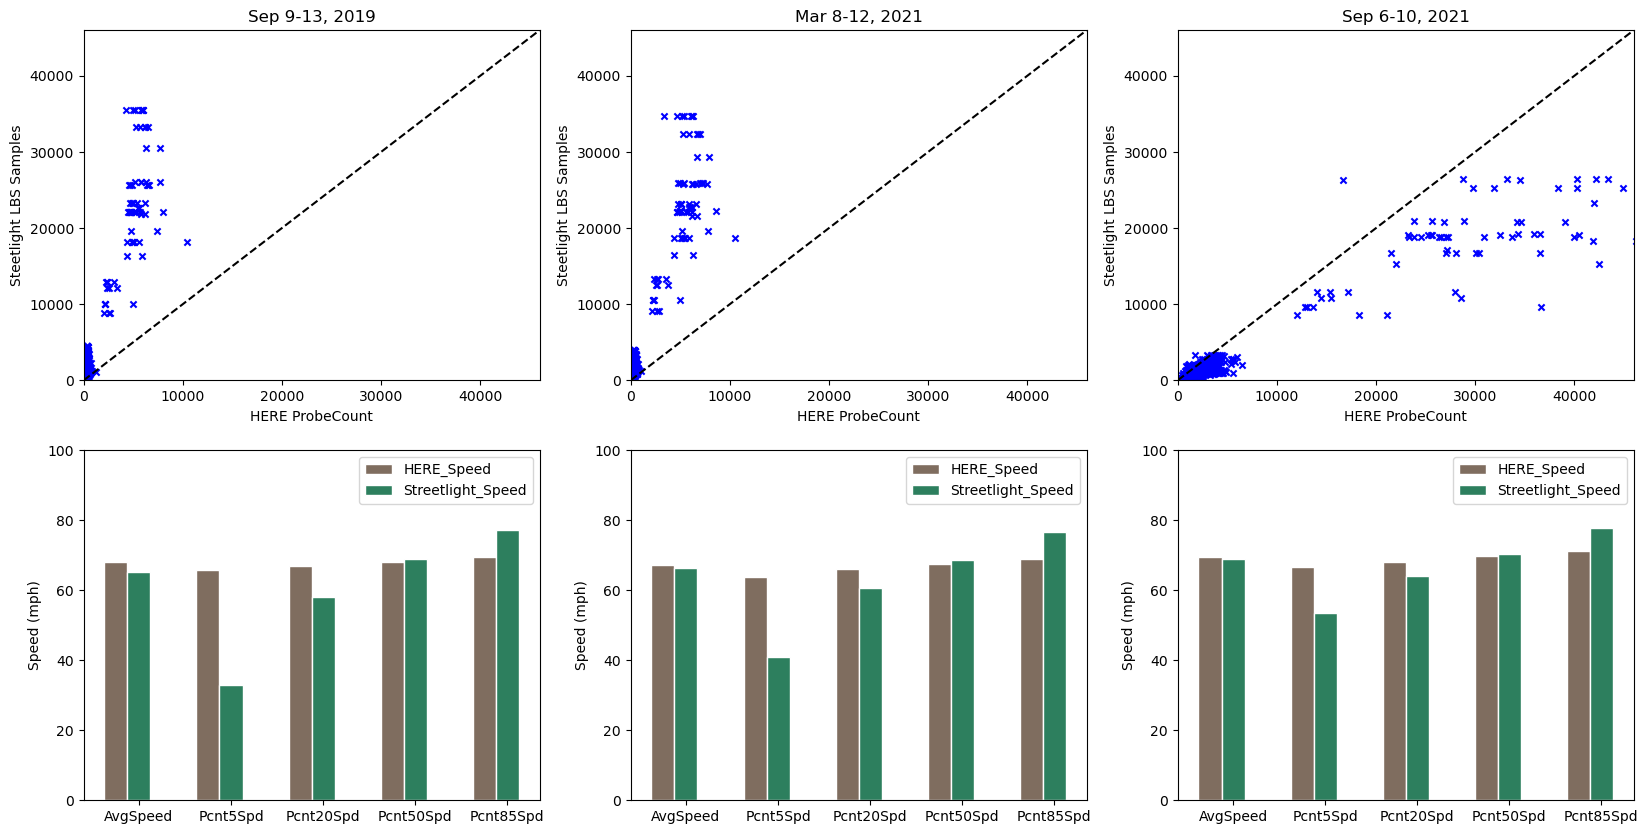

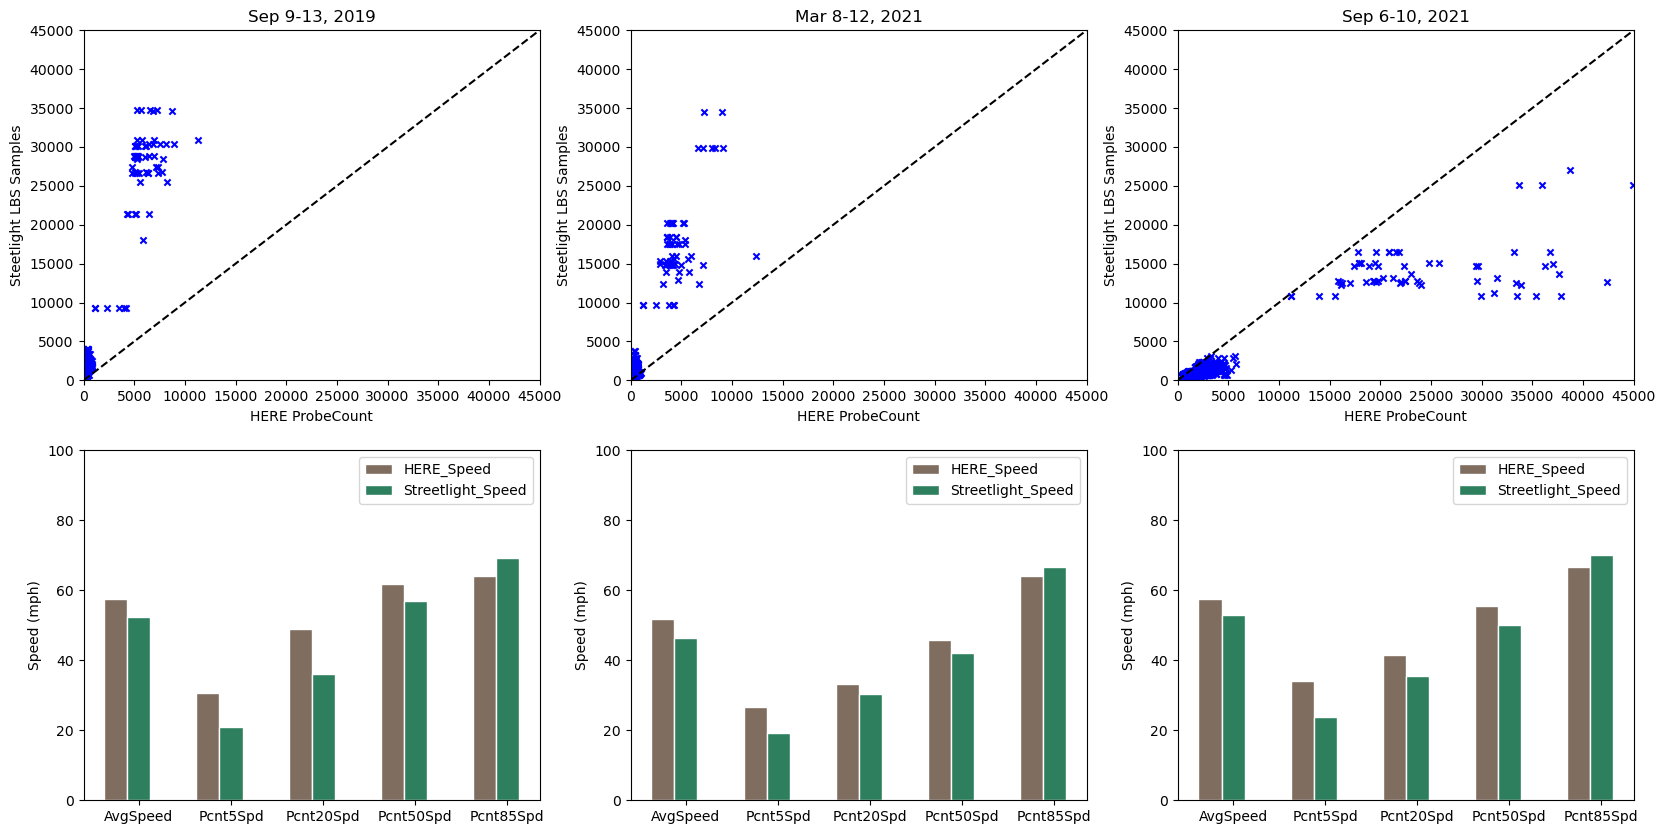

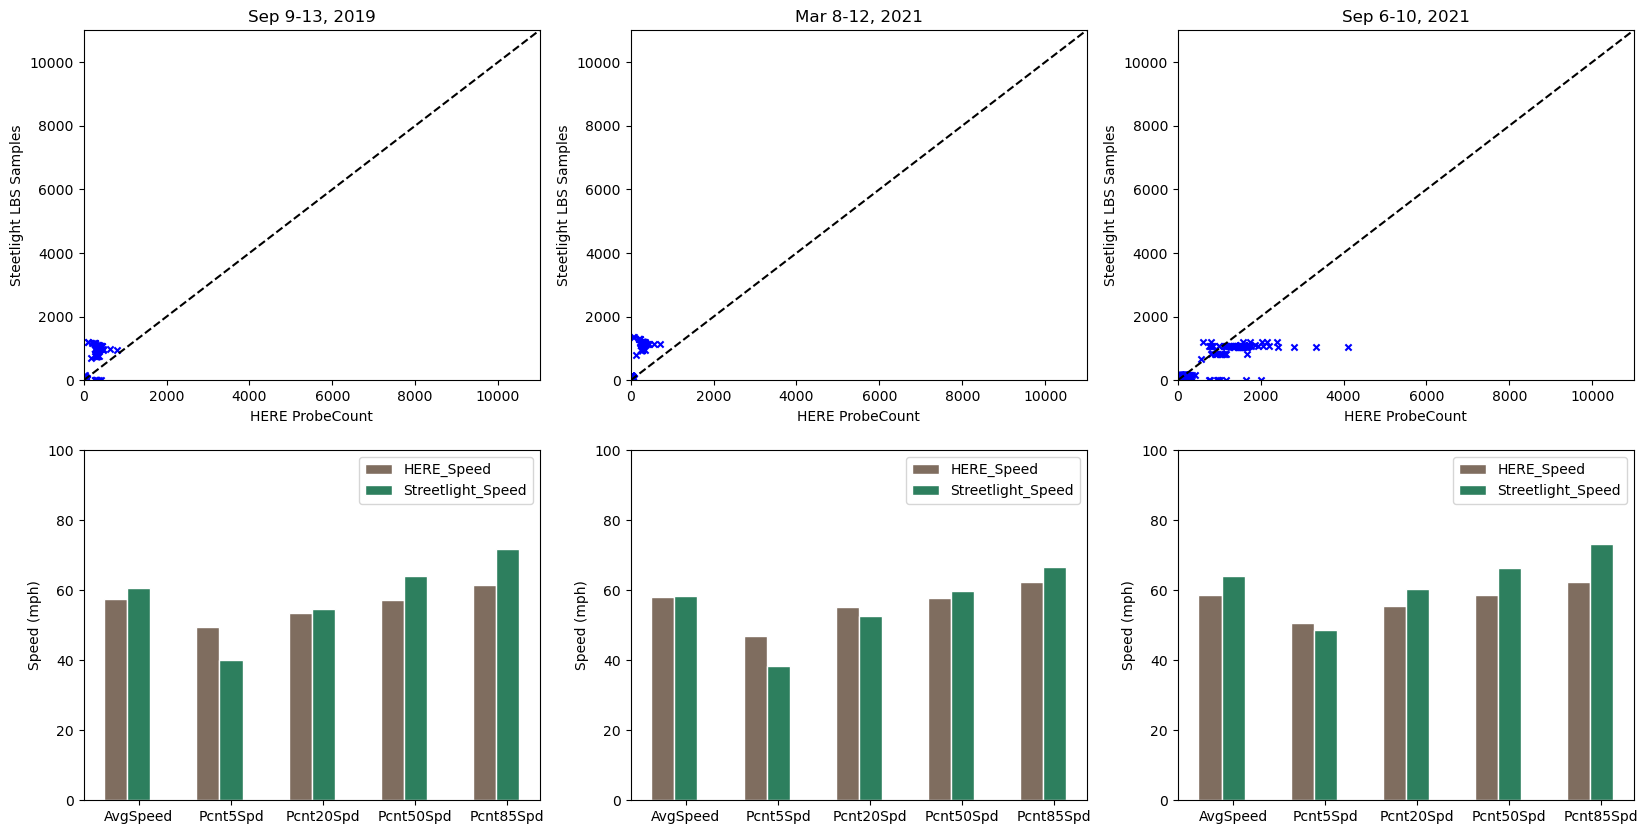

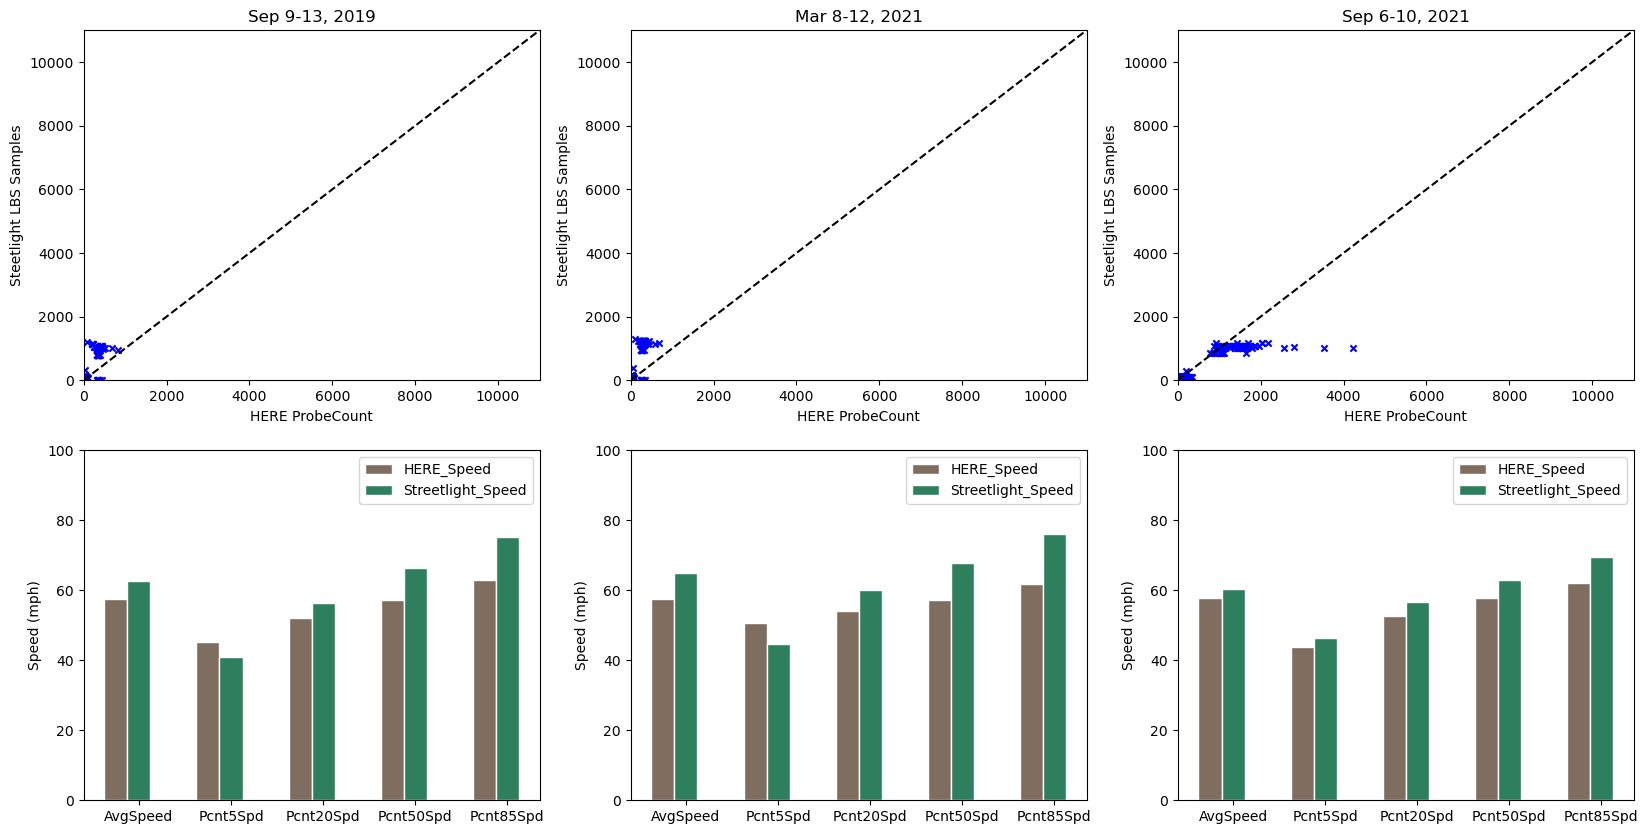

In [681]:
for key in byweek.key.unique(): #byweek.key.unique()
    t = byweek[(byweek['key'] == key) & (byweek.daytype == 'all')]

    t['length'] = abs(t.emp - t.bmp)
    t['here_tt'] = t['length']/t['AvgSpeed']
    t['stl_tt'] = t['length']/t['stl_avgspd']

    t['here_tt5'] = t['length']/t['Pcnt5Spd']
    t['stl_tt5'] = t['length']/t['stl_pct5spd']

    t['here_tt20'] = t['length']/t['Pcnt20Spd']
    t['stl_tt20'] = t['length']/t['stl_pct20spd']

    t['here_tt50'] = t['length']/t['Pcnt50Spd']
    t['stl_tt50'] = t['length']/t['stl_pct50spd']

    t['here_tt85'] = t['length']/t['Pcnt85Spd']
    t['stl_tt85'] = t['length']/t['stl_pct85spd']

    tagg = t.groupby(['AllRds_Dir','Hour', 'period'], as_index=False).agg({'length':'sum','here_tt':'sum','stl_tt':'sum',
                                                             'here_tt5':'sum','stl_tt5':'sum',
                                                             'here_tt20':'sum','stl_tt20':'sum',
                                                             'here_tt50':'sum','stl_tt50':'sum',
                                                             'here_tt85':'sum','stl_tt85':'sum'})

    tagg['AvgSpeed'] = tagg['length']/tagg['here_tt']
    tagg['stl_avgspd'] = tagg['length']/tagg['stl_tt']

    tagg['Pcnt5Spd'] = tagg['length']/tagg['here_tt5']
    tagg['stl_pct5spd'] = tagg['length']/tagg['stl_tt5']

    tagg['Pcnt20Spd'] = tagg['length']/tagg['here_tt20']
    tagg['stl_pct20spd'] = tagg['length']/tagg['stl_tt20']

    tagg['Pcnt50Spd'] = tagg['length']/tagg['here_tt50']
    tagg['stl_pct50spd'] = tagg['length']/tagg['stl_tt50']

    tagg['Pcnt85Spd'] = tagg['length']/tagg['here_tt85']
    tagg['stl_pct85spd'] = tagg['length']/tagg['stl_tt85']


    tagg.Hour = tagg.Hour.astype(str)
    order = ['dawn','6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19','night']

    fig, axes = plt.subplots(2, 3, figsize=(20,10))

    cols = ['Sep 9-13, 2019', 'Mar 8-12, 2021', 'Sep 6-10, 2021']
    
    for ax,col in zip(axes[0], cols):
        ax.set_title(col)
    #Probe Counts
    #[0,0]
    axes[0,0].scatter(x=t.loc[t['period'] == 'Sep 9-13, 2019','ProbeCounts'], y=t.loc[t['period'] == 'Sep 9-13, 2019','TotalSample'], marker='x',s = 20, color='b')
    axes[0,0].set_xlim([0, round(t.TotalSample.max() + 10000, -3)])
    axes[0,0].set_ylim([0, round(t.TotalSample.max() + 10000, -3)])
    points = [0, round(t.TotalSample.max() + 10000, -3)]
    axes[0,0].plot(points, points,linestyle='--', color = 'k')
    axes[0,0].set_xlabel('HERE ProbeCount')
    axes[0,0].set_ylabel('Steetlight LBS Samples')

    #[0,1]
    axes[0,1].scatter(x=t.loc[t['period'] == 'Mar 8-12, 2021','ProbeCounts'], y=t.loc[t['period'] == 'Mar 8-12, 2021','TotalSample'], marker='x',s = 20,color='b')
    axes[0,1].set_xlim([0, round(t.TotalSample.max() + 10000, -3)])
    axes[0,1].set_ylim([0, round(t.TotalSample.max() + 10000, -3)])
    points = [0, round(t.TotalSample.max() + 10000, -3)]
    axes[0,1].plot(points, points,linestyle='--', color = 'k')
    axes[0,1].set_xlabel('HERE ProbeCount')
    axes[0,1].set_ylabel('Steetlight LBS Samples')

    #[0,2]
    axes[0,2].scatter(x=t.loc[t['period'] == 'Sep 6-10, 2021','ProbeCounts'], y=t.loc[t['period'] == 'Sep 6-10, 2021','TotalSample'], marker='x',s = 20,color='b')
    axes[0,2].set_xlim([0, round(t.TotalSample.max() + 10000, -3)])
    axes[0,2].set_ylim([0, round(t.TotalSample.max() + 10000, -3)])
    points = [0, round(t.TotalSample.max() + 10000, -3)]
    axes[0,2].plot(points, points,linestyle='--', color = 'k')
    axes[0,2].set_xlabel('HERE ProbeCount')
    axes[0,2].set_ylabel('Steetlight LBS Samples')

    #agg speeds all day, dawn night
    #2019
    barWidth = 0.25
    here_points19 = tagg.loc[(tagg.period == 'Sep 9-13, 2019') & (tagg.Hour=='all'),
            ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']].values.flatten().tolist()

    stl_points19 = tagg.loc[(tagg.period == 'Sep 9-13, 2019') & (tagg.Hour=='all'),
            ['stl_avgspd','stl_pct5spd','stl_pct20spd','stl_pct50spd','stl_pct85spd']].values.flatten().tolist()

    r1 = np.arange(len(here_points19))
    r2 = [x + barWidth for x in r1]

    axes[1,0].bar(r1, here_points19, color='#7f6d5f', width=barWidth, edgecolor='white', label='HERE_Speed')
    axes[1,0].bar(r2, stl_points19, color='#2d7f5e', width=barWidth, edgecolor='white', label='Streetlight_Speed')
    axes[1,0].set_xticks([r + barWidth for r in range(len(here_points19))], ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd'])
    axes[1,0].set_ylim([0,100])
    axes[1,0].set_ylabel('Speed (mph)')
    axes[1,0].legend()

    #2020
    here_points20 = tagg.loc[(tagg.period == 'Mar 8-12, 2021') & (tagg.Hour=='all'),
            ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']].values.flatten().tolist()

    stl_points20 = tagg.loc[(tagg.period == 'Mar 8-12, 2021') & (tagg.Hour=='all'),
            ['stl_avgspd','stl_pct5spd','stl_pct20spd','stl_pct50spd','stl_pct85spd']].values.flatten().tolist()

    r1 = np.arange(len(here_points20))
    r2 = [x + barWidth for x in r1]

    axes[1,1].bar(r1, here_points20, color='#7f6d5f', width=barWidth, edgecolor='white', label='HERE_Speed')
    axes[1,1].bar(r2, stl_points20, color='#2d7f5e', width=barWidth, edgecolor='white', label='Streetlight_Speed')
    axes[1,1].set_xticks([r + barWidth for r in range(len(here_points20))], ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd'])
    axes[1,1].set_ylim([0,100])
    axes[1,1].set_ylabel('Speed (mph)')
    axes[1,1].legend()

    #2021
    here_points21 = tagg.loc[(tagg.period == 'Sep 6-10, 2021') & (tagg.Hour=='all'),
                ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd']].values.flatten().tolist()

    stl_points21 = tagg.loc[(tagg.period == 'Sep 6-10, 2021') & (tagg.Hour=='all'),
                ['stl_avgspd','stl_pct5spd','stl_pct20spd','stl_pct50spd','stl_pct85spd']].values.flatten().tolist()

    r1 = np.arange(len(here_points21))
    r2 = [x + barWidth for x in r1]

    axes[1,2].bar(r1, here_points21, color='#7f6d5f', width=barWidth, edgecolor='white', label='HERE_Speed')
    axes[1,2].bar(r2, stl_points21, color='#2d7f5e', width=barWidth, edgecolor='white', label='Streetlight_Speed')
    axes[1,2].set_xticks([r + barWidth for r in range(len(here_points21))], ['AvgSpeed','Pcnt5Spd','Pcnt20Spd','Pcnt50Spd','Pcnt85Spd'])
    axes[1,2].set_ylim([0,100])
    axes[1,2].set_ylabel('Speed (mph)')
    axes[1,2].legend()

    

    fname = key + ' allday.jpg'
    plt.savefig(output_path + '3 weeks compare/' + fname, dpi = 1700, bbox_inches='tight') #bbox_inches='tight'
    #plt.show()

In [672]:
t.head(10)

,LINK-DIR,period,ProbeCounts,AvgSpeed,Pcnt5Spd,Pcnt20Spd,Pcnt50Spd,Pcnt85Spd,daytype,Hour,RT_UNIQUE,BEGIN_MP,END_MP,bmp,emp,AllRds_Dir,id,name,LinkDir19,LinkDir21,TotalSample,AlgoSample,TTAlgoSample,stl_avgspd,stl_allavg,stl_ffs,stl_pct5spd,stl_pct20spd,stl_pct50spd,stl_pct85spd,key,length,here_tt,stl_tt,here_tt5,stl_tt5,here_tt20,stl_tt20,here_tt50,stl_tt50,here_tt85,stl_tt85
147,1055980228T,"Sep 9-13, 2019",41,54.095167,39.43150,48.9438,54.969,62.48460,all,all,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,NonCardinal,989,989_NonCardinal,1055980228T,NaN,397,378,384,58.0,59.0,77.0,29.0,42.0,58.0,78.0,005-KY-0249 NonCardinal,0.012108,0.000224,0.000209,0.000307,0.000418,0.000247,0.000288,0.000220,0.000209,0.000194,0.000155
148,1055980229T,"Sep 9-13, 2019",42,53.209067,34.40985,47.5774,54.658,62.48460,all,all,005-KY-0249 -000,8.684,8.715,8.701396,8.715000,NonCardinal,989,989_NonCardinal,1055980229T,NaN,397,378,384,58.0,59.0,77.0,29.0,42.0,58.0,78.0,005-KY-0249 NonCardinal,0.013604,0.000256,0.000235,0.000395,0.000469,0.000286,0.000324,0.000249,0.000235,0.000218,0.000174
149,879845432T,"Sep 9-13, 2019",40,53.960600,36.28865,48.9438,54.969,63.55615,all,all,005-KY-0249 -000,8.684,8.715,8.684000,8.689289,NonCardinal,989,989_NonCardinal,879845432T,NaN,397,378,384,58.0,59.0,77.0,29.0,42.0,58.0,78.0,005-KY-0249 NonCardinal,0.005289,0.000098,0.000091,0.000146,0.000182,0.000108,0.000126,0.000096,0.000091,0.000083,0.000068
150,1055980228T,"Sep 9-13, 2019",1,54.037000,54.03700,54.0370,54.037,54.03700,all,10,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,NonCardinal,989,989_NonCardinal,1055980228T,NaN,4,4,4,NaN,NaN,77.0,NaN,NaN,NaN,NaN,005-KY-0249 NonCardinal,0.012108,0.000224,NaN,0.000224,NaN,0.000224,NaN,0.000224,NaN,0.000224,NaN
151,1055980229T,"Sep 9-13, 2019",1,54.037000,54.03700,54.0370,54.037,54.03700,all,10,005-KY-0249 -000,8.684,8.715,8.701396,8.715000,NonCardinal,989,989_NonCardinal,1055980229T,NaN,4,4,4,NaN,NaN,77.0,NaN,NaN,NaN,NaN,005-KY-0249 NonCardinal,0.013604,0.000252,NaN,0.000252,NaN,0.000252,NaN,0.000252,NaN,0.000252,NaN
152,879845432T,"Sep 9-13, 2019",1,54.037000,54.03700,54.0370,54.037,54.03700,all,10,005-KY-0249 -000,8.684,8.715,8.684000,8.689289,NonCardinal,989,989_NonCardinal,879845432T,NaN,4,4,4,NaN,NaN,77.0,NaN,NaN,NaN,NaN,005-KY-0249 NonCardinal,0.005289,0.000098,NaN,0.000098,NaN,0.000098,NaN,0.000098,NaN,0.000098,NaN
153,1055980228T,"Sep 9-13, 2019",4,57.142667,54.84440,55.4036,56.522,59.13020,all,12,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,NonCardinal,989,989_NonCardinal,1055980228T,NaN,15,14,14,NaN,NaN,77.0,NaN,NaN,NaN,NaN,005-KY-0249 NonCardinal,0.012108,0.000212,NaN,0.000221,NaN,0.000219,NaN,0.000214,NaN,0.000205,NaN
154,1055980229T,"Sep 9-13, 2019",4,47.412000,33.41620,40.4968,54.658,55.96280,all,12,005-KY-0249 -000,8.684,8.715,8.701396,8.715000,NonCardinal,989,989_NonCardinal,1055980229T,NaN,15,14,14,NaN,NaN,77.0,NaN,NaN,NaN,NaN,005-KY-0249 NonCardinal,0.013604,0.000287,NaN,0.000407,NaN,0.000336,NaN,0.000249,NaN,0.000243,NaN
155,879845432T,"Sep 9-13, 2019",3,58.799000,54.84440,55.4036,56.522,62.60850,all,12,005-KY-0249 -000,8.684,8.715,8.684000,8.689289,NonCardinal,989,989_NonCardinal,879845432T,NaN,15,14,14,NaN,NaN,77.0,NaN,NaN,NaN,NaN,005-KY-0249 NonCardinal,0.005289,0.000090,NaN,0.000096,NaN,0.000095,NaN,0.000094,NaN,0.000084,NaN
156,1055980228T,"Sep 9-13, 2019",4,48.861000,39.06800,40.7450,44.099,58.01220,all,13,005-KY-0249 -000,8.684,8.715,8.689289,8.701396,NonCardinal,989,989_NonCardinal,1055980228T,NaN,23,21,23,56.0,60.0,77.0,NaN,NaN,NaN,NaN,005-KY-0249 NonCardinal,0.012108,0.000248,0.000216,0.000310,NaN,0.000297,NaN,0.000275,NaN,0.000209,NaN


In [673]:
tagg.head(10)

,AllRds_Dir,Hour,period,length,here_tt,stl_tt,here_tt5,stl_tt5,here_tt20,stl_tt20,here_tt50,stl_tt50,here_tt85,stl_tt85,AvgSpeed,stl_avgspd,Pcnt5Spd,stl_pct5spd,Pcnt20Spd,stl_pct20spd,Pcnt50Spd,stl_pct50spd,Pcnt85Spd,stl_pct85spd
0,NonCardinal,10,"Mar 8-12, 2021",12.312000,0.258894,0.103074,0.318174,0.0,0.288678,0.0,0.260251,0.0,0.234469,0.0,47.556212,119.448021,38.695751,inf,42.649556,inf,47.308190,inf,52.510086,inf
1,NonCardinal,10,"Sep 6-10, 2021",16.111700,0.328265,0.061842,0.375550,0.0,0.350766,0.0,0.326122,0.0,0.305719,0.0,49.081371,260.532014,42.901558,inf,45.932853,inf,49.403939,inf,52.700936,inf
2,NonCardinal,10,"Sep 9-13, 2019",10.725836,0.265384,0.022079,0.281458,0.0,0.275723,0.0,0.266191,0.0,0.255536,0.0,40.416327,485.794039,38.108057,inf,38.900741,inf,40.293816,inf,41.973871,inf
3,NonCardinal,11,"Mar 8-12, 2021",7.003200,0.150451,0.077260,0.157567,0.0,0.154763,0.0,0.150451,0.0,0.146833,0.0,46.548175,90.644022,44.445755,inf,45.251200,inf,46.548175,inf,47.695162,inf
4,NonCardinal,11,"Sep 6-10, 2021",16.229000,0.314509,0.099972,0.353696,0.0,0.334958,0.0,0.314538,0.0,0.292931,0.0,51.601102,162.335424,45.884085,inf,48.450905,inf,51.596261,inf,55.402079,inf
5,NonCardinal,11,"Sep 9-13, 2019",4.213257,0.086675,0.003852,0.086675,0.0,0.086675,0.0,0.086675,0.0,0.086675,0.0,48.609845,1093.826409,48.609845,inf,48.609845,inf,48.609845,inf,48.609845,inf
6,NonCardinal,12,"Mar 8-12, 2021",10.142200,0.219754,0.067618,0.235781,0.0,0.226799,0.0,0.217864,0.0,0.214446,0.0,46.152518,149.992515,43.015351,inf,44.718945,inf,46.552971,inf,47.294865,inf
7,NonCardinal,12,"Sep 6-10, 2021",16.164600,0.296694,0.081593,0.336300,0.0,0.316238,0.0,0.296808,0.0,0.275914,0.0,54.482478,198.112981,48.066068,inf,51.115236,inf,54.461421,inf,58.585660,inf
8,NonCardinal,12,"Sep 9-13, 2019",15.534562,0.299526,0.029950,0.336697,0.0,0.317637,0.0,0.297530,0.0,0.284824,0.0,51.863745,518.683092,46.138147,inf,48.906631,inf,52.211706,inf,54.540929,inf
9,NonCardinal,13,"Mar 8-12, 2021",14.739600,0.274619,0.119978,0.286521,0.0,0.281763,0.0,0.274619,0.0,0.268660,0.0,53.672974,122.852708,51.443308,inf,52.311975,inf,53.672974,inf,54.863427,inf
